<a href="https://colab.research.google.com/github/Datamin-D/movie_predict/blob/master/%5BWIP%5DMoviePredict_models_LR%2CSVR%2CANN%2CCNN%2CRF_%EB%A6%AC%EB%B7%B0%EC%88%98%EB%B3%84%EC%A0%90%2BTicket_sold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models: 1. Linear Regression, 2. SVM

# 1 모든 모델 공통 돌리기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import time
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,Conv1D,MaxPooling1D,GlobalAveragePooling1D,Reshape
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

import re

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# 성과를 df에 저장하면 좋겠다.. ev_df


리뷰수만으로 학습한거는 그냥함. 리뷰별점만,리뷰 수 + 리뷰 별점 한거 까지 하기.

In [ ]:
# # ** 각 모델들이 자동으로 df에 저장하도록 코딩 필요.

# #empty_ev_df 생성

# met_list = ['r2','adjr2','mae','mse','rmse','mape']
# model_list = ['lr','svr','ann','cnn','rf']
# train_test = ['train','test']
# ev_cols = ['name']
# for model_name in model_list:
#   for metric in met_list:
#     for t in train_test:
#       model_metric = model_name + '_' + metric + '_' + t
#       ev_cols.append(model_metric)
# ev_cols
# ev_df = pd.DataFrame(data = [],columns = ev_cols)
# ev_df['week'] = 0
# ev_df_material = []

# #empty df저장
# with open('/gdrive/MyDrive/movie_predict/DF/ev_df/empty_ev_df','wb') as fw:
#   pickle.dump(ev_df,fw)

# #empty_ev_df 열기
# with open('/gdrive/MyDrive/movie_predict/DF/ev_df/empty_ev_df','rb') as fr:
#   ev_df = pickle.load(fr)

#ev_df 만들어지면 여기부터 돌리면됨.
#기존ev_df를 불러와서 추가하는 코드
with open('/gdrive/MyDrive/movie_predict/DF/ev_df/ev_df','rb') as fr:
  ev_df = pickle.load(fr)



#ev_df 컬럼 순서 바꾸기
#ev_df = ev_df[['name','week','lr_r2_train','lr_r2_test','lr_adjr2_train','lr_adjr2_test','lr_mae_train','lr_mae_test','lr_mse_train','lr_mse_test','lr_rmse_train','lr_rmse_test','lr_mape_train','lr_mape_test','svr_r2_train','svr_r2_test','svr_adjr2_train','svr_adjr2_test','svr_mae_train','svr_mae_test','svr_mse_train','svr_mse_test','svr_rmse_train','svr_rmse_test','svr_mape_train','svr_mape_test','ann_r2_train','ann_r2_test','ann_adjr2_train','ann_adjr2_test','ann_mae_train','ann_mae_test','ann_mse_train','ann_mse_test','ann_rmse_train','ann_rmse_test','ann_mape_train','ann_mape_test','cnn_r2_train','cnn_r2_test','cnn_adjr2_train','cnn_adjr2_test','cnn_mae_train','cnn_mae_test','cnn_mse_train','cnn_mse_test','cnn_rmse_train','cnn_rmse_test','cnn_mape_train','cnn_mape_test','rf_r2_train','rf_r2_test','rf_adjr2_train','rf_adjr2_test','rf_mae_train','rf_mae_test','rf_mse_train','rf_mse_test','rf_rmse_train','rf_rmse_test','rf_mape_train','rf_mape_test']]
# ev_df
#w_rv_star은 같이
#w_rv 리뷰만
#w_star 은 별점만

ev_df_material = {
 'week':np.nan,
 'lr_r2_train':np.nan,
 'lr_r2_test':np.nan,
 'lr_adjr2_train':np.nan,
 'lr_adjr2_test':np.nan,
 'lr_mae_train':np.nan,
 'lr_mae_test':np.nan,
 'lr_mse_train':np.nan,
 'lr_mse_test':np.nan,
 'lr_rmse_train':np.nan,
 'lr_rmse_test':np.nan,
 'lr_mape_train':np.nan,
 'lr_mape_test':np.nan,
 'svr_r2_train':np.nan,
 'svr_r2_test':np.nan,
 'svr_adjr2_train':np.nan,
 'svr_adjr2_test':np.nan,
 'svr_mae_train':np.nan,
 'svr_mae_test':np.nan,
 'svr_mse_train':np.nan,
 'svr_mse_test':np.nan,
 'svr_rmse_train':np.nan,
 'svr_rmse_test':np.nan,
 'svr_mape_train':np.nan,
 'svr_mape_test':np.nan,
 'ann_r2_train':np.nan,
 'ann_r2_test':np.nan,
 'ann_adjr2_train':np.nan,
 'ann_adjr2_test':np.nan,
 'ann_mae_train':np.nan,
 'ann_mae_test':np.nan,
 'ann_mse_train':np.nan,
 'ann_mse_test':np.nan,
 'ann_rmse_train':np.nan,
 'ann_rmse_test':np.nan,
 'ann_mape_train':np.nan,
 'ann_mape_test':np.nan,
 'cnn_r2_train':np.nan,
 'cnn_r2_test':np.nan,
 'cnn_adjr2_train':np.nan,
 'cnn_adjr2_test':np.nan,
 'cnn_mae_train':np.nan,
 'cnn_mae_test':np.nan,
 'cnn_mse_train':np.nan,
 'cnn_mse_test':np.nan,
 'cnn_rmse_train':np.nan,
 'cnn_rmse_test':np.nan,
 'cnn_mape_train':np.nan,
 'cnn_mape_test':np.nan,
 'rf_r2_train':np.nan,
 'rf_r2_test':np.nan,
 'rf_adjr2_train':np.nan,
 'rf_adjr2_test':np.nan,
 'rf_mae_train':np.nan,
 'rf_mae_test':np.nan,
 'rf_mse_train':np.nan,
 'rf_mse_test':np.nan,
 'rf_rmse_train':np.nan,
 'rf_rmse_test':np.nan,
 'rf_mape_train':np.nan,
 'rf_mape_test':np.nan}
ev_df

,rv_star,week,lr_r2_train,lr_r2_test,lr_adjr2_train,lr_adjr2_test,lr_mae_train,lr_mae_test,lr_mse_train,lr_mse_test,lr_rmse_train,lr_rmse_test,lr_mape_train,lr_mape_test,svr_r2_train,svr_r2_test,svr_adjr2_train,svr_adjr2_test,svr_mae_train,svr_mae_test,svr_mse_train,svr_mse_test,svr_rmse_train,svr_rmse_test,svr_mape_train,svr_mape_test,ann_r2_train,ann_r2_test,ann_adjr2_train,ann_adjr2_test,ann_mae_train,ann_mae_test,ann_mse_train,ann_mse_test,ann_rmse_train,ann_rmse_test,ann_mape_train,ann_mape_test,cnn_r2_train,cnn_r2_test,cnn_adjr2_train,cnn_adjr2_test,cnn_mae_train,cnn_mae_test,cnn_mse_train,cnn_mse_test,cnn_rmse_train,cnn_rmse_test,cnn_mape_train,cnn_mape_test,rf_r2_train,rf_r2_test,rf_adjr2_train,rf_adjr2_test,rf_mae_train,rf_mae_test,rf_mse_train,rf_mse_test,rf_rmse_train,rf_rmse_test,rf_mape_train,rf_mape_test
0,star,1.0,0.89,0.93,0.89,0.93,8688489.59,8083910.03,4.242535e+14,2.869692e+14,20597415.82,16940164.63,4982.30,5133.32,-0.17,-0.18,-0.18,-0.22,27204230.01,27606490.26,4.443039e+15,4.510294e+15,66656125.19,67158723.17,5691.62,4747.20,0.88,0.90,0.88,0.90,9749180.36,9986269.50,4.546142e+14,3.836895e+14,21321684.36,19587994.58,10242.84,9478.18,0.23,0.25,0.22,0.22,27065115.03,26856975.86,2.924483e+15,2.889304e+15,54078493.57,53752244.12,27281.64,27523.91,0.99,0.93,0.99,0.93,2767055.32,6782633.70,5.619806e+13,2.573552e+14,7496536.50,16042295.39,93816.57,76369.86
1,star,2.0,0.89,0.90,0.89,0.90,8460723.96,8597148.28,3.928210e+14,3.850410e+14,19819713.46,19622462.05,4344.61,99783.19,-0.18,-0.14,-0.19,-0.18,27230172.57,25465035.29,4.346381e+15,4.545959e+15,65927086.26,67423729.65,5010.03,6838.55,0.88,0.86,0.88,0.86,8544456.76,9169633.79,4.325886e+14,5.639626e+14,20798764.41,23747897.52,969.26,9435.82,0.25,0.19,0.24,0.16,26495587.31,26669194.05,2.781853e+15,3.223205e+15,52743271.21,56773276.61,NaN,27719.81,0.99,0.90,0.99,0.90,2585109.30,7327817.81,4.964661e+13,4.101610e+14,7046034.85,20252432.42,86240.37,96977.54
2,star,3.0,0.90,0.90,0.90,0.90,8432572.78,8315976.85,3.918250e+14,3.733217e+14,19794569.91,19321535.69,5028.43,79844.68,-0.17,-0.16,-0.18,-0.20,27027614.43,25243601.19,4.405885e+15,4.130096e+15,66376841.20,64265820.57,5435.31,5257.45,0.88,0.86,0.88,0.86,9723004.33,9819448.09,4.486605e+14,4.851168e+14,21181606.80,22025366.83,7312.38,4932.54,0.23,0.24,0.22,0.21,26978825.15,25819640.76,2.887769e+15,2.716662e+15,53737961.91,52121604.13,NaN,25292.60,0.99,0.91,0.99,0.91,2673451.48,6760011.23,5.100127e+13,3.171250e+14,7141517.09,17808003.00,91548.60,78824.62
3,star,4.0,0.89,0.92,0.89,0.92,8545721.34,8162723.85,4.165193e+14,2.659302e+14,20408805.09,16307365.21,5161.67,84902.70,-0.17,-0.17,-0.18,-0.21,26982046.79,24819459.28,4.482733e+15,3.752339e+15,66953218.00,61256338.38,4963.83,5179.71,0.89,0.91,0.89,0.91,9112448.18,8447178.24,4.360845e+14,2.740603e+14,20882635.60,16554765.29,4192.23,2615.08,0.23,0.24,0.22,0.21,26758564.55,25872380.87,2.931113e+15,2.449569e+15,54139756.85,49493121.29,NaN,26880.06,0.99,0.91,0.99,0.91,2644004.65,6842259.23,5.323553e+13,2.752644e+14,7296268.07,16591093.62,90107.21,82923.94
4,rv,1.0,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,104023.49,0.11,0.14,0.10,0.11,21296885.93,22613374.58,3.095184e+15,3.011174e+15,55634376.36,54874161.35,2860.03,18449.76,0.89,0.90,0.89,0.90,7193655.32,7782596.28,3.702975e+14,3.458216e+14,19243115.09,18596279.72,1477.94,2161.31,0.45,0.52,0.45,0.50,20569870.95,20687639.08,1.912400e+15,1.683454e+15,43730995.63,41029914.20,NaN,22773.78,0.99,0.92,0.99,0.92,2417015.09,6588734.14,5.132642e+13,2.681000e+14,7164245.66,16373759.61,92449.54,102992.06
5,rv,2.0,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,4412.11,0.11,0.14,0.10,0.11,21297607.80,22614127.33,3.095130e+15,3.011152e+15,55633896.97,54873968.47,18562.54,18469.40,0.88,0.90,0.88,0.90,8009427.73,8623712.14,4.010718e+14,3.449434e+14,20026777.41,18572651.17,2817.53,4470.79,0.46,0.52,0.46,0.50,20492941.12,20631889.6

## LOAD DF

In [ ]:
# Gross_USA로 예측
##erase_var = ['Cumulative Worldwide Gross']
##target_var = 'Gross_USA'

#ticket_sold로 예측
erase_var = ['Gross_USA','Cumulative Worldwide Gross']
target_var = 'ticket_sold'

In [ ]:
import pandas as pd
# 1 원래 df movie_code없이
#df = pd.read_csv("/gdrive/My Drive/movie_predict/preprocessed_df/preprocessed_df.csv")

# 2 movie code가지고.
#df = pd.read_csv("/gdrive/MyDrive/movie_predict/preprocessed_df/preprocessed_df_with_moviecode.csv")

#3. movie_review star & review number included (week4 added)
#df = pd.read_csv("/gdrive/MyDrive/movie_predict/preprocessed_df/preprocessed_df_with_moviecode.csv") 아님. 피클로 저장함
import pickle
with open('/gdrive/MyDrive/movie_predict/df_with_reviewnum_and_0Starexcluded_week4_','rb') as fr:
  df = pickle.load(fr)

df

,Movie_title,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Movie_code,imdb_url,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,year,star_bf_released,star_in_1week,star_in_2weeks,star_in_3weeks,star_in_4weeks,after 4 weeks,rv_df_released_date,rv_in_1_week,rv_in_2_weeks,rv_in_3_weeks,rv_in_4_weeks,rv_after 4 weeks
0,Next Friday (2000),6.2,36365,98,57328603,59827328.0,12 January 2000,0195945,https://www.imdb.com/title/tt0195945/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14465156,16 January 2000,0,0,0,0,0,0,2000,0.7500,0.8000,0.8000,0.8000,0.7333,0.6354,2.0,5.0,1.0,1.0,2.0,69.0
1,Supernova (2000),4.9,16980,90,14230455,14828081.0,14 January 2000,0134983,https://www.imdb.com/title/tt0134983/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,5778639,16 January 2000,1,1,0,0,0,0,2000,0.3750,0.3600,0.3476,0.3489,0.3437,0.4747,10.0,36.0,11.0,6.0,2.0,188.0
2,My Dog Skip (2000),7.0,19191,95,34134641,35547761.0,3 March 2000,0156812,https://www.imdb.com/title/tt0156812/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,56943,17 January 2000,0,1,0,0,0,0,2000,0.9286,0.8875,0.8810,0.8778,0.8750,0.8175,8.0,13.0,6.0,6.0,1.0,98.0
3,Down to You (2000),5.0,14290,91,20069008,24419914.0,21 January 2000,0186975,https://www.imdb.com/title/tt0186975/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7602507,23 January 2000,1,1,0,0,0,0,2000,0.5500,0.4235,0.4043,0.3880,0.3846,0.4684,5.0,20.0,11.0,3.0,1.0,114.0
4,Isn't She Great (2000),5.4,2254,95,2962465,3003296.0,28 January 2000,0141399,https://www.imdb.com/title/tt0141399/?ref_=fn_...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1368705,30 January 2000,1,1,0,0,0,0,2000,NaN,0.7500,0.8333,0.7600,0.7600,0.5152,1.0,5.0,2.0,2.0,0.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Aus dem Nichts (2017),7.1,28351,106,321011,5104991.0,27 December 2017,5723272,https://www.imdb.com/title/tt5723272/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,10455,31 December 2017,0,0,0,0,0,0,2017,0.7667,0.8000,0.8000,0.8200,0.8200,0.6580,3.0,1.0,0.0,1.0,0.0,51.0
7895,Qian ren 3: Zai jian qian ren (2017),5.6,387,120,838959,307592427.0,29 December 2017,7830888,https://www.imdb.com/title/tt7830888/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,125291,31 December 2017,0,0,0,0,0,0,2017,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
7896,Film Stars Don't Die in Liverpool (2017),6.7,8557,105,1026124,4047917.0,29 December 2017,5711148,https://www.imdb.com/title/tt5711148/?ref_=fn_...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

## Gross_USA를 연도별 티켓가격으로 나누기.


In [ ]:
# year 컬럼 만들기
df['year'] = df['Released_date'].apply(lambda x: x[-4:])
#df['year'].value_counts()
year_tprice = {'2019':	9.16,'2018':	9.11,'2017':	8.97,'2016':	8.65,'2015':	8.43,'2014':	8.17,'2013':	8.13,'2012':	7.96,'2011':	7.93,'2010':	7.89,'2009':	7.50,'2008':	7.18,'2007':	6.88,'2006':	6.55,'2005':	6.41,'2004':	6.21,'2003':	6.03,'2002':	5.80,'2001': 5.65,'2000':	5.39}
df['ticket_price'] = df['year'].apply(lambda x : year_tprice[str(x)])
#df['ticket_price'].value_counts()
df['ticket_sold'] = df['Gross_USA']/df['ticket_price']
df['ticket_sold'] = np.round(df['ticket_sold'],2)

# 분포 보기
# plt.hist(df['ticket_sold'], bins = 600)
# plt.ylim(0,500)
# #plt.xlim(0,60000000)
# plt.xlim(0,10000000)

## opening Weekend_USA도 나눠주기 

In [ ]:
df['Opening Weekend sales'] = df['Opening Weekend sales']/df['ticket_price']
df['Opening Weekend sales'] = np.round(df['Opening Weekend sales'],2)

In [ ]:
df['Opening Weekend sales'].mean()

974449.6509254316

(0.0, 10000000.0)

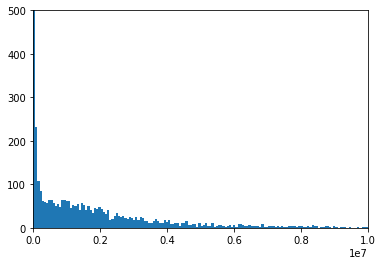

In [ ]:
# 분포 보기
plt.hist(df['Opening Weekend sales'], bins = 600)
plt.ylim(0,500)
#plt.xlim(0,60000000)
plt.xlim(0,10000000)


## 리뷰수 주차별로 누적해주기

별점은 잘 누적되었으나 리뷰수는 각 주차별 리뷰 수가 표기됨. 누적해주기.

In [ ]:
df['rv_in_1_week'] = df['rv_df_released_date'] + df['rv_in_1_week']
df['rv_in_2_weeks'] = df['rv_in_1_week'] + df['rv_in_2_weeks']
df['rv_in_3_weeks'] = df['rv_in_2_weeks'] + df['rv_in_3_weeks']
df['rv_in_4_weeks'] = df['rv_in_3_weeks'] + df['rv_in_4_weeks']
df['rv_after 4 weeks'] = df['rv_in_4_weeks'] + df['rv_after 4 weeks']
df

,Movie_title,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Movie_code,imdb_url,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,year,star_bf_released,star_in_1week,star_in_2weeks,star_in_3weeks,star_in_4weeks,after 4 weeks,rv_df_released_date,rv_in_1_week,rv_in_2_weeks,rv_in_3_weeks,rv_in_4_weeks,rv_after 4 weeks,ticket_price,ticket_sold
0,Next Friday (2000),6.2,36365,98,57328603,59827328.0,12 January 2000,0195945,https://www.imdb.com/title/tt0195945/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14465156,16 January 2000,0,0,0,0,0,0,2000,0.7500,0.8000,0.8000,0.8000,0.7333,0.6354,2.0,7.0,8.0,9.0,11.0,80.0,5.39,10636104.45
1,Supernova (2000),4.9,16980,90,14230455,14828081.0,14 January 2000,0134983,https://www.imdb.com/title/tt0134983/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,5778639,16 January 2000,1,1,0,0,0,0,2000,0.3750,0.3600,0.3476,0.3489,0.3437,0.4747,10.0,46.0,57.0,63.0,65.0,253.0,5.39,2640158.63
2,My Dog Skip (2000),7.0,19191,95,34134641,35547761.0,3 March 2000,0156812,https://www.imdb.com/title/tt0156812/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,56943,17 January 2000,0,1,0,0,0,0,2000,0.9286,0.8875,0.8810,0.8778,0.8750,0.8175,8.0,21.0,27.0,33.0,34.0,132.0,5.39,6332957.51
3,Down to You (2000),5.0,14290,91,20069008,24419914.0,21 January 2000,0186975,https://www.imdb.com/title/tt0186975/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7602507,23 January 2000,1,1,0,0,0,0,2000,0.5500,0.4235,0.4043,0.3880,0.3846,0.4684,5.0,25.0,36.0,39.0,40.0,154.0,5.39,3723378.11
4,Isn't She Great (2000),5.4,2254,95,2962465,3003296.0,28 January 2000,0141399,https://www.imdb.com/title/tt0141399/?ref_=fn_...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1368705,30 January 2000,1,1,0,0,0,0,2000,NaN,0.7500,0.8333,0.7600,0.7600,0.5152,1.0,6.0,8.0,10.0,10.0,57.0,5.39,549622.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Aus dem Nichts (2017),7.1,28351,106,321011,5104991.0,27 December 2017,5723272,https://www.imdb.com/title/tt5723272/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,10455,31 December 2017,0,0,0,0,0,0,2017,0.7667,0.8000,0.8000,0.8200,0.8200,0.6580,3.0,4.0,4.0,5.0,5.0,56.0,8.97,35787.18
7895,Qian ren 3: Zai jian qian ren (2017),5.6,387,120,838959,307592427.0,29 December 2017,7830888,https://www.imdb.com/title/tt7830888/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,125291,31 December 2017,0,0,0,0,0,0,2017,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,8.97,93529.43
7896,Film Stars Don't Die in Liverpool (2017),6.7,8557

## 훈련시킬 주차 컬럼 선별

In [ ]:
# list(df.columns[59:]) #리뷰 별점, 리뷰수의 컬럼 리스트
#개봉당일

week = 4

for_star_rv_week0 = [
 'star_in_1week',
 'star_in_2weeks',
 'star_in_3weeks',
 'star_in_4weeks',
 'after 4 weeks',
 'rv_in_1_week',
 'rv_in_2_weeks',
 'rv_in_3_weeks',
 'rv_in_4_weeks',
 'rv_after 4 weeks']
#1주
for_star_rv_week1 = ['star_bf_released',
 'star_in_2weeks',
 'star_in_3weeks',
 'star_in_4weeks',
 'after 4 weeks',
 'rv_df_released_date',
 'rv_in_2_weeks',
 'rv_in_3_weeks',
 'rv_in_4_weeks',
 'rv_after 4 weeks']

for_star_rv_week2 = ['star_bf_released',
 'star_in_1week',
 'star_in_3weeks',
 'star_in_4weeks',
 'after 4 weeks',
 'rv_df_released_date',
 'rv_in_1_week',
 'rv_in_3_weeks',
 'rv_in_4_weeks',
 'rv_after 4 weeks']

for_star_rv_week3 = ['star_bf_released',
 'star_in_1week',
 'star_in_2weeks',
 'star_in_4weeks',
 'after 4 weeks',
 'rv_df_released_date',
 'rv_in_1_week',
 'rv_in_2_weeks',
 'rv_in_4_weeks',
 'rv_after 4 weeks']

for_star_rv_week4 = ['star_bf_released',
 'star_in_1week',
 'star_in_2weeks',
 'star_in_3weeks',
 'after 4 weeks',
 'rv_df_released_date',
 'rv_in_1_week',
 'rv_in_2_weeks',
 'rv_in_3_weeks',
 'rv_after 4 weeks']

 # 필요한 컬럼만 추리기
#원본
#df = df.drop([erase_var,'Movie_title','Unnamed: 0','Rate','Rating_count','Released_date','Movie_code', 'imdb_url','Opening Weekend date','year'],axis = 1)
column_erased = erase_var+['Movie_title','Rate','Rating_count','Released_date','Movie_code', 'imdb_url','Opening Weekend date','year','Reality-TV']

for_star_rv_week_n = [for_star_rv_week0,for_star_rv_week1,for_star_rv_week2,for_star_rv_week3,for_star_rv_week4]

column_erased = column_erased + for_star_rv_week_n[week] #n주차
df = df.drop(column_erased,axis = 1)

# Movie_title 보존
# df = df.drop([erase_var,'Unnamed: 0','Rate','Rating_count','Released_date','Movie_code', 'imdb_url','Opening Weekend date','year','Reality-TV'],axis = 1)
# df

#df = df.dropna()
#df.reset_index(drop = True,inplace = True)
df

,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,star_in_4weeks,rv_in_4_weeks,ticket_price,ticket_sold
0,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14465156,0,0,0,0,0,0,0.7333,11.0,5.39,10636104.45
1,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,5778639,1,1,0,0,0,0,0.3437,65.0,5.39,2640158.63
2,95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,56943,0,1,0,0,0,0,0.8750,34.0,5.39,6332957.51
3,91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7602507,1,1,0,0,0,0,0.3846,40.0,5.39,3723378.11
4,95,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1368705,1,1,0,0,0,0,0.7600,10.0,5.39,549622.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,106,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,10455,0,0,0,0,0,0,0.8200,5.0,8.97,35787.18
7895,120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,125291,0,0,0,0,0,0,NaN,0.0,8.97,93529.43
7896,105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,36048,1,1,0,0,0,0,0.7500,7.0,8.97,114395.09
7897,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,5888,0,0,0,0,0,0,0.8857,7.0,8.97,12037.57


In [ ]:
column_erased

[('Gross_USA', 'Cumulative Worldwide Gross'),
 'Movie_title',
 'Rate',
 'Rating_count',
 'Released_date',
 'Movie_code',
 'imdb_url',
 'Opening Weekend date',
 'year',
 'Reality-TV',
 'star_bf_released',
 'star_in_1week',
 'star_in_2weeks',
 'star_in_3weeks',
 'after 4 weeks',
 'rv_df_released_date',
 'rv_in_1_week',
 'rv_in_2_weeks',
 'rv_in_3_weeks',
 'rv_after 4 weeks']

In [ ]:
# rv_star 없이 쓰기. 
df = df.drop(['star_in_4weeks','rv_in_4_weeks'], axis = 1)
df.head()

## 리뷰 수, 리뷰 별점 중 어느 컬럼 쓸지? +결측치 있는 행 제거

### 1.리뷰 별점만 추가

In [ ]:
# #n주차
# if week == 1:
#   df = df.drop('rv_in_'+str(week)+'_week',axis = 1) # star_in_nweeks에 숫자자리 대신 n주 입력  
# else:
#   df = df.drop('rv_in_'+str(week)+'_weeks',axis = 1) # star_in_nweeks에 숫자자리 대신 n주 입력
# ev_df_material['rv_star'] = 'star'
# # 개봉 전 df = df.drop('rv_df_released_date',axis = 1)
# df = df.dropna().reset_index(drop = True) # 별점에 있는 NaN날아감.
# df.head()

,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,star_in_4weeks
0,98,57328603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14465156,0,0,0,0,0,0,0.7333
1,90,14230455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,5778639,1,1,0,0,0,0,0.3437
2,95,34134641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,56943,0,1,0,0,0,0,0.8750
3,91,20069008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7602507,1,1,0,0,0,0,0.3846
4,95,2962465,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1368705,1,1,0,0,0,0,0.7600


### 2.리뷰 수만 추가

In [ ]:
# #n주차
# ev_df_material['rv_star'] = 'rv'
# if week == 1:
#   df = df.drop('star_in_'+ str(week) +'week',axis = 1) # star_in_nweeks에 숫자자리 대신 n주 입력  
# else:
#   df = df.drop('star_in_'+ str(week) +'weeks',axis = 1) # star_in_nweeks에 숫자자리 대신 n주 입력
# df = df.dropna().reset_index(drop = True) # 별점에 있는 NaN날아감.
# df.head()

,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,rv_in_3_weeks
0,98,57328603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14465156,0,0,0,0,0,0,9.0
1,90,14230455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,5778639,1,1,0,0,0,0,63.0
2,95,34134641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,56943,0,1,0,0,0,0,33.0
3,91,20069008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7602507,1,1,0,0,0,0,39.0
4,95,2962465,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1368705,1,1,0,0,0,0,10.0


### 3.리뷰 수와 별점 추가

In [ ]:
ev_df_material['rv_star'] = 'rv_star'

df = df.dropna().reset_index(drop = True) # 별점에 있는 NaN날아감.
df.head()

,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,star_in_4weeks,rv_in_4_weeks
0,98,57328603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14465156,0,0,0,0,0,0,0.7333,11.0
1,90,14230455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,5778639,1,1,0,0,0,0,0.3437,65.0
2,95,34134641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,56943,0,1,0,0,0,0,0.8750,34.0
3,91,20069008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7602507,1,1,0,0,0,0,0.3846,40.0
4,95,2962465,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1368705,1,1,0,0,0,0,0.7600,10.0


In [ ]:
# #영화 moviecode list 추려내기


# #exploration

# #df['Movie_code'][~df['Movie_code'].apply(lambda x: x[:2] == 'tt')] # 앞에가 다 tt로 시작? ㅇㅇ
# df['Movie_code'][~df['Movie_code'].apply(lambda x: len(x[2:]) == 7)] # 숫자 길이는 다 7?] ㄴㄴ 8개도 있음

# #숫자만 추려내기
# movie_code_no = df['Movie_code'].apply(lambda x: x[2:])
# movie_code_no = movie_code_no.to_list()
# len(movie_code_no) # 추려내기 완료

# import pickle
# with open('/gdrive/MyDrive/movie_predict/movie_reviews/movie_code','wb') as fw:
#   pickle.dump(movie_code_no,fw)

## Budget 추가 df

In [ ]:
# 3. Budget 보존용
df = pd.read_csv("/gdrive/MyDrive/movie_predict/preprocessed_df/preprocessed_df_with_budget.csv")

#df = df.drop([erase_var,'Movie_title','Unnamed: 0','Rate','Rating_count','Released_date','Movie_code', 'imdb_url','Opening Weekend date','year'],axis = 1)
df = df.drop([erase_var,'Movie_title','Unnamed: 0','Rate','Rating_count','Released_date','Movie_code', 'imdb_url','Opening Weekend date','year','Reality-TV'],axis = 1)
df
#결측치 있는 행 제거
# df = df.dropna()
# df.reset_index(drop = True,inplace = True)

#

,Run_time,Budget,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
0,98,11000000,57328603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14465156,0,0,0,0,0,0
1,90,90000000,14230455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5778639,1,1,0,0,0,0
2,95,6000000,34134641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,56943,0,1,0,0,0,0
3,91,11000000,20069008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7602507,1,1,0,0,0,0
4,95,44000000,2962465,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1368705,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,106,NaN,321011,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10455,0,0,0,0,0,0
7893,120,NaN,838959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,125291,0,0,0,0,0,0
7894,105,10000000,1026124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,36048,1,1,0,0,0,0
7895,103,NaN,107977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5888,0,0,0,0,0,0


### budget exist

In [ ]:
#nan을 결측치로 명시
df = df.fillna("missing")
def detect_budget_nan(x):
  if x == 'missing': # df.loc[7896,'Budget']는 nan
    budget_exist = 0 # nan 
  else:
    budget_exist = 1 #정보 존재
  return budget_exist
df['budget_exist'] = df['Budget'].apply(lambda x:detect_budget_nan(x))
df = df.drop('Budget',axis = 1)
df.head()

,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,budget_exist
0,98,57328603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14465156,0,0,0,0,0,0,1
1,90,14230455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5778639,1,1,0,0,0,0,1
2,95,34134641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,56943,0,1,0,0,0,0,1
3,91,20069008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7602507,1,1,0,0,0,0,1
4,95,2962465,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1368705,1,1,0,0,0,0,1


### budget column preprocessing

In [ ]:
# 
df['Budget'].apply(lambda x : type(x) == float)

0       False
1       False
2       False
3       False
4       False
        ...  
4265    False
4266    False
4267    False
4268    False
4269    False
Name: Budget, Length: 4270, dtype: bool

In [ ]:
df['Budget'] = df['Budget'].apply(lambda x: x.strip()) ##띄어쓰기 없애기
df[df['Budget'] == 0] #budget 0 으로 표기된 정보 없음.


,Run_time,Budget,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee


In [ ]:
# #df budget함 보자
# df['Budget'].to_csv('/gdrive/MyDrive/movie_predict/budget.csv')

In [ ]:
#df.Budget.str.extract('(^\d*)') #숫자만 뺴는법
df_word = df.Budget.str.extract('(^[a-zA-Z]*)') #문자만 뺴는법
bol = ~(df_word == '')
df_word[bol[0]] #타국 통화.

,0


In [ ]:
#unique 한 통화
len(df_word[bol[0]][0].unique()) #27개

# df
df = df[(df_word == '')[0]].reset_index(drop = True)
df

,Run_time,Budget,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
0,98,11000000,57328603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14465156,0,0,0,0,0,0
1,90,90000000,14230455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5778639,1,1,0,0,0,0
2,95,6000000,34134641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,56943,0,1,0,0,0,0
3,91,11000000,20069008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7602507,1,1,0,0,0,0
4,95,44000000,2962465,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1368705,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,135,68000000,24449754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4954287,1,1,0,1,0,0
4266,161,20470000,5560921,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1787108,0,0,0,0,0,0
4267,107,13600000,301718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23091,1,1,0,1,0,0
4268,132,50000000,25113707,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5584684,1,1,0,1,0,0


In [ ]:
# # 시청등급 (MPAA) 변수 조정하는 셀 -> 그대로 두는게 더 나음.
# mpaacol =  ['Run_time', 'Action', 'Adventure', 'Animation',
#        'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
#        'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
#        'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
#        'Western', 'English', 'NC-17', 'Unrated', 'G', 'PG', 'R', 'PG-13',
#        'Big6_distributor', 'Opening Weekend sales',
#        'star_winner', 'star_nominee', 'director_winner', 'director_nominee',
#        'writer_winner', 'writer_nominee','Gross_USA']
# df = df[mpaacol]
# df

In [ ]:
# # for R
# df.to_csv("/gdrive/MyDrive/movie_predict/For_R/df.csv")



1.   항목 추가
2.   항목 추가



In [ ]:
#어느 컬럼 쓸 지 결정 #heat맵 기준 0.20corr넘는것,--> 소용 x 결과 비슷
# df = df[['Run_time', 'Cumulative Worldwide Gross', 'Action', 'Adventure',
#        'Animation', 'Sci-Fi','TV-G', 'TV-PG',
#        'PG-13', 'Big6_distributor', 'Opening Weekend sales',
#        'star_winner', 'star_nominee']]

In [ ]:
max(df[target_var]),min(df[target_var]) 

(936662225, 72)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


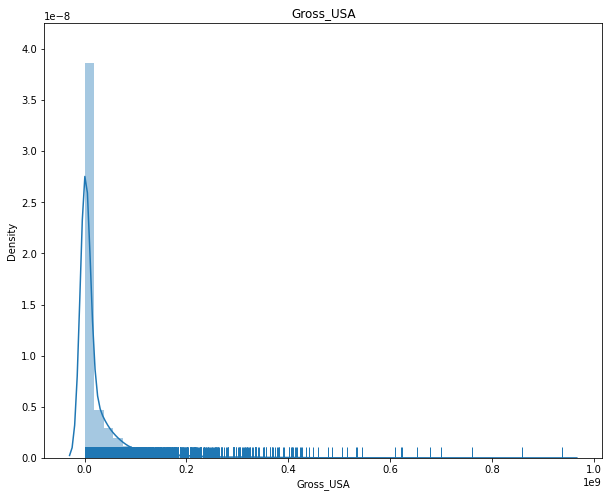

In [ ]:
#Gross USA 분포
x = df[target_var]

# sns.rugplot(x)
#sns.kdeplot(x)
sns.distplot(x, kde=True, rug=True)
plt.title(target_var)
plt.show()

In [ ]:
# #안쓰는 columns in training 
# drop_col = ['Unnamed: 0', 'Movie_title', 'Released_date', 'Opening Weekend date', 'year','Reality-TV', 'Rate', 'Rating_count'] #Rate, Rating 는 댓글 데이터에서.가져오기.
# df = df.drop(drop_col,axis = 1)

# dataset 탐색

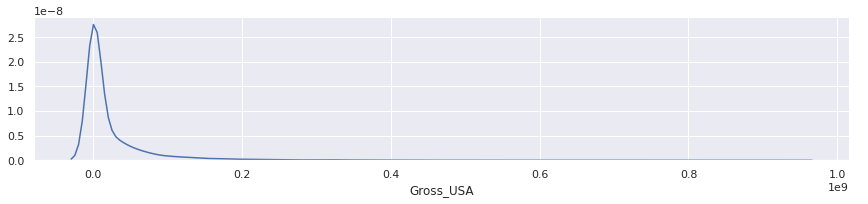

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
#이 코드는 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것- 안해도 잘 되던데..?

import seaborn as sns
sns.set() #이 명령어는 sns 기본 셋팅으로 불러오는것-?

facet = sns.FacetGrid(df, aspect=4) #도화지에 선긋기
facet.map(sns.kdeplot, target_var) #커널밀도 추정 kdeplot
facet.add_legend()

plt.show()

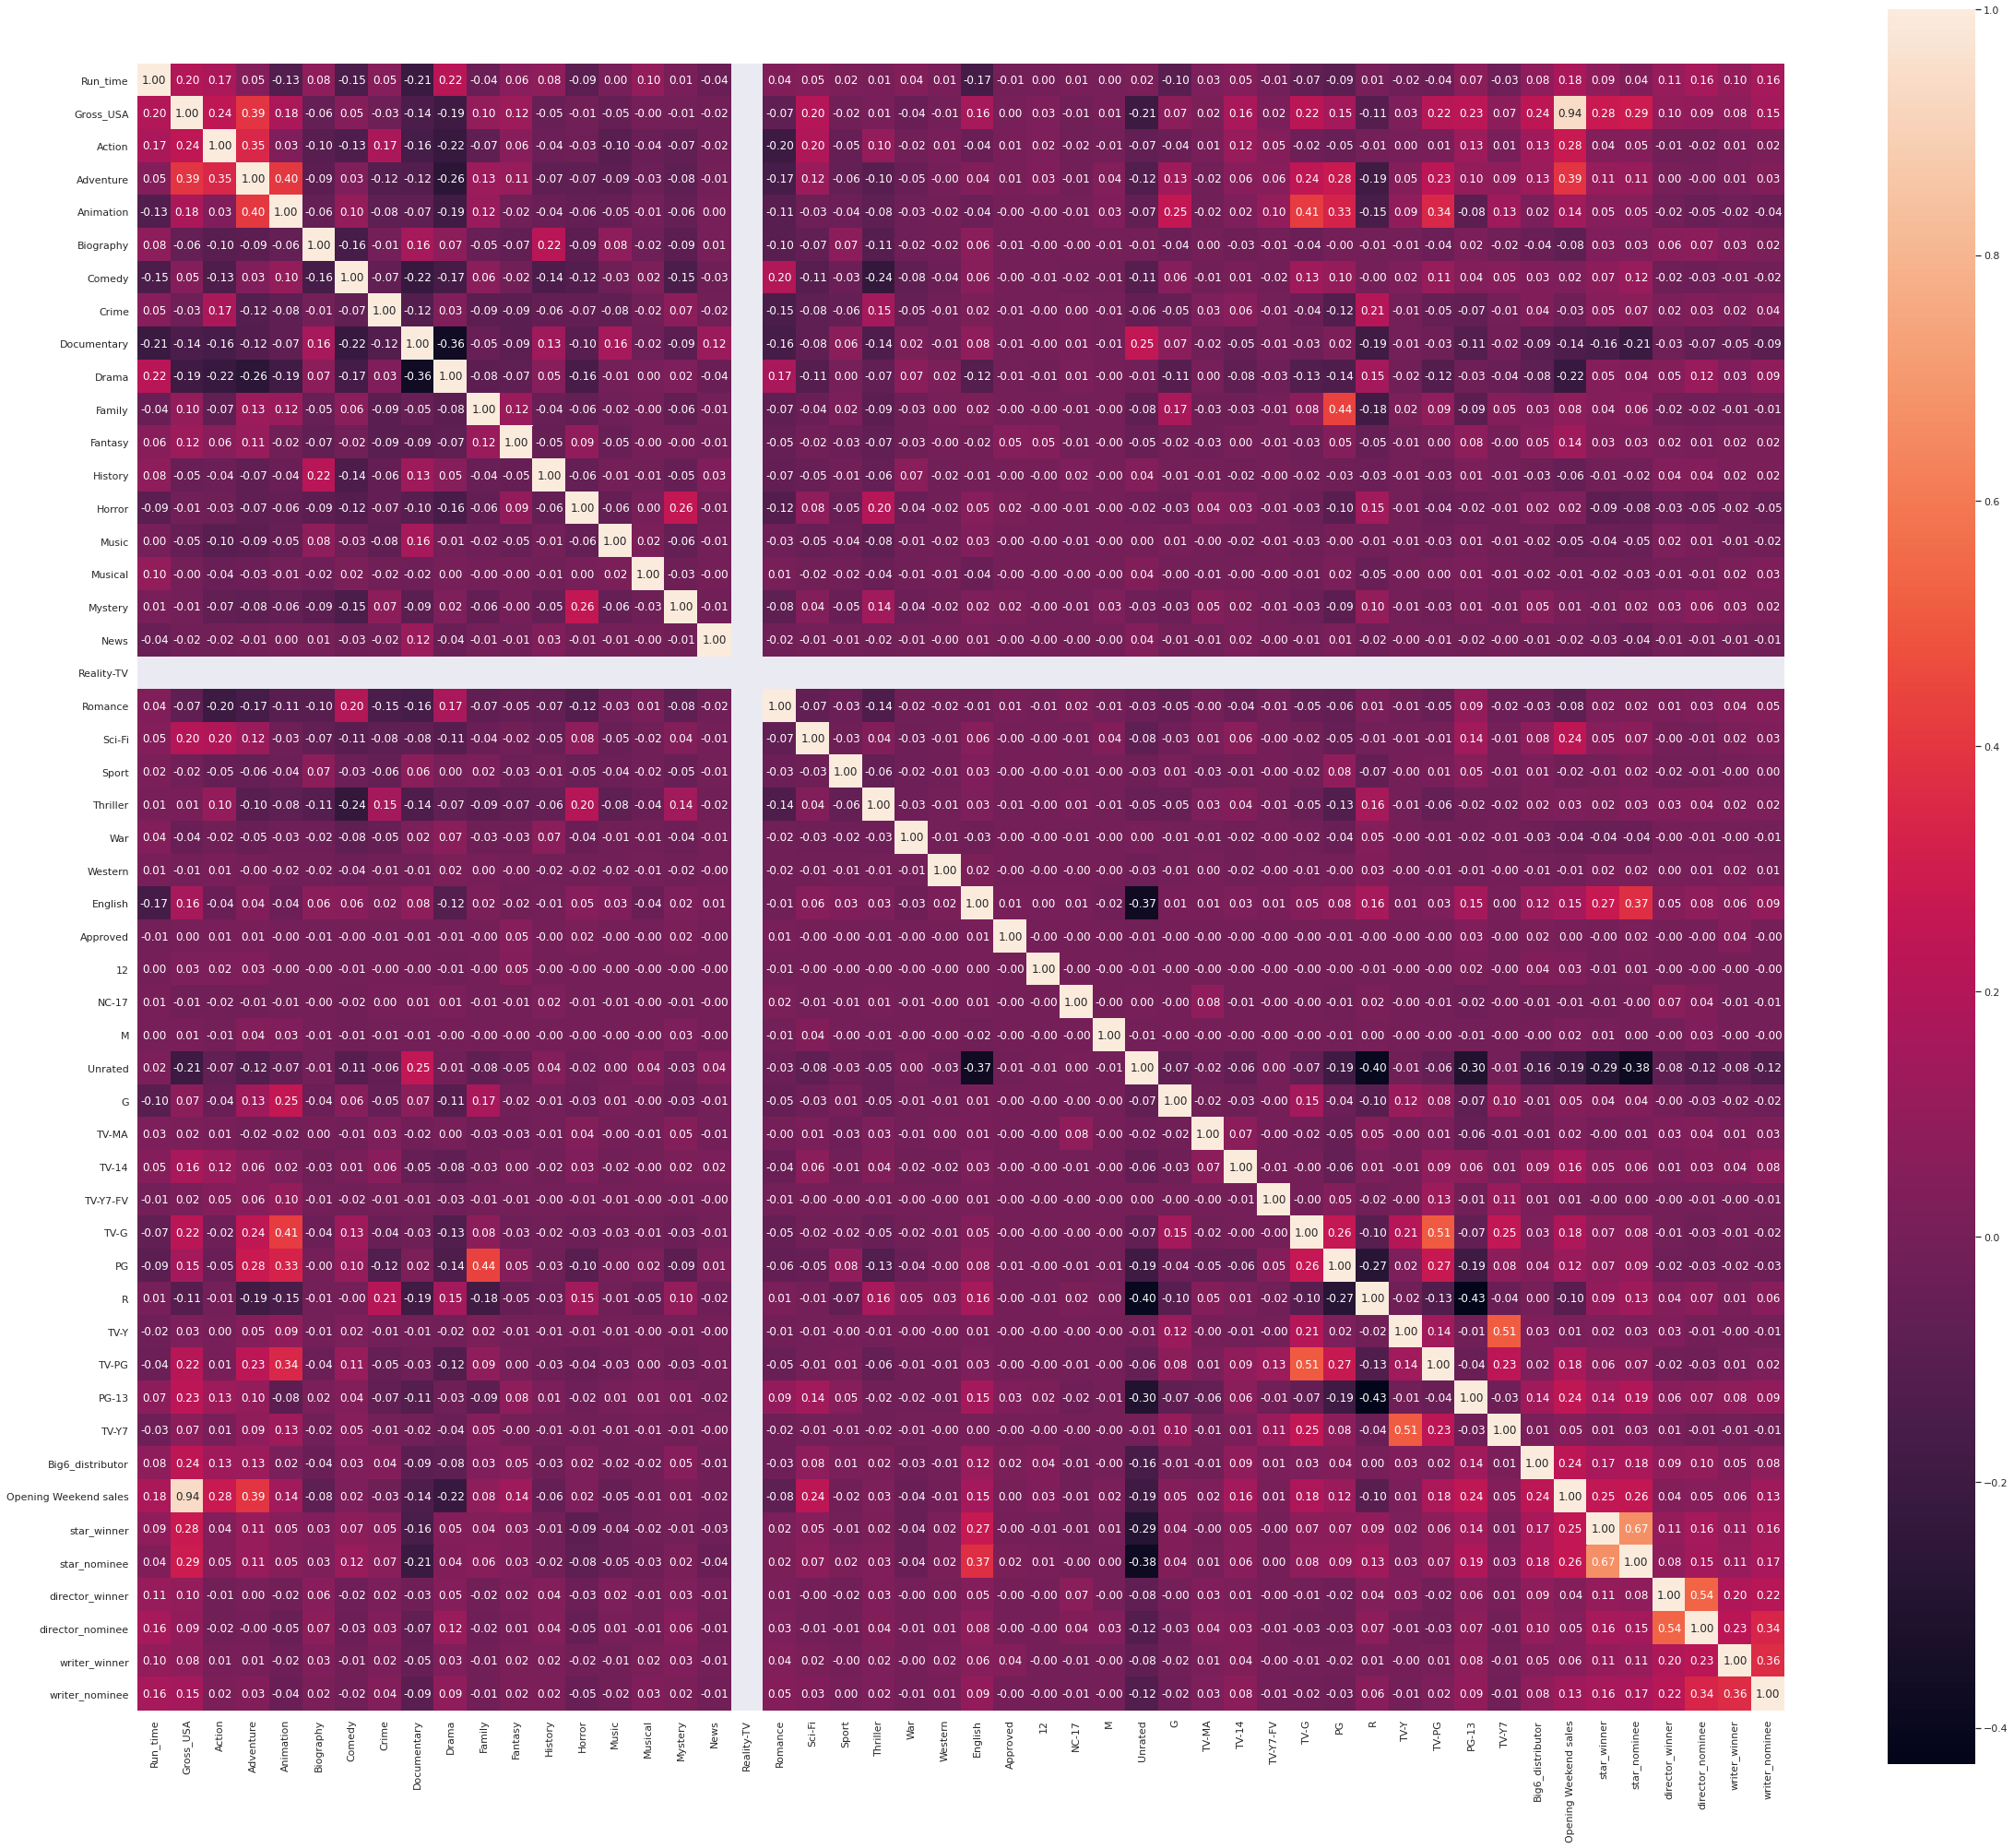

In [ ]:
#히트맵 필요할떄 돌리기

plt.figure(figsize=(40,35))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)

plt.show()

### 밑에 훈련 시엔 돌리지 마시오! 주석처리하기.

### Gross_USA/ Cumulative_ww 분석

In [ ]:
df['Gross_USA'].mean()

24916669.26053931

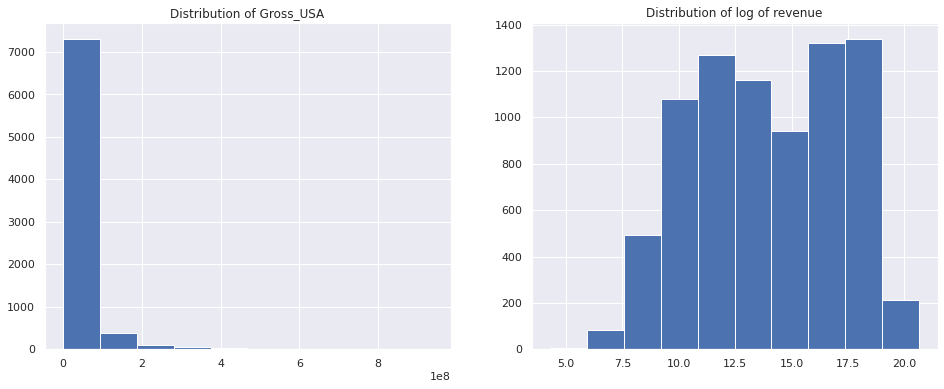

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
#plt.xticks(np.arange())
plt.hist(df['Gross_USA']);
plt.title('Distribution of Gross_USA');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['Gross_USA']));
plt.title('Distribution of log of revenue');

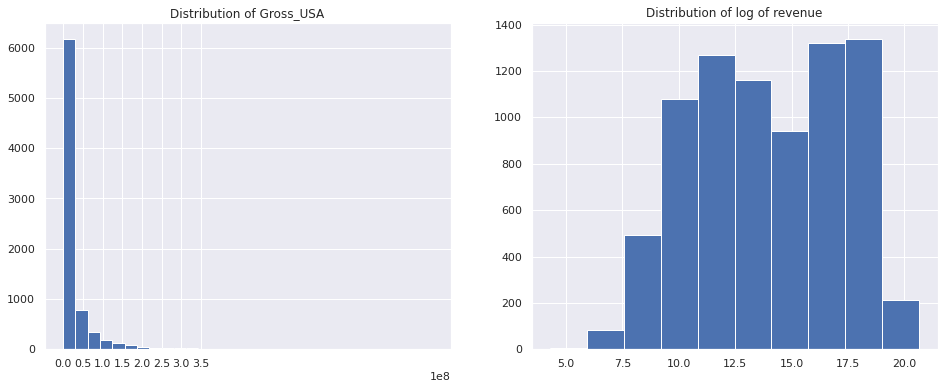

In [ ]:
#bins 세분화해서 보기
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
#plt.xticks(np.arange())
plt.hist(df['Gross_USA'],bins = 30);
plt.xticks(np.arange(0,400000000,50000000))
plt.title('Distribution of Gross_USA');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['Gross_USA']));
plt.title('Distribution of log of revenue');

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


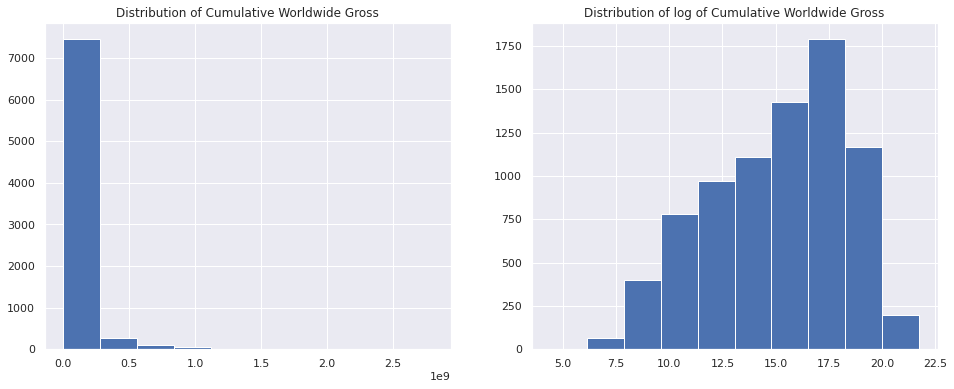

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Cumulative Worldwide Gross' ]);
plt.title('Distribution of Cumulative Worldwide Gross' );
plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['Cumulative Worldwide Gross' ]));
plt.title('Distribution of log of Cumulative Worldwide Gross');

### Runtime, revenue 분석

,Unnamed: 0,Movie_title,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Movie_code,imdb_url,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,year
5017,5017,La flor (2016),7.7,499,808,4032,4032.0,2 August 2019,tt9047474,https://www.imdb.com/title/tt9047474/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2308,11 August 2019,0,0,0,0,0,0,2019


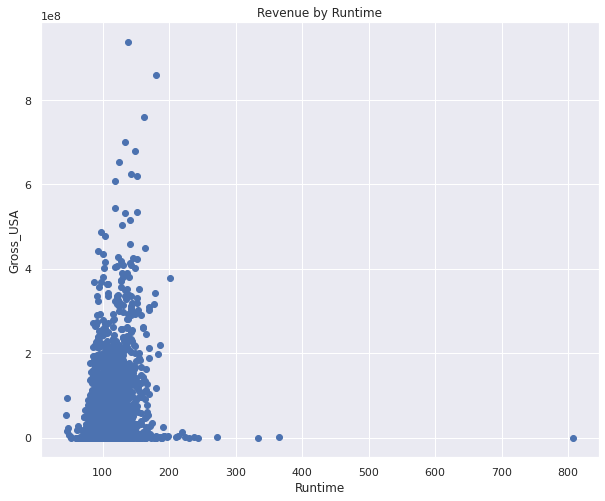

In [ ]:
# Run_time에 따른 revenue 파악
df = pd.read_csv("/gdrive/MyDrive/movie_predict/preprocessed_df/preprocessed_df_with_moviecode.csv")

plt.scatter(df['Run_time'],df[target_var])
plt.ylabel(target_var)
plt.xlabel('Runtime')
plt.title('Revenue by Runtime')





df[df['Run_time']==808] #la flor이라는 영화. 808분 맞음.

### Released_date

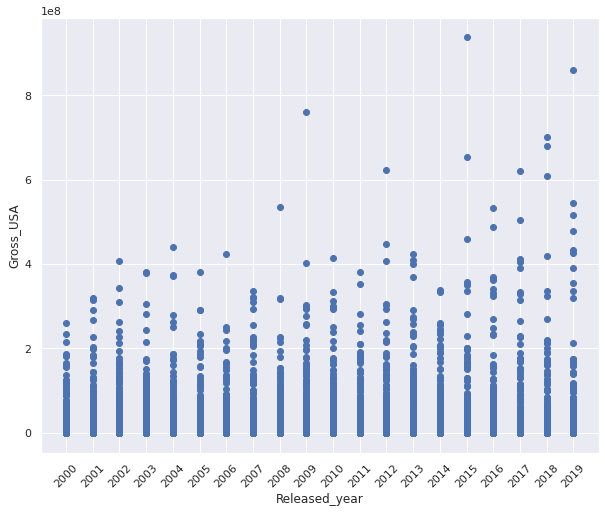

In [ ]:
df['Released_date'] = pd.to_datetime(df['Released_date'])
df['Released_year'] = df['Released_date'].dt.year
df['Released_month'] = df['Released_date'].dt.month
df['Released_day'] = df['Released_date'].dt.day
#year에 따른 수익 추이
plt.scatter(df['Released_year'],df['Gross_USA'])
plt.ylabel("Gross_USA")
plt.xlabel("Released_year")
plt.title("Gross_USA by Released_year")
plt.xticks(np.arange(2000,2020),rotation=45)
plt.title("Gross_USA by Released_month")
plt.show()

Text(0.5, 0, 'Released_month')

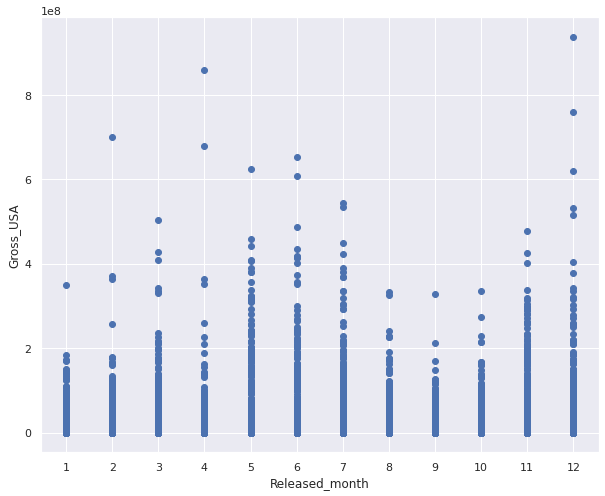

In [ ]:
plt.scatter(df['Released_month'],df['Gross_USA'])
plt.xticks(np.arange(1, 13))
plt.ylabel("Gross_USA")
plt.xlabel("Released_month")
plt.title("Gross_USA by Released_month")
plt.show()

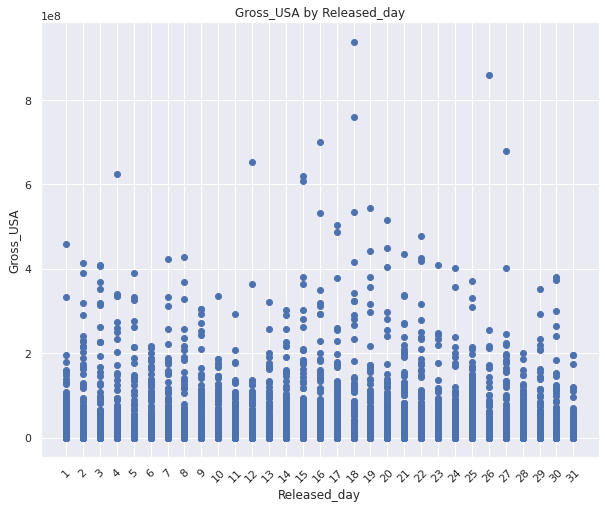

In [ ]:
#day
plt.scatter(df['Released_day'],df['Gross_USA'])
plt.ylabel("Gross_USA")
plt.xlabel("Released_day")
plt.title("Gross_USA by Released_day")
plt.xticks(np.arange(1,32),rotation=45)
plt.title("Gross_USA by Released_day")
plt.show()

In [ ]:
# #Scaling 없이 LR 돌리는 코드

# train_data = df.drop('Gross_USA',axis = 1)
# target_data = df['Gross_USA']

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 


# print(x_train.shape, y_train.shape,"\n")

# from sklearn.linear_model import LinearRegression

# lr = LinearRegression().fit(x_train,y_train)


# print("train set score(R square):",np.round(lr.score(x_train,y_train),2))
# print("test set score(R square):",np.round(lr.score(x_test,y_test),2))

## MPAA

In [ ]:
#TV- 이런놈들. 영화 등급이랑 꼭 일치하지는 않네.
df1 = pd.read_csv('/gdrive/MyDrive/movie_predict/preprocessed_df/preprocessed_df_with_moviecode.csv')
df1[df1['Reality-TV'] ==1] #빼도 될듯.
df1[df1['TV-MA'] == 1]

,Unnamed: 0,Movie_title,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Movie_code,imdb_url,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,year
72,72,Scary Movie (2000),6.2,230363,88,157019771,278019771.0,7 July 2000,tt0175142,https://www.imdb.com/title/tt0175142/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,42346669,9 July 2000,0,0,0,0,0,0,2000
87,87,The Tao of Steve (2000),6.6,7318,87,4342203,4406030.0,1 September 2000,tt0234853,https://www.imdb.com/title/tt0234853/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,91791,6 August 2000,0,0,0,0,0,0,2000
125,125,Bamboozled (2000),6.5,10351,135,2274979,2463650.0,20 October 2000,tt0215545,https://www.imdb.com/title/tt0215545/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,190720,8 October 2000,0,0,0,1,0,1,2000
173,173,Chocolat (2000),7.2,176313,121,71509363,152699946.0,19 January 2001,tt0241303,https://www.imdb.com/title/tt0241303/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,157624,17 December 2000,0,0,0,0,0,0,2001
184,184,The Claim (2000),6.4,5950,120,669258,885836.0,20 April 2001,tt0218378,https://www.imdb.com/title/tt0218378/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,7131,1 January 2001,1,1,0,0,0,0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,7744,Second Nature (2016),4.9,397,80,3774,3774.0,8 September 2017,tt5126654,https://www.imdb.com/title/tt5126654/?ref_=fn_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2978,10 September 2017,0,0,0,0,0,0,2017
7751,7751,Vengeance: A Love Story (2017),5.2,6717,99,4526,73270.0,15 September 2017,tt5460530,https://www.imdb.com/title/tt5460530/?ref_=fn_...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4526,17 September 2017,1,1,0,0,0,0,2017
7805,7805,Wasted! The Story of Food Waste (2017),7.5,354,85,33211,33211.0,13 October 2017,tt6207096,https://www.imdb.com/title/tt6207096/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,17189,15 October 2017,0,0,0,0,0,0,2017
7828,7828,Jigsaw (2017),5.8,67538,92,38052832,102952888.0,27 October 2017,tt3348730,https://www.imdb.com/title/tt3348730/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16640452,29 October 2017,0,0,0,0,0,0,2017


# (선택)Step-wise variable selection

In [ ]:
## Step-wise var selection(전진 단계별 선택법) ==>R에서 하기로.

variables =['Run_time', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'English', 'Approved', '12', 'NC-17', 'M', 'Unrated', 'G',
       'TV-MA', 'TV-14', 'TV-Y7-FV', 'TV-G', 'PG', 'R', 'TV-Y', 'TV-PG',
       'PG-13', 'TV-Y7', 'Big6_distributor', 'Opening Weekend sales',
       'star_winner', 'star_nominee', 'director_winner', 'director_nominee',
       'writer_winner', 'writer_nominee'] ## 설명 변수 리스트
 
y = df['Gross_USA'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05 #전진 유의수준
sl_remove = 0.05 #후진 유의수준
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## Lr에 적용.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X) #쓸 변수들 넣는거
        model = sm.OLS(y,X).fit() #회귀분석 학습 ols: ordinary least square sm.ols
        pval[col] = model.pvalues[col] #모델의 p-value
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
print(f"selected_variables:{selected_variables}")

vars = selected_variables + ['Gross_USA'] #stepwise + target변수
df = df[vars]
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


KeyError: ignored

In [ ]:
# Var selection


#1. step wise 1)df원본으로. 
step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'G', 'TV-14','TV-G', 'PG', 'TV-PG', 'PG-13', 'Big6_distributor', 'Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee']
step_df_cols.sort()
step_df_cols
step_df = df[step_df_cols]
step_df

#2. step_df를 x_train, y_train, x_test,y_test로 나누기. 그대로.





#step wise 2)Min_Max로. Min_Max한 df 쓰셈 ==> 필요없겠다. 어차피 opening weekend_USA만 다른데.. 굳이 해야되나? 
# step_Min_Max_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'Unrated', 'G', 'TV-14', 'TV-G', 'PG', 'R', 'TV-PG', 'PG-13', 'Big6_distributor', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee', 'Min_Max_Opening Weekend sales']
# step_Min_Max_cols.sort()
# step_Min_Max_cols
# step_Min_Max = df[step_Min_Max_cols]
# step_Min_Max
#print(step_df_cols.remove('Opening Weekend sales') == step_Min_Max_cols.remove('Min_Max_Opening Weekend sales'))
#>> True

# # #step wise 3)log로. 
# step_log_cols = ['Run_time', 'Action', 'Adventure', 'Biography', 'Crime', 
#     'Documentary', 'Drama', 'Family', 'History', 'Horror', 'Musical', 
#     'News', 'Sci-Fi', 'Sport', 'Thriller', 'English', 'NC-17', 'Unrated', 
#     'G', 'TV-MA', 'TV-14', 'PG', 'R', 'TV-PG', 'PG-13', 'Opening Weekend sales', 
#     'star_winner', 'star_nominee', 'director_nominee', 'writer_nominee']
# step_log_cols.sort()
# step_log_cols
# step_log = df[step_log_cols]
# step_log
# print(step_log_cols.remove('Opening Weekend sales') == step_Min_Max_cols.remove('Min_Max_Opening Weekend sales'))
#>> True

,Action,Adventure,Animation,Big6_distributor,Biography,Comedy,English,G,Horror,Musical,Opening Weekend sales,PG,PG-13,Run_time,Sci-Fi,TV-14,TV-G,TV-PG,director_winner,star_nominee,star_winner,writer_nominee,writer_winner
0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,14465156,0.0,0.0,98,0.0,1.0,0.0,0.0,0,0,0,0,0
1,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,5778639,0.0,1.0,90,1.0,0.0,0.0,0.0,0,1,1,0,0
2,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,56943,1.0,0.0,95,0.0,0.0,0.0,1.0,0,1,0,0,0
3,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,7602507,0.0,1.0,91,0.0,0.0,0.0,0.0,0,1,1,0,0
4,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0,1368705,0.0,0.0,95,0.0,0.0,0.0,0.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,10455,0.0,0.0,106,0.0,0.0,0.0,0.0,0,0,0,0,0
7895,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,125291,0.0,1.0,120,0.0,0.0,0.0,0.0,0,0,0,0,0
7896,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,36048,0.0,0.0,105,0.0,0.0,0.0,0.0,0,1,1,0,0
7897,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,5888,0.0,0.0,103,0.0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
x_tr = step_df.loc[0:6318,:]
x_te = step_df.loc[6318:,:]

,Action,Adventure,Animation,Big6_distributor,Biography,Comedy,English,G,Horror,Musical,Opening Weekend sales,PG,PG-13,Run_time,Sci-Fi,TV-14,TV-G,TV-PG,director_winner,star_nominee,star_winner,writer_nominee,writer_winner
0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,14465156,0.0,0.0,98,0.0,1.0,0.0,0.0,0,0,0,0,0
1,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,5778639,0.0,1.0,90,1.0,0.0,0.0,0.0,0,1,1,0,0
2,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,56943,1.0,0.0,95,0.0,0.0,0.0,1.0,0,1,0,0,0
3,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,7602507,0.0,1.0,91,0.0,0.0,0.0,0.0,0,1,1,0,0
4,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0,1368705,0.0,0.0,95,0.0,0.0,0.0,0.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6314,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.0,0.0,88,0.0,0.0,0.0,0.0,0,0,0,0,0
6315,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,12750297,0.0,0.0,102,1.0,0.0,0.0,0.0,0,1,0,0,0
6316,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,11731708,0.0,1.0,99,0.0,0.0,0.0,0.0,0,0,0,0,0
6317,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,15243,0.0,0.0,122,0.0,0.0,0.0,0.0,0,0,0,0,0


#2 Scaling, Train_Test_Split

### log, minmax.

In [ ]:
# #Scaling  이렇게 스케일링하면 점수 급감. log, minmax.

#ANN, 선형에서는 scaling해주는게 의미 있!! Tree모델같은 경우는 scaling하는게 안좋을 수도.

# #log openingweekend에
# df['log_Opening Weekend sales'] = df['Opening Weekend sales'].apply(lambda x: np.log(x))

# #Min-Max_scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(df)

# scaled = scaler.transform(df) #dataframe을 input으로 받고 array를 반환함.

# #Runtime Min_Max_Scaler 
# df_scaled = pd.DataFrame(data = scaled, columns = df.columns)
# df['Min_Max_run_time'] = df_scaled['Run_time']
# df['Min_Max_log_Opening Weekend sales'] = df_scaled['log_Opening Weekend sales']
# #df['log_Gross_USA'] = df['Gross_USA'].apply(lambda x: np.log(x))


# df_scaled = df.drop(['Run_time','Opening Weekend sales','log_Opening Weekend sales'],axis = 1)
# df_scaled

# train_data = df_scaled.drop('Gross_USA',axis = 1)
# target_data = df_scaled['Gross_USA']

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 



### [원본]opening_weekend에 Min-Max없이, log없이 그냥 쓰기

In [ ]:
#[Off] #1. Scaling 원본
# opening_weekend에 Min-Max없이,  log없이 그냥 쓰기


#Train, Test split
train_data = df.drop('Gross_USA',axis = 1)
target_data = df['Gross_USA']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 
x_train

,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,star_in_3weeks,rv_in_3_weeks
6466,102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14893,0,0,0,0,0,0,0.6933,17.0
489,124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14065277,0,1,0,1,1,1,0.7463,121.0
1170,97,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,22203007,1,1,0,0,0,0,0.8478,67.0
6249,120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,47259,0,0,0,0,0,0,1.0000,3.0
1837,106,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2205,0,0,0,0,0,0,0.8000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,144,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13567,0,0,0,0,0,0,0.7000,22.0
3264,87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,783,0,0,0,0,0,0,0.9429,10.0
1653,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,60898,1,1,0,0,0,0,0.5824,19.0
2607,102,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,9656250,1,1,1,1,0,1,0.6933,79.0


In [ ]:
x_train

,Run_time,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
1271,115,18000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,155560,1,1,0,0,0,0
405,88,7000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,54942,0,0,0,0,0,0
2822,131,29000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19132,0,0,0,0,0,0
2720,100,42000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,14005335,1,1,0,0,0,0
2468,119,8500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,189703,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,116,62000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13087307,1,1,0,1,0,0
3264,92,16000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,548,1,1,0,0,0,0
1653,101,65000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13427872,1,1,0,0,0,0
2607,106,30000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20269723,0,1,0,0,0,0


In [ ]:
# R에게 주기위해 만드는 x_train,y_train
train_df = pd.concat([x_train,y_train],axis = 1)
#train_df.to_csv('/gdrive/MyDrive/movie_predict/For_R/train_df.csv')


### -opening_weekend에 Min-Max함

In [ ]:
#평소에 쓰던거
# [Off]2. Scaling opening weekend min-max하기 // Cumulative도 추가함
# opening_weekend에 Min-Max함.  
# 

#Scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

scaled = scaler.transform(df) #dataframe을 input으로 받고 array를 반환함.

#Runtime Min_Max_Scaler 
df_scaled = pd.DataFrame(data = scaled, columns = df.columns)
df['Min_Max_run_time'] = df_scaled['Run_time']
df['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']
#df['log_Gross_USA'] = df['Gross_USA'].apply(lambda x: np.log(x))
#df['log_Opening Weekend sales'] = df['Opening Weekend sales'].apply(lambda x: np.log(x))

df_scaled = df.drop(['Run_time','Opening Weekend sales'],axis = 1)
df_scaled

#Train, Test split
train_data = df_scaled.drop(target_var,axis = 1)
target_data = df_scaled[target_var]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

y_test = np.array(y_test).reshape(-1,1)
x_train


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Min_Max_run_time,Min_Max_Opening Weekend sales
5183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.117955,7.050727e-04
7081,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.119266,5.460427e-07
3733,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0.076016,1.129187e-01
4974,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.062910,2.303273e-02
7535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.065531,5.670443e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.066841,1.781499e-05
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.090433,8.964536e-03
1653,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.090433,1.029412e-02
2607,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.044561,1.440517e-04


### [최종채택1] train에만 opening_weekend Min-Max 시킨거 (train scaler 로 test도)

In [ ]:
#평소에 쓰던거
# [Off]2. Scaling opening weekend min-max하기 // Cumulative도 추가함
# opening_weekend에 Min-Max함.  
# 

#Train, Test split
train_data = df.drop(target_var,axis = 1)
target_data = df[target_var]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

y_test = np.array(y_test).reshape(-1,1)
x_train

# #Scaling 

# #왜인지 nan나옴 ==> reset_index안해주고 합쳐서그럼. 찾아갈 인덱스가 없으니 nan을 return 할 수 밖에

# x_train minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(x_train) #dataframe을 input으로 받고 array를 반환함.

df_scaled = pd.DataFrame(data = scaled, columns = x_train.columns)
df_scaled
x_train.reset_index(drop = True, inplace = True)
x_train['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']

x_train = x_train.drop(['Opening Weekend sales'],axis = 1)
x_train

# x_test minmax scaling

scaled = scaler.transform(x_test) #dataframe을 input으로 받고 array를 반환함.

df_scaled = pd.DataFrame(data = scaled, columns = x_test.columns)
df_scaled
x_test.reset_index(drop = True, inplace = True)
x_test['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']

x_test = x_test.drop(['Opening Weekend sales'],axis = 1)
x_test

# # #직접 짠 Min_Max_scaler ==>없어도 됨. 그냥 스케일링 잘 되었나 test용
# def MMscaler(x):
#   return (x	- x_train['Opening Weekend sales'].min())/(x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min())

# x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: Min_Max_Scaler(x))

# def Min_Max_Scaler(value):
#   numerator = value	 - x_train['Opening Weekend sales'].min()
#   denomenator = x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min()
#   return (numerator/denomenator)
# x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: MMscaler(x))#이거는됨
# x_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,budget_exist,Min_Max_Opening Weekend sales
0,83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000016
1,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000171
2,98,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,0.000042
3,119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,0.001188
4,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,95,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000022
1576,92,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,0.000182
1577,124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0,1,0.035568
1578,117,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0,0,1,0.000124


In [ ]:
# # R을 위한 Min_Max_dataset
# # train, test 밑으로 합치기 ==> 이러면 안돼. 아직 많은 논의가 있지만 그래도 train만으로 var selection해야..
# y_tr = pd.DataFrame(y_train,columns = ['Gross_USA'])
# y_te = pd.DataFrame(y_test,columns = ['Gross_USA'])
# y = pd.concat([y_tr,y_te], axis = 0)
# y.reset_index(inplace = True,drop= True)
# x = pd.concat([x_train,x_test], axis = 0)
# x.reset_index(inplace = True,drop= True)

# df_scaled = pd.concat([x,y],axis = 1)
# df_scaled

In [ ]:
# #R에서 쓰게 train/ test 저장
# df_scaled.to_csv("/gdrive/MyDrive/movie_predict/For_R/Min_Max_df_scaled.csv")
# ## x_train.to_csv("/gdrive/MyDrive/movie_predict/For_R/Min_Max_train_df.csv")
# ## x_test.to_csv("/gdrive/MyDrive/movie_predict/For_R/Min_Max_test_df.csv")

In [ ]:
# #2. 위 셀에다 Runtime도 scaling추가 ==> 오히려 성능 더 나쁨. abort.
# # [Off]2. Scaling opening weekend min-max하기 // Cumulative도 추가함
# # opening_weekend에 Min-Max함.  


# #Train, Test split
# train_data = df.drop(target_var,axis = 1)
# target_data = df[target_var]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

# y_test = np.array(y_test).reshape(-1,1)
# x_train

# # #Scaling 

# # #왜인지 nan나옴 ==> reset_index안해주고 합쳐서그럼. 찾아갈 인덱스가 없으니 nan을 return 할 수 밖에

# # x_train minmax scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(x_train) #dataframe을 input으로 받고 array를 반환함.

# df_scaled = pd.DataFrame(data = scaled, columns = x_train.columns)
# df_scaled
# x_train.reset_index(drop = True, inplace = True)
# x_train['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']
# x_train['Min_Max_Run_time'] = df_scaled['Run_time']

# x_train = x_train.drop(['Opening Weekend sales','Run_time'],axis = 1)
# x_train

# # x_test minmax scaling
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(x_test) #dataframe을 input으로 받고 array를 반환함.

# df_scaled = pd.DataFrame(data = scaled, columns = x_test.columns)
# df_scaled
# x_test.reset_index(drop = True, inplace = True)
# x_test['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']
# x_test['Min_Max_Run_time'] = df_scaled['Run_time']

# x_test = x_test.drop(['Opening Weekend sales','Run_time'],axis = 1)
# x_test

# # # #직접 짠 Min_Max_scaler ==>없어도 됨. 그냥 스케일링 잘 되었나 test용
# # def MMscaler(x):
# #   return (x	- x_train['Opening Weekend sales'].min())/(x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min())

# # x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: Min_Max_Scaler(x))

# # def Min_Max_Scaler(value):
# #   numerator = value	 - x_train['Opening Weekend sales'].min()
# #   denomenator = x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min()
# #   return (numerator/denomenator)
# # x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: MMscaler(x))#이거는됨
# # x_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Min_Max_Opening Weekend sales,Min_Max_Run_time
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.000009,0.153374
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.000355,0.398773
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.000042,0.190184
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.092486,0.386503
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.000013,0.294479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000051,0.153374
1576,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.000181,0.153374
1577,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0.158580,0.245399
1578,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0.000027,0.300613


### Budget까지 min_max scaling

In [ ]:
#평소에 쓰던거
# [Off]2. Scaling opening weekend min-max하기 // Cumulative도 추가함
# opening_weekend에 Min-Max함.  
# 

#Train, Test split
train_data = df.drop(target_var,axis = 1)
target_data = df[target_var]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

y_test = np.array(y_test).reshape(-1,1)
x_train

# #Scaling 

# #왜인지 nan나옴 ==> reset_index안해주고 합쳐서그럼. 찾아갈 인덱스가 없으니 nan을 return 할 수 밖에

# x_train minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(x_train) #dataframe을 input으로 받고 array를 반환함.

df_scaled = pd.DataFrame(data = scaled, columns = x_train.columns)
df_scaled
x_train.reset_index(drop = True, inplace = True)
x_train['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']
x_train['Min_Max_Budget'] = df_scaled['Budget']
x_train = x_train.drop(['Opening Weekend sales','Budget'],axis = 1)
x_train

# x_test minmax scaling

scaled = scaler.transform(x_test) #dataframe을 input으로 받고 array를 반환함.

df_scaled = pd.DataFrame(data = scaled, columns = x_test.columns)
df_scaled
x_test.reset_index(drop = True, inplace = True)
x_test['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']
x_test['Min_Max_Budget'] = df_scaled['Budget']
x_test = x_test.drop(['Opening Weekend sales','Budget'],axis = 1)
x_test

# # # #직접 짠 Min_Max_scaler ==>없어도 됨. 그냥 스케일링 잘 되었나 test용
# # def MMscaler(x):
# #   return (x	- x_train['Opening Weekend sales'].min())/(x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min())

# # x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: Min_Max_Scaler(x))

# # def Min_Max_Scaler(value):
# #   numerator = value	 - x_train['Opening Weekend sales'].min()
# #   denomenator = x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min()
# #   return (numerator/denomenator)
# # x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: MMscaler(x))#이거는됨
# # x_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Min_Max_Opening Weekend sales,Min_Max_Budget
0,110,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0,0.027284,0.054517
1,96,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,1,0.042819,0.186916
2,122,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.000370,0.109034
3,117,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0,0.040400,0.186916
4,136,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0.093842,0.093458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,98,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.006310,0.003738
850,92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.242935,0.467290
851,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0.021760,0.049844
852,131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0.000564,0.046729


In [ ]:
# 3.Train 데이터 Test 데이터에 같은 scaler 적용

# [Off]2. Scaling opening weekend min-max하기 // Cumulative도 추가함
# opening_weekend에 Min-Max함.  
# 

#Train, Test split
train_data = df.drop(target_var,axis = 1)
target_data = df[target_var]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

y_test = np.array(y_test).reshape(-1,1)
x_train

# #Scaling 

# #왜인지 nan나옴 ==> reset_index안해주고 합쳐서그럼. 찾아갈 인덱스가 없으니 nan을 return 할 수 밖에

# x_train minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(x_train) #dataframe을 input으로 받고 array를 반환함.

df_scaled = pd.DataFrame(data = scaled, columns = x_train.columns)
df_scaled
x_train.reset_index(drop = True, inplace = True)
x_train['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']

x_train = x_train.drop(['Opening Weekend sales'],axis = 1)
x_train

# x_test minmax scaling

scaled = scaler.transform(x_test) #dataframe을 input으로 받고 array를 반환함.

df_scaled = pd.DataFrame(data = scaled, columns = x_test.columns)
df_scaled
x_test.reset_index(drop = True, inplace = True)
x_test['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']

x_test = x_test.drop(['Opening Weekend sales'],axis = 1)
x_test

# # #직접 짠 Min_Max_scaler ==>없어도 됨. 그냥 스케일링 잘 되었나 test용
# def MMscaler(x):
#   return (x	- x_train['Opening Weekend sales'].min())/(x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min())

# x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: Min_Max_Scaler(x))

# def Min_Max_Scaler(value):
#   numerator = value	 - x_train['Opening Weekend sales'].min()
#   denomenator = x_train['Opening Weekend sales'].max() - x_train['Opening Weekend sales'].min()
#   return (numerator/denomenator)
# x_train['Min_Max_Opening Weekend sales'] = x_train['Opening Weekend sales'].apply(lambda x: MMscaler(x))#이거는됨
# x_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Min_Max_Opening Weekend sales
0,92,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.000013
1,132,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.000512
2,98,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.000061
3,130,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.133196
4,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,92,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000074
1576,92,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0.000261
1577,107,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0.228383
1578,116,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0.000039


In [ ]:
# train에만 opening_weekend Min-Max 시킨거 (train,test에 같은 scaler)

(구버전) Gross USA에 log 씌워 학습 후 exponential

In [ ]:
# .Gross USA에 log 씌워 학습 후 다시 exponential 해보기 on--> off 이상함.

# # opening_weekend에 Min-Max함.  

# #Scaling 
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(df)

# scaled = scaler.transform(df) #dataframe을 input으로 받고 array를 반환함.

# #Runtime Min_Max_Scaler 
# df_scaled = pd.DataFrame(data = scaled, columns = df.columns)
# df['Min_Max_run_time'] = df_scaled['Run_time']
# df['Min_Max_Opening Weekend sales'] = df_scaled['Opening Weekend sales']
# #df['log_Gross_USA'] = df['Gross_USA'].apply(lambda x: np.log(x))
# #df['log_Opening Weekend sales'] = df['Opening Weekend sales'].apply(lambda x: np.log(x))

# df_scaled = df.drop(['Run_time','Opening Weekend sales'],axis = 1)
# df_scaled

# #Train, Test split
# train_data = df_scaled.drop('Gross_USA',axis = 1)
# target_data = df_scaled['Gross_USA']
# target_data = target_data.map(lambda x: np.log(x))

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 


In [ ]:
#4. log 씌우기 변수, target에도
# [On].  
# df log scaler
def scale_log(col_name):
  log_col_name = 'log_' + col_name
  df[log_col_name] = df[col_name].apply(lambda x: np.log(x))
  df = df.drop(col_name, axis = 1)
  return df[log_col_name]

df_cols = ['Run_time','Gross_USA','Opening Weekend sales']
for col_name in df_cols:
  print(col_name)
  scale_log(col_name)
# df_scaled = df.drop(['Run_time','Opening Weekend sales'],axis = 1)
# df_scaled

# #Train, Test split
# train_data = df_scaled.drop(target_var,axis = 1)
# target_data = df_scaled[target_var]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

# y_test = np.array(y_test).reshape(-1,1)
# x_train


Run_time


UnboundLocalError: ignored

###op_week, grossUSA 변수에 log모두

In [ ]:
#4. log 씌우기 변수, target에도 #에러 고친
# [On].  
# df log scaler

# def scale_log(col_name):
#   global df # 밑에 drop을 사용하려면 필연적으로 df = 식 처럼 df에 할당해줘야함. 그런데 그러면 def에서 전역/지역변수 문제 발생. global 해주면 말끔히 해결.
#   log_col_name = 'log_' + col_name
#   df[log_col_name] = df[col_name].apply(lambda x: np.log(x))
#   df = df.drop(col_name, axis = 1) #이거때매그럼.
#   return df[log_col_name]

# drop 안하고 컬럼명 그대로 쓰기
def scale_log(col_name):
  global df
  df[col_name] = df[col_name].apply(lambda x: np.log(x))
  return df[col_name]

df_cols = [target_var,'Opening Weekend sales'] # 'Run_time'은 제외함. log를 취하는 이유가 skewed함을 줄여주기위해선데 Runtime은 이미 잘되어있음.
for col_name in df_cols:
  scale_log(col_name)
df_scaled = df
df_scaled

#Train, Test split
train_data = df_scaled.drop(target_var,axis = 1)
target_data = df_scaled[target_var]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

y_test = np.array(y_test).reshape(-1,1)
x_train


,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
5183,1.590311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.078488,0,0,0,0,0,0
7081,1.591815,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.628200,0,0,0,0,0,0
3733,1.533578,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.050541,0,1,0,0,0,1
4974,1.511296,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.017873,1,1,0,0,0,0
7535,1.515979,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.343109,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.518276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.254726,0,0,0,0,0,0
3264,1.555235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,-0.004295,1,1,0,0,0,0
1653,1.555235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-0.000897,0,0,0,0,0,0
2607,1.474637,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-0.140621,0,0,0,0,0,0


### [최종채택2] op_week, grossUSA 변수에 log모두 + exp 씌움대비

In [ ]:
# log 씌우기 변수, target에도 #에러 고친
# [On].  
# df log scaler

# def scale_log(col_name):
#   global df # 밑에 drop을 사용하려면 필연적으로 df = 식 처럼 df에 할당해줘야함. 그런데 그러면 def에서 전역/지역변수 문제 발생. global 해주면 말끔히 해결.
#   log_col_name = 'log_' + col_name
#   df[log_col_name] = df[col_name].apply(lambda x: np.log(x))
#   df = df.drop(col_name, axis = 1) #이거때매그럼.
#   return df[log_col_name]

# drop 안하고 컬럼명 그대로 쓰기
def scale_log(col_name):
  global df
  df[col_name] = df[col_name].apply(lambda x: np.log(x))
  return df[col_name]

df_cols = [target_var,'Opening Weekend sales'] # 'Run_time'은 제외함. log를 취하는 이유가 skewed함을 줄여주기위해선데 Runtime은 이미 잘되어있음.
for col_name in df_cols:
  scale_log(col_name)
df_scaled = df
df_scaled

#Train, Test split
train_data = df_scaled.drop(target_var,axis = 1)
target_data = df_scaled[target_var]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 

y_test = np.array(y_test).reshape(-1,1)
y_test = np.exp(y_test)
x_train

,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
5183,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.436557,0,0,0,0,0,0
7081,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.501258,0,0,0,0,0,0
3733,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,17.512483,0,1,0,0,0,1
4974,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,15.922736,1,1,0,0,0,0
7535,95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.637716,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.765927,0,0,0,0,0,0
3264,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14.979105,1,1,0,0,0,0
1653,114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,15.117400,0,0,0,0,0,0
2607,79,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,10.849201,0,0,0,0,0,0


In [ ]:
# # #R에서 쓰게 train/ test 저장
# df_scaled.to_csv("/gdrive/MyDrive/movie_predict/For_R/log_exp_df_scaled.csv") 
# # ## x_train.to_csv("/gdrive/MyDrive/movie_predict/For_R/log_exp_train_df.csv") 
# # ## x_test.to_csv("/gdrive/MyDrive/movie_predict/For_R/log_exp_test_df.csv") 

In [ ]:
# # Gross_USA 실험 --> 단위
# plt.rcParams['figure.figsize'] = [30, 25] # setting figure size
# plt.scatter(df.index, # x
#            df['Gross_USA'], # y
#            alpha=0.2,
#            cmap='viridis')
# #plt.yticks([0,200000000,400000000,600000000,800000000]) # y축 단위 바꾸기


# plt.title('Scatter Plot of Gross_USA', fontsize=14)
# plt.xlabel('df_index', fontsize=12)
# plt.ylabel('Gross_USA $', fontsize=12)
# plt.colorbar()
# plt.show()
# #800,000,000
# #x 축에 시간이나 차라리 다른 feauture를 넣어보자 (히스토그램으로도 추가가능!)

### log 씌워서 

In [ ]:
def scale_log(col_name):
  global df
  df[col_name] = df[col_name].apply(lambda x: np.log(x))
  return df[col_name]


# 3 Random_seed

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

# 4 Metrics for Regression

In [ ]:
# ## 아마 R square값은 딥러닝에서 작동 안할것. 왜냐하면 sklearn기반이라,, ㄴㄴ 잘하지. y_pred만 갖다주면 되는데.(컨셉 이제 이해함.)

# #성과지표를 함수 하나로 만들기
# #LR학습, 예측, 성과평가
# #R, MAE, MSE, RMSE, MAPE, MPE

# def metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred):
#   # R square
#   print("train set score(R square):",np.round(model.score(x_train,y_train),2))
#   print("test set score(R square):",np.round(model.score(x_test,y_test),2),"\n")

#   #y_train= np.array(y_train)
#   #y_test = np.array(y_train)
#   # MAE Mean absolute error --> MSE보다 특이치에 robust 절댓값이라서
#   print("train set score(MAE):",np.round(mean_absolute_error(y_train, train_pred),2)) #.sklearnmetrics(y_true, y_pred)
#   print("test set score(MAE):",np.round(mean_absolute_error(y_test, test_pred),2),"\n")

#   # MSE Mean Squatred Error
#   print("train set score(MSE):",np.round(mean_squared_error(y_train,train_pred),2))
#   print("test set score(MSE):",np.round((mean_squared_error(y_test,test_pred)),2),"\n")

#   # RMSE Root Mean Sqaured Error
#   print("train set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_train,train_pred)),2))
#   print("test set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2),"\n")

#   # MAPE Mean Absolute Percentage Error

#   def MAPE(y_true, y_pred): 
#       return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

#   print("train set score(MAPE):",MAPE(y_train,train_pred))
#   print("test set score(MAPE):",MAPE(y_test,test_pred),"\n")

#   #MPE Mean Percentage Error

#   def MPE(y_true, y_pred): 
#       return np.round(np.mean((y_true - y_pred) / y_true) * 100,2)

#   print("train set score(MPE):", MPE(y_train,train_pred),"%")
#   print("test set score(MPE):", MPE(y_test,test_pred),"%") #overperformance

#   #lr.score 코알라 참조 https://book.coalastudy.com/data-science-lv1/week5/stage3
#   #나머진 https://partrita.github.io/posts/regression-error/ 참조

In [ ]:
# # r2 sklearn꺼로 수정해서 다시 구현, mape sklearn꺼는 안됨. 없음. --> 수정, r2 squared 추가

# def metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred):
#   # R square
#   # print("train set score(R square):",np.round(model.score(x_train,y_train),2))
#   # print("test set score(R square):",np.round(model.score(x_test,y_test),2),"\n")
#   r2_train = np.round(r2_score(y_train, train_pred),2)
#   r2_test = np.round(r2_score(y_test, test_pred),2)

#   print("train set score(R square):",r2_train)
#   print("test set score(R square):",r2_test,"\n")

#   def adjusted_r_squared(X, Y, r2):
#       '''
#       Returns a computed Adjusted R-Squared Coefficient.
      
#       Parameters
#       ----------
#       X : Pandas DataFrame
#           A pandas DataFrame including all the independant variables. Could be a series if there is only one predictor.
          
#       Y : Pandas DataFrame or Series
#           Labels or response variables 'Y'.
          
#       r2 : float
#           R-Squared Coefficient
#       '''
#       n = len(Y)
#       p = X.shape[1]
#       adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

#       return adj_r
#   print("train set score(adj R square):",np.round(adjusted_r_squared(x_train, y_train,r2_train),2))
#   print("test set score(adj R square):",np.round(adjusted_r_squared(x_test, y_test,r2_test),2),"\n")


#   #y_train= np.array(y_train)
#   #y_test = np.array(y_train)
#   # MAE Mean absolute error --> MSE보다 특이치에 robust 절댓값이라서
#   print("train set score(MAE):",np.round(mean_absolute_error(y_train, train_pred),2)) #.sklearnmetrics(y_true, y_pred)
#   print("test set score(MAE):",np.round(mean_absolute_error(y_test, test_pred),2),"\n")

#   # MSE Mean Squatred Error
#   print("train set score(MSE):",np.round(mean_squared_error(y_train,train_pred),2))
#   print("test set score(MSE):",np.round((mean_squared_error(y_test,test_pred)),2),"\n")

#   # RMSE Root Mean Sqaured Error
#   print("train set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_train,train_pred)),2))
#   print("test set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2),"\n")

#   # MAPE Mean Absolute Percentage Error

#   def MAPE(y_true, y_pred): 
#       return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

#   print("train set score(MAPE):",MAPE(y_train,train_pred))
#   print("test set score(MAPE):",MAPE(y_test,test_pred),"\n")            

#   # #MPE Mean Percentage Error --> 제외. 

#   # def MPE(y_true, y_pred): 
#   #     return np.round(np.mean((y_true - y_pred) / y_true) * 100,2)

#   # print("train set score(MPE):", MPE(y_train,train_pred),"%")
#   # print("test set score(MPE):", MPE(y_test,test_pred),"%") 


# #   #lr.score 코알라 참조 https://book.coalastudy.com/data-science-lv1/week5/stage3
# #   #나머진 https://partrita.github.io/posts/regression-error/ 참조

In [ ]:
ev_df_material

{'ann_adjr2_test': nan,
 'ann_adjr2_train': nan,
 'ann_mae_test': nan,
 'ann_mae_train': nan,
 'ann_mape_test': nan,
 'ann_mape_train': nan,
 'ann_mse_test': nan,
 'ann_mse_train': nan,
 'ann_r2_test': nan,
 'ann_r2_train': nan,
 'ann_rmse_test': nan,
 'ann_rmse_train': nan,
 'cnn_adjr2_test': nan,
 'cnn_adjr2_train': nan,
 'cnn_mae_test': nan,
 'cnn_mae_train': nan,
 'cnn_mape_test': nan,
 'cnn_mape_train': nan,
 'cnn_mse_test': nan,
 'cnn_mse_train': nan,
 'cnn_r2_test': nan,
 'cnn_r2_train': nan,
 'cnn_rmse_test': nan,
 'cnn_rmse_train': nan,
 'lr_adjr2_test': nan,
 'lr_adjr2_train': nan,
 'lr_mae_test': nan,
 'lr_mae_train': nan,
 'lr_mape_test': nan,
 'lr_mape_train': nan,
 'lr_mse_test': nan,
 'lr_mse_train': nan,
 'lr_r2_test': 0.93,
 'lr_r2_train': 1,
 'lr_rmse_test': nan,
 'lr_rmse_train': nan,
 'name': nan,
 'rf_adjr2_test': nan,
 'rf_adjr2_train': nan,
 'rf_mae_test': nan,
 'rf_mae_train': nan,
 'rf_mape_test': nan,
 'rf_mape_train': nan,
 'rf_mse_test': nan,
 'rf_mse_train'

## log 안씌웠을때 metrics

train, test 정확도 모두 print

In [ ]:
# RMLSLE도 추가한 버젼 --> 뺌. (다른 논문에서 활용하지 않음-->이는 새로 증명해야할 부분.)
from sklearn.metrics import make_scorer

# r2 sklearn꺼로 수정해서 다시 구현, mape sklearn꺼는 안됨. 없음. --> 수정, r2 squared 추가

def metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred):
  # R square
  # print("train set score(R square):",np.round(model.score(x_train,y_train),2))
  # print("test set score(R square):",np.round(model.score(x_test,y_test),2),"\n")
  r2_train = np.round(r2_score(y_train, train_pred),2)
  r2_test = np.round(r2_score(y_test, test_pred),2)

  print("train set score(R square):",r2_train)
  print("test set score(R square):",r2_test,"\n")

  ev_df_material[model_name + '_r2_train'] = r2_train 
  ev_df_material[model_name + '_r2_test'] = r2_test

  def adjusted_r_squared(X, Y, r2):
      '''
      Returns a computed Adjusted R-Squared Coefficient.
      
      Parameters
      ----------
      X : Pandas DataFrame
          A pandas DataFrame including all the independant variables. Could be a series if there is only one predictor.
          
      Y : Pandas DataFrame or Series
          Labels or response variables 'Y'.
          
      r2 : float
          R-Squared Coefficient
      '''
      n = len(Y)
      p = X.shape[1]
      adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

      return adj_r
  print("train set score(adj R square):",np.round(adjusted_r_squared(x_train, y_train,r2_train),2))
  print("test set score(adj R square):",np.round(adjusted_r_squared(x_test, y_test,r2_test),2),"\n")

  ev_df_material[model_name + '_adjr2_train'] = np.round(adjusted_r_squared(x_train, y_train,r2_train),2)
  ev_df_material[model_name + '_adjr2_test'] = np.round(adjusted_r_squared(x_test, y_test,r2_test),2)
  #y_train= np.array(y_train)
  #y_test = np.array(y_train)
  # MAE Mean absolute error --> MSE보다 특이치에 robust 절댓값이라서
  print("train set score(MAE):",np.round(mean_absolute_error(y_train, train_pred),2)) #.sklearnmetrics(y_true, y_pred)
  print("test set score(MAE):",np.round(mean_absolute_error(y_test, test_pred),2),"\n")
  
  ev_df_material[model_name + '_mae_train'] = np.round(mean_absolute_error(y_train, train_pred),2)
  ev_df_material[model_name + '_mae_test'] =np.round(mean_absolute_error(y_test, test_pred),2)
  

  # MSE Mean Squatred Error
  print("train set score(MSE):",np.round(mean_squared_error(y_train,train_pred),2))
  print("test set score(MSE):",np.round((mean_squared_error(y_test,test_pred)),2),"\n")

  ev_df_material[model_name + '_mse_train'] = np.round(mean_squared_error(y_train,train_pred),2)
  ev_df_material[model_name + '_mse_test'] = np.round((mean_squared_error(y_test,test_pred)),2)
  

  # RMSE Root Mean Sqaured Error
  print("train set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_train,train_pred)),2))
  print("test set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2),"\n")

  ev_df_material[model_name + '_rmse_train'] = np.round(np.sqrt(mean_squared_error(y_train,train_pred)),2)
  ev_df_material[model_name + '_rmse_test'] = np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2)
  

  # MAPE Mean Absolute Percentage Error

  def MAPE(y_true, y_pred): 
      return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

  print("train set score(MAPE):",MAPE(y_train,train_pred),"%")
  print("test set score(MAPE):",MAPE(y_test,test_pred),"%","\n")       
  
  ev_df_material[model_name + '_mape_train'] = MAPE(y_train,train_pred)
  ev_df_material[model_name + '_mape_test'] = MAPE(y_test,test_pred) 
  
 

  # #MPE Mean Percentage Error --> 제외. 

  # def MPE(y_true, y_pred): 
  #     return np.round(np.mean((y_true - y_pred) / y_true) * 100,2)

  # print("train set score(MPE):", MPE(y_train,train_pred),"%")
  # print("test set score(MPE):", MPE(y_test,test_pred),"%") 



  # def rmsle(y_pred, y_test) : 
  #   assert len(y_test) == len(y_pred)
  #   return np.sqrt(np.mean((np.log(1+y_test) - np.log(1+y_pred))**2)) 
  # print("train set score(RMSLE):",rmsle(train_pred,y_train))
  # print("test set score(RMSLE):",rmsle(test_pred, y_test))  

#   #lr.score 코알라 참조 https://book.coalastudy.com/data-science-lv1/week5/stage3
#   #나머진 https://partrita.github.io/posts/regression-error/ 참조
# RMSLE 는 https://www.kaggle.com/marknagelberg/rmsle-function 참조

In [ ]:
# RMLSLE도 추가한 버젼 --> 뺌. (다른 논문에서 활용하지 않음-->이는 새로 증명해야할 부분.)
# mape 절대값 고친거. 뭐..별차이없음.

from sklearn.metrics import make_scorer

# r2 sklearn꺼로 수정해서 다시 구현, mape sklearn꺼는 안됨. 없음. --> 수정, r2 squared 추가

def metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred):
  # R square
  # print("train set score(R square):",np.round(model.score(x_train,y_train),2))
  # print("test set score(R square):",np.round(model.score(x_test,y_test),2),"\n")
  r2_train = np.round(r2_score(y_train, train_pred),2)
  r2_test = np.round(r2_score(y_test, test_pred),2)

  print("train set score(R square):",r2_train)
  print("test set score(R square):",r2_test,"\n")

  def adjusted_r_squared(X, Y, r2):
      '''
      Returns a computed Adjusted R-Squared Coefficient.
      
      Parameters
      ----------
      X : Pandas DataFrame
          A pandas DataFrame including all the independant variables. Could be a series if there is only one predictor.
          
      Y : Pandas DataFrame or Series
          Labels or response variables 'Y'.
          
      r2 : float
          R-Squared Coefficient
      '''
      n = len(Y)
      p = X.shape[1]
      adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

      return adj_r
  print("train set score(adj R square):",np.round(adjusted_r_squared(x_train, y_train,r2_train),2))
  print("test set score(adj R square):",np.round(adjusted_r_squared(x_test, y_test,r2_test),2),"\n")


  #y_train= np.array(y_train)
  #y_test = np.array(y_train)
  # MAE Mean absolute error --> MSE보다 특이치에 robust 절댓값이라서
  print("train set score(MAE):",np.round(mean_absolute_error(y_train, train_pred),2)) #.sklearnmetrics(y_true, y_pred)
  print("test set score(MAE):",np.round(mean_absolute_error(y_test, test_pred),2),"\n")

  # MSE Mean Squatred Error
  print("train set score(MSE):",np.round(mean_squared_error(y_train,train_pred),2))
  print("test set score(MSE):",np.round((mean_squared_error(y_test,test_pred)),2),"\n")

  # RMSE Root Mean Sqaured Error
  print("train set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_train,train_pred)),2))
  print("test set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2),"\n")

  # MAPE Mean Absolute Percentage Error

  def MAPE(y_true, y_pred): 
      return np.round(np.mean((np.abs(y_true - y_pred) / y_true)) * 100,2)

  print("train set score(MAPE):",MAPE(y_train,train_pred),"%")
  print("test set score(MAPE):",MAPE(y_test,test_pred),"%","\n")            

  # #MPE Mean Percentage Error --> 제외. 

  # def MPE(y_true, y_pred): 
  #     return np.round(np.mean((y_true - y_pred) / y_true) * 100,2)

  # print("train set score(MPE):", MPE(y_train,train_pred),"%")
  # print("test set score(MPE):", MPE(y_test,test_pred),"%") 



  # def rmsle(y_pred, y_test) : 
  #   assert len(y_test) == len(y_pred)
  #   return np.sqrt(np.mean((np.log(1+y_test) - np.log(1+y_pred))**2)) 
  # print("train set score(RMSLE):",rmsle(train_pred,y_train))
  # print("test set score(RMSLE):",rmsle(test_pred, y_test))  

#   #lr.score 코알라 참조 https://book.coalastudy.com/data-science-lv1/week5/stage3
#   #나머진 https://partrita.github.io/posts/regression-error/ 참조
# RMSLE 는 https://www.kaggle.com/marknagelberg/rmsle-function 참조

## log 씌웠을때 metrics ev_df추가 안됨

test 정확도만 print

In [ ]:
# LOG씌워서 학습할때 돌리셈
# RMLSLE도 추가한 버젼 --> 뺌. (다른 논문에서 활용하지 않음-->이는 새로 증명해야할 부분.)
from sklearn.metrics import make_scorer

# r2 sklearn꺼로 수정해서 다시 구현, mape sklearn꺼는 안됨. 없음. --> 수정, r2 squared 추가

def metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred):
  # R square
  # print("train set score(R square):",np.round(model.score(x_train,y_train),2))
  # print("test set score(R square):",np.round(model.score(x_test,y_test),2),"\n")
  r2_train = np.round(r2_score(y_train, train_pred),2)
  r2_test = np.round(r2_score(y_test, test_pred),2)


  print("test set score(R square):",r2_test,"\n")

  def adjusted_r_squared(X, Y, r2):
      '''
      Returns a computed Adjusted R-Squared Coefficient.
      
      Parameters
      ----------
      X : Pandas DataFrame
          A pandas DataFrame including all the independant variables. Could be a series if there is only one predictor.
          
      Y : Pandas DataFrame or Series
          Labels or response variables 'Y'.
          
      r2 : float
          R-Squared Coefficient
      '''
      n = len(Y)
      p = X.shape[1]
      adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

      return adj_r

  print("test set score(adj R square):",np.round(adjusted_r_squared(x_test, y_test,r2_test),2),"\n")


  #y_train= np.array(y_train)
  #y_test = np.array(y_train)
  # MAE Mean absolute error --> MSE보다 특이치에 robust 절댓값이라서

  print("test set score(MAE):",np.round(mean_absolute_error(y_test, test_pred),2),"\n")

  # MSE Mean Squatred Error

  print("test set score(MSE):",np.round((mean_squared_error(y_test,test_pred)),2),"\n")

  # RMSE Root Mean Sqaured Error

  print("test set score(RMSE):",np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2),"\n")

  # MAPE Mean Absolute Percentage Error

  def MAPE(y_true, y_pred): 
      return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)


  print("test set score(MAPE):",MAPE(y_test,test_pred),"%","\n")            

  # #MPE Mean Percentage Error --> 제외. 

  # def MPE(y_true, y_pred): 
  #     return np.round(np.mean((y_true - y_pred) / y_true) * 100,2)

  # print("train set score(MPE):", MPE(y_train,train_pred),"%")
  # print("test set score(MPE):", MPE(y_test,test_pred),"%") 



  # def rmsle(y_pred, y_test) : 
  #   assert len(y_test) == len(y_pred)
  #   return np.sqrt(np.mean((np.log(1+y_test) - np.log(1+y_pred))**2)) 
  # print("train set score(RMSLE):",rmsle(train_pred,y_train))
  # print("test set score(RMSLE):",rmsle(test_pred, y_test))  

#   #lr.score 코알라 참조 https://book.coalastudy.com/data-science-lv1/week5/stage3
#   #나머진 https://partrita.github.io/posts/regression-error/ 참조
# RMSLE 는 https://www.kaggle.com/marknagelberg/rmsle-function 참조

In [ ]:
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple


#5  Defs

In [ ]:
def erase_neg(pred):
  pred = np.where(pred < 0 , 0 ,pred) # 여기서 x는 변수 x의 각 원소. 
  return pred

In [ ]:
# #오래걸림 돌리지 마시오 scaling 한 후 heatmap

# plt.figure(figsize=(40,35))
# sns.heatmap(df_scaled, annot=True, fmt='.2f', square=True)

# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,10))
# fig.set_facecolor('white')
 
# font_size = 15
# plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
# plt.plot(steps,adjusted_r_squared, marker='o')
    
# plt.ylabel('Adjusted R Squared',fontsize=font_size)
# plt.grid(True)
# plt.show()


# 6.Var selection 적용

In [ ]:
#I. train data로만 진행한 var selection


#1. step wise  #

# df원본에 쓰셈 
#step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror','Music', 'Musical','Mystery', 'Sci-Fi', 'G', 'TV-14','TV-G', 'PG','TV-Y', 'TV-PG', 'PG-13','TV-Y7', 'Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_nominee']
#train,test 합해서 했을때보다 Music, Mystery,...뭔장르 들어가고 English,'Big6_distributor' 빠짐 알고 싶으면 위에 컬럼이랑 비교해바

# min_max에 쓰셈 
# step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror','Music', 'Musical','Mystery', 'Sci-Fi', 'G', 'TV-14','TV-G', 'PG','TV-Y', 'TV-PG', 'PG-13','TV-Y7', 'Min_Max_Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_nominee']

# 박사님 포인트
# TV 장르 빼기. 그리고 G, TV-14, R --> 다시 stepwise
# 파생된 필드. 필드간의 파생 director - ex all nominee, director 노미니 된 수 경우의수도 봐보기. category범주. Action만 추려서 회귀분석? 해보기. 



#   cast넣고 , + actor,director, writer winner 필드 세개.   // nominee로만 학습도 해보삼 //
#   시청등급 TV없애고 줄이고(영화 등급 기준 + stepwise에서 살아남은애들로) + big 6 distributor. + cast + Runtime. 
 

# log에 쓰셈 
step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror','Music', 'Musical','Mystery', 'Sci-Fi', 'G', 'TV-14','TV-G', 'PG','TV-Y', 'TV-PG', 'PG-13','TV-Y7', 'Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_nominee']
step_df_cols.sort()
# 장르도 더미형으로 갔는지 ?
# 

step_df_cols
x_train = x_train[step_df_cols]
x_test = x_test[step_df_cols]
# 2. forward selection
#==> 기존 49개 컬럼과 동일
# # 3. Backward selection ==> stepwise와 동일한결과

KeyError: ignored

In [ ]:
# II. train data로만 진행한 var selection
#시청등급 줄인 df - stepwise 
step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography', 
    'Comedy', 'Horror', 'Musical', 'Sci-Fi', 'G', 'PG', 'PG-13', 'Opening Weekend sales', 
    'star_winner', 'star_nominee', 'director_winner', 'writer_nominee']
step_df_cols.sort()
x_train = x_train[step_df_cols]
x_test = x_test[step_df_cols]


In [ ]:
#III. var 쌓기 수동.

#시청등급 TV없애고 줄이고(영화 등급 기준 + stepwise에서 살아남은애들로 + op week)
# 1. 상영등급+ op week
# selected_col = ['Action', 'Adventure', 'Animation', 'Biography', 
#     'Comedy', 'Horror', 'Musical', 'Sci-Fi','Opening Weekend sales']

# #2.  상영등급+ op week + 장르  
# selected_col = ['Action', 'Adventure', 'Animation', 'Biography', 
#     'Comedy', 'Horror', 'Musical', 'Sci-Fi','Opening Weekend sales',
#     'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
#        'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
#        'Horror', 'Music', 'Musical', 'Mystery', 'News',
#        'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'English']

# #3. 상영등급+ op week + 장르 + winner
# selected_col = ['Action', 'Adventure', 'Animation', 'Biography', 
#     'Comedy', 'Horror', 'Musical', 'Sci-Fi','Opening Weekend sales',
#     'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
#        'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
#        'Horror', 'Music', 'Musical', 'Mystery', 'News',
#        'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'English',
#      'star_winner','director_winner', 'writer_winner']

# #4. 상영등급+ op week + 장르 + winner + nominee
# selected_col = ['Action', 'Adventure', 'Animation', 'Biography', 
#     'Comedy', 'Horror', 'Musical', 'Sci-Fi','Opening Weekend sales',
#     'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
#        'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
#        'Horror', 'Music', 'Musical', 'Mystery', 'News',
#        'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'English',
#       'star_winner', 'star_nominee',
#        'director_winner', 'director_nominee', 'writer_winner',
#        'writer_nominee']

#5. 상영등급+ op week + 장르 + winner + nominee + Runtime
selected_col = ['Action', 'Adventure', 'Animation', 'Biography', 
    'Comedy', 'Horror', 'Musical', 'Sci-Fi','Opening Weekend sales',
    'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'English',
      'star_winner', 'star_nominee',
       'director_winner', 'director_nominee', 'writer_winner',
       'writer_nominee','Run_time']

x_train = x_train[selected_col]    
x_test = x_test[selected_col]
x_train

,Action,Adventure,Animation,Biography,Comedy,Horror,Musical,Sci-Fi,Opening Weekend sales,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Run_time
5183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251842,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,135
7081,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,245,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,136
3733,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40325019,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,103
4974,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8225384,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,93
7535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2075,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,96
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3201420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0,0,0,0,114
1653,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3676235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,114
2607,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51493,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,79


In [ ]:
# # Var selection

# #이 셀은 train, test 를 함께 var selection한거. 아직 논쟁거리가 있음...==> 폐기. train만 학습해야지!!
# #그리고 selection을 1),2),3) df로 진행했는데 별 차이 없음.

# #1. step wise 
# #1)df원본으로. ==>2),3)도 결과 같음. 그냥 원본 df에다 각 변수 선택법적용하자.,
# step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'G', 'TV-14','TV-G', 'PG', 'TV-PG', 'PG-13', 'Big6_distributor', 'Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee']
# step_df_cols.sort()
# step_df_cols
# x_train = x_train[step_df_cols]
# x_test = x_test[step_df_cols]

# # #2)Min_Max_scaler로. 
# # step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'G', 'TV-14','TV-G', 'PG', 'TV-PG', 'PG-13', 'Big6_distributor', 'Min_Max_Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee']
# # step_df_cols.sort() 
# # step_df_cols 
# # x_train = x_train[step_df_cols]
# # x_test = x_test[step_df_cols]

# # #3)log로. 
# # step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'G', 'TV-14','TV-G', 'PG', 'TV-PG', 'PG-13', 'Big6_distributor', 'Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee']
# # step_df_cols.sort()
# # step_df_cols
# # x_train = x_train[step_df_cols]
# # x_test = x_test[step_df_cols]

# # #2. Forward_selection ==> 원본 df와 동일한 컬럼
# # forward_df_cols =  ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography', 
# #     'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
# #     'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 
# #     'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'English', 
# #     'Approved', '12', 'NC-17', 'M', 'Unrated', 'G', 'TV-MA', 'TV-14',
# #     'TV-Y7-FV', 'TV-G', 'PG', 'R', 'TV-Y', 'TV-PG', 'PG-13', 'TV-Y7', 
# #     'Big6_distributor', 'Opening Weekend sales', 'star_winner', 
# #     'star_nominee', 'director_winner', 'director_nominee', 'writer_winner', 
# #     'writer_nominee']
# # forward_df_cols.sort()
# # forward_df_cols
# # x_train = x_train[forward_df_cols]
# # x_test = x_test[forward_df_cols]
# # # #컬럼 비교용
# # # step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'G', 'TV-14','TV-G', 'PG', 'TV-PG', 'PG-13', 'Big6_distributor', 'Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee']
# # # step_df_cols.sort()
# # # step_df_cols == 
# # x_train

# # #3. Backward_selection ==>stepwise와 동일한 컬럼

# # backward_df_cols =  ['Run_time', 'Action', 'Adventure', 'Animation','Biography', 
# #     'Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'G', 'TV-14', 
# #     'TV-G', 'PG', 'TV-PG', 'PG-13', 'Big6_distributor', 'Opening Weekend sales', 
# #     'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 
# #     'writer_nominee']
# # backward_df_cols.sort()
# # backward_df_cols
# # x_train = x_train[backward_df_cols]
# # x_test = x_test[backward_df_cols]
# # step_df_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography','Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'G', 'TV-14','TV-G', 'PG', 'TV-PG', 'PG-13', 'Big6_distributor', 'Opening Weekend sales', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee']
# # step_df_cols.sort()
# # x_train

In [ ]:
len(step_df_cols)

23

In [ ]:
#-------------------------------------------------------위에만 쓰는 코드

#R에서 Stepwise var selection을 원본 df, Min_max, log 씌워서 동일한 컬럼이 나왔는지 비교한거..==> 전부 동일한 컬럼 반환 (train, test 함께 stepwise로 거름)

#

#step wise 2)Min_Max로. Min_Max한 df 쓰셈 ==> 필요없겠다. 어차피 opening weekend_USA만 다른데.. 굳이 해야되나? 
# step_Min_Max_cols = ['Run_time', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Horror', 'Musical', 'Sci-Fi', 'English', 'Unrated', 'G', 'TV-14', 'TV-G', 'PG', 'R', 'TV-PG', 'PG-13', 'Big6_distributor', 'star_winner', 'star_nominee', 'director_winner', 'writer_winner', 'writer_nominee', 'Min_Max_Opening Weekend sales']
# step_Min_Max_cols.sort()
# step_Min_Max_cols
# step_Min_Max = df[step_Min_Max_cols]
# step_Min_Max
#print(step_df_cols.remove('Opening Weekend sales') == step_Min_Max_cols.remove('Min_Max_Opening Weekend sales'))
#>> True

# # #step wise 3)log로. 
# step_log_cols = ['Run_time', 'Action', 'Adventure', 'Biography', 'Crime', 
#     'Documentary', 'Drama', 'Family', 'History', 'Horror', 'Musical', 
#     'News', 'Sci-Fi', 'Sport', 'Thriller', 'English', 'NC-17', 'Unrated', 
#     'G', 'TV-MA', 'TV-14', 'PG', 'R', 'TV-PG', 'PG-13', 'Opening Weekend sales', 
#     'star_winner', 'star_nominee', 'director_nominee', 'writer_nominee']
# step_log_cols.sort()
# step_log_cols
# step_log = df[step_log_cols]
# step_log
# print(step_log_cols.remove('Opening Weekend sales') == step_Min_Max_cols.remove('Min_Max_Opening Weekend sales'))
#>> True

# 7. ev metrics의 row별 분포확인 (먼저 돌리기)

7. 공통으로 돌릴코드.

꼭 linear regression 돌리고 나서 돌리기,

In [ ]:
#공통 돌리기 #오류나면 train_test split다시해봐!
train_df = pd.concat([x_train,y_train],axis = 1)
train_df.reset_index(inplace = True,drop = True)

#다시.train_df 에 pred값 붙이기

# answer, pred df만들기
y_pred_df = pd.DataFrame(train_pred,columns = ['pred'])# y_train's pred
y_pred_df = y_pred_df.apply(lambda x: (np.round(x,0)))
y_pred_df
y_train_df = pd.DataFrame(y_train)
y_train_df.columns = ['Gross_USA']
y_train_df = y_train_df.reset_index(drop = True)
y_train_df
ans_pred = pd.concat([y_train_df,y_pred_df], axis = 1)
train_df = pd.merge(ans_pred,train_df,how = 'right', on = 'Gross_USA')

### r2 잘못 시각화

SSR/SST에서 SSR부분만 시그마 떼어냄. 밑에 R2다시 는 SST에서도 시그마 뗌

In [ ]:
# r2
#에 대한 식을 따로 만들어야겠네.

# df var, target분류
# df_vars = df.drop('Gross_USA',axis =1)
# df_GU = df['Gross_USA']
# df['R2'] = np.round(r2_score(y_test,y_pred),2)
# df


#SST  = SSE + SSR
# SSE 
SSE = np.sum(np.round(np.power((y_train - train_pred),2),2))
y_mean = sum(y_train)/len(y_train)
SSR = np.sum(np.round(np.power((y_train - y_mean ),2),2))
SST = SSE + SSR
SST

y_mean = sum(y_train)/len(y_train) # train set에서 - Gross_USA의 평균값.
def r2_indv(y):
  #SR
  SR = np.round(np.power(y - y_mean,2),2)

  indv_r2 = SR/SST
  return indv_r2

In [ ]:

train_df['SR/SST'] = train_df['Gross_USA'].apply(lambda x : r2_indv(x))
train_df

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,AE,SE,RSE,APE,SR/SST
0,611644,1561619.0,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,251842,0,0,0,0,0,0,949975.0,9.024525e+11,949975.0,155.315020,2.372681e-05
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,1818449.0,3.306757e+12,1818449.0,147004.769604,2.494666e-05
2,131772187,128056059.0,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,40325019,0,1,0,0,0,1,3716128.0,1.380961e+13,3716128.0,2.820116,4.707742e-04
3,22370452,25216492.0,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8225384,1,1,0,0,0,0,2846040.0,8.099944e+12,2846040.0,12.722318,2.148090e-07
4,9104,0.0,95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2075,0,0,0,0,0,0,9104.0,8.288282e+07,9104.0,100.000000,2.493074e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,70088,0.0,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6412,0,0,0,0,0,0,70088.0,4.912328e+09,70088.0,100.000000,2.480754e-05
6373,5971336,14817002.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3201420,1,1,0,0,0,0,8845666.0,7.824581e+13,8845666.0,148.135459,1.432879e-05
6374,11528613,12028037.0,114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3676235,0,0,0,0,0,0,499424.0,2.494243e+11,499424.0,4.332039,7.073667e-06
6375,677914,0.0,79,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,51493,0,0,0,0,0,0,677914.0,4.595674e+11,677914.0,100.000000,2.359621e-05


In [ ]:
m = np.mean(train_df['SR/SST'])

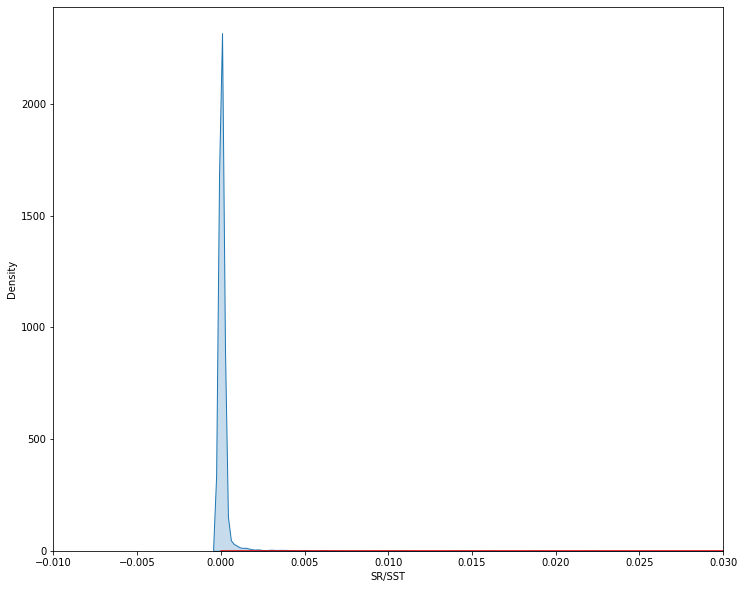

In [ ]:
#r2 SR/SST값 시각화
plt.figure(figsize=(12, 10))
sns.kdeplot(train_df['SR/SST'], shade=True)
plt.plot([m,m][0:9],color = 'red',label = 'r2')
plt.xlim(-0.01,0.03)
plt.show()

In [ ]:
train_df['SR/SST'].max()
np.round(train_df['SR/SST'].min(),9)

0.03412135082973717

### R2 다시 시각화(SR/ST)

SSR/SST에서 SSR,SST 둘다 시그마 뗌 ==> SR/ST

In [ ]:
#ST  = SE + SR
# SE 
SE = np.round(np.power((y_train - train_pred),2),2)
y_mean = sum(y_train)/len(y_train) #average로 하기
SR = np.round(np.power((y_train - y_mean ),2),2)
ST = SE + SR
ST
# #SR
# SR = np.round(np.power(y - y_mean,2),2)

y_mean = sum(y_train)/len(y_train) # train set에서 - Gross_USA의 평균값.
def r2_indv(y,y_pred):
  
  SR = np.round(np.power(y - y_mean,2),2)
  SE = np.round(np.power((y - y_pred),2),2)
  
  
  ST = SE + SR
  indv_r2 = SR/ST
  return indv_r2
train_df['SR/ST'] = train_df.apply(lambda x: r2_indv(x['Gross_USA'], x['pred']), axis=1)
#apply 문법 df.apply(func, axis=0, args=(),)
#train_df['SR/ST'] = df.apply(lambda x: r2_indv(x['Gross_USA'], x['pred']), axis=1)
train_df

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,APE,indv_r2,new_r2,SR/ST
0,611644,1561619.0,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,251842,0,0,0,0,0,0,155.315020,2.376688e-05,0.921837,0.998442
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,147004.769604,2.323360e-05,0.856689,0.994591
2,131772187,128056059.0,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,40325019,0,1,0,0,0,1,2.820116,4.877891e-04,0.931957,0.998798
3,22370452,25216492.0,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8225384,1,1,0,0,0,0,12.722318,2.778243e-08,0.143553,0.392585
4,9104,0.0,95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2075,0,0,0,0,0,0,100.000000,2.712298e-05,1.000746,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,70088,0.0,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6412,0,0,0,0,0,0,100.000000,2.712298e-05,1.005762,0.999992
6373,5971336,14817002.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3201420,1,1,0,0,0,0,148.135459,4.201971e-06,0.271338,0.816950
6374,11528613,12028037.0,114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3676235,0,0,0,0,0,0,4.332039,6.992386e-06,0.924103,0.998555
6375,677914,0.0,79,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,51493,0,0,0,0,0,0,100.000000,2.712298e-05,1.057886,0.999201


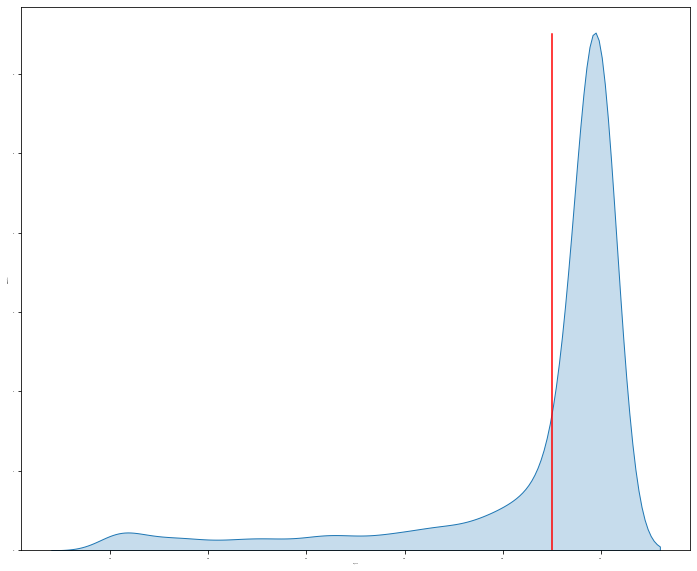

In [ ]:
m = 0.9
#r2 SR/SST값 시각화
plt.figure(figsize=(12, 10))
sns.kdeplot(train_df['SR/ST'], shade=True)
plt.plot([m,m],[0,6.5],color = 'red',label = 'r2')
plt.show()

Text(0, 0.5, 'number of movies')

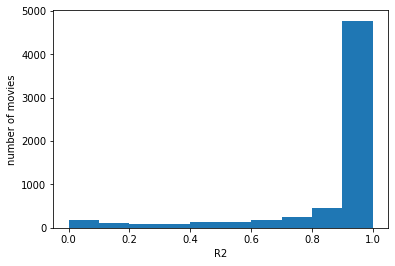

In [ ]:
train_df['SR/ST'].hist(bins=10, grid=False)
plt.xlabel('R2')
plt.ylabel('number of movies')

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,SR/ST


<function matplotlib.pyplot.show>

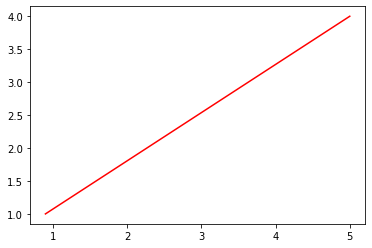

In [ ]:
plt.plot([0.9,5],[1,4],color = 'red',label = 'r2')
plt.show

### MAE--> AE

In [ ]:
# 각 영화별로 AE구해보기
train_df['AE'] = np.abs(train_df['Gross_USA'] - train_df['pred'])
np.sum(train_df['AE']/len(train_df['AE'])) #MAE for training set

7643931.076681825

In [ ]:
train_df[train_df['AE'] == train_df['AE'].max()]

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,AE
1819,760507625,261668350.0,162,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,77025481,1,1,1,0,0,1,498839275.0


In [ ]:
#AE 큰거 나열
train_df['AE'].nlargest(6)

1819    498839275.0
2597    368326442.0
6193    320228584.0
5497    291772773.0
1065    233069619.0
3176    196269011.0
Name: AE, dtype: float64

In [ ]:
#AE 큰거의 gross_USA값 구하기
large_ae = 368326442
gr_usa = int(train_df[train_df['AE'] == large_ae]['Gross_USA'])

In [ ]:
df = pd.read_csv("/gdrive/MyDrive/movie_predict/preprocessed_df/preprocessed_df_with_moviecode.csv")


df[df['Gross_USA'] == gr_usa]

,Unnamed: 0,Movie_title,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Movie_code,imdb_url,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,year
6911,6911,Gyeowool Wangguk (2013),7.4,566163,102,400738009,1.280803e+09,27 November 2013,tt2294629,https://www.imdb.com/title/tt2294629/?ref_=fn_...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,243390,24 November 2013,0,0,0,0,0,0,2013


In [ ]:
train_df['AE'].max()/np.sum(train_df['AE']) #AE에서 차지하는 비중.

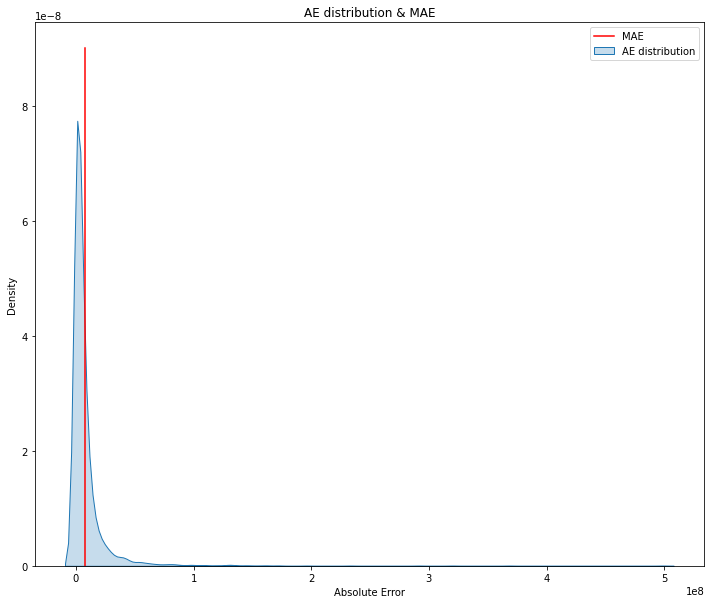

In [ ]:
#AE
AE = np.abs((train_pred - y_train))
#AE 분포 시각화
plt.figure(figsize=(12, 10))
sns.kdeplot(AE,shade=True,label = 'AE distribution')
plt.title('AE distribution & MAE')
# MAE, AE비교 시각화 
MAE = np.round(np.sum(AE)/len(AE),2)
plt.plot([MAE,MAE],[0,0.00000009],color = 'red',label = 'MAE')
plt.legend()
plt.xlabel('Absolute Error')
plt.show()
#이게 무슨 의미..

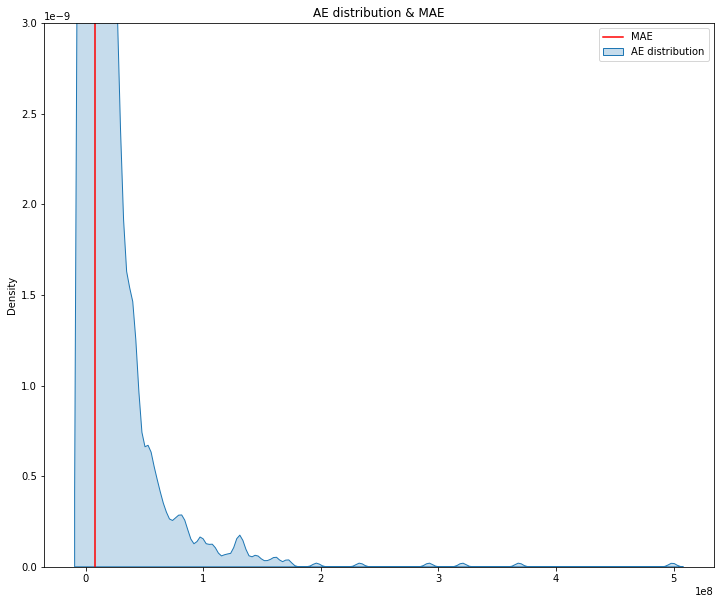

In [ ]:
#AE 확대
AE = np.abs((train_pred - y_train))
#AE 분포 시각화
plt.figure(figsize=(12, 10))
sns.kdeplot(AE, shade=True, label = 'AE distribution')
plt.title('AE distribution & MAE')
# MAE, AE비교 시각화 
MAE = np.round(np.sum(AE)/len(AE),2)
plt.plot([MAE,MAE],[0,1],color = 'red',label = 'MAE')
plt.legend()
plt.ylim(0,0.000000003)

plt.show()


In [ ]:
AE.mean() # 실제 MAE와 비슷.

7699731.743778585

### MSE --> SE

In [ ]:
#SE
train_df['SE'] = np.power(train_df['Gross_USA'] - train_df['pred'],2)
#SE = np.power((train_pred - y_train),2) #이런 방식도 있음
train_df['SE']

0       9.024525e+11
1       3.306757e+12
2       1.380961e+13
3       8.099944e+12
4       8.288282e+07
            ...     
6372    4.912328e+09
6373    7.824581e+13
6374    2.494243e+11
6375    4.595674e+11
6376    5.496925e+14
Name: SE, Length: 6377, dtype: float64

In [ ]:
MSE

375446947347385.2

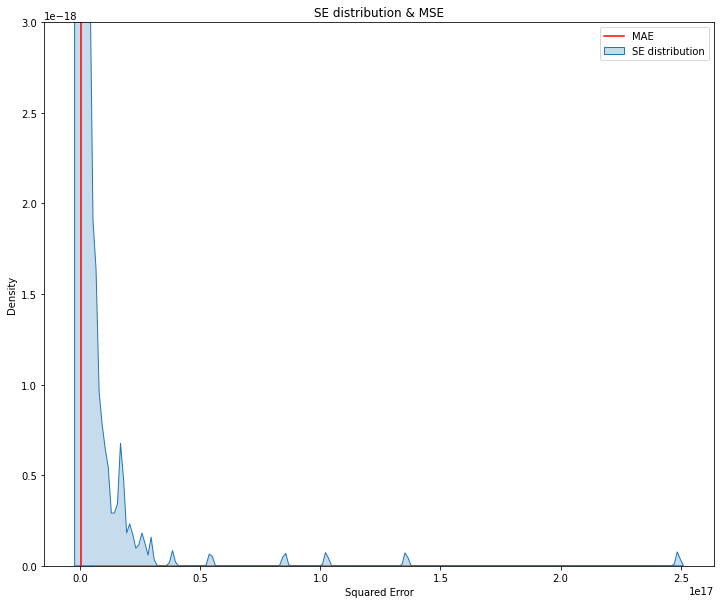

In [ ]:
#시각화

plt.figure(figsize=(12, 10))
sns.kdeplot(train_df['SE'],shade=True,label = 'SE distribution')
plt.title('SE distribution & MSE')
# MAE, AE비교 시각화 
MSE = np.round(np.sum(train_df['SE'])/len(train_df['SE']),2)
plt.plot([MSE,MSE],[0,0.00000009],color = 'red',label = 'MAE')
plt.ylim(0,0.000000000000000003)
plt.legend()
plt.xlabel('Squared Error')
plt.show()


### #RMSE-->RSE

In [ ]:
#RMSE-->RSE
#RSE = np.sqrt(np.power((train_pred - y_train),2))
train_df['RSE'] = np.sqrt(train_df['SE'])
train_df

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,AE,SE,RSE
0,611644,1561619.0,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,251842,0,0,0,0,0,0,949975.0,9.024525e+11,949975.0
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,1818449.0,3.306757e+12,1818449.0
2,131772187,128056059.0,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,40325019,0,1,0,0,0,1,3716128.0,1.380961e+13,3716128.0
3,22370452,25216492.0,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8225384,1,1,0,0,0,0,2846040.0,8.099944e+12,2846040.0
4,9104,0.0,95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2075,0,0,0,0,0,0,9104.0,8.288282e+07,9104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,70088,0.0,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6412,0,0,0,0,0,0,70088.0,4.912328e+09,70088.0
6373,5971336,14817002.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3201420,1,1,0,0,0,0,8845666.0,7.824581e+13,8845666.0
6374,11528613,12028037.0,114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3676235,0,0,0,0,0,0,499424.0,2.494243e+11,499424.0
6375,677914,0.0,79,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,51493,0,0,0,0,0,0,677914.0,4.595674e+11,677914.0


In [ ]:
#시각화

plt.figure(figsize=(12, 10))
sns.kdeplot(train_df['SE'],shade=True,label = 'SE distribution')
plt.title('SE distribution & MSE')
# MAE, AE비교 시각화 
MSE = np.round(np.sum(train_df['SE'])/len(train_df['SE']),2)
plt.plot([MSE,MSE],[0,0.00000009],color = 'red',label = 'MAE')
plt.legend()
plt.xlabel('Squared Error')
plt.show()
#이게 무슨 의미..

### MAPE 분석

In [ ]:
train_df

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
0,611644,1561619.0,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,251842,0,0,0,0,0,0
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0
2,131772187,128056059.0,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,40325019,0,1,0,0,0,1
3,22370452,25216492.0,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8225384,1,1,0,0,0,0
4,9104,0.0,95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2075,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,70088,0.0,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6412,0,0,0,0,0,0
6373,5971336,14817002.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3201420,1,1,0,0,0,0
6374,11528613,12028037.0,114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3676235,0,0,0,0,0,0
6375,677914,0.0,79,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,51493,0,0,0,0,0,0


In [ ]:
#MAPE --> APE
train_df['APE'] = np.abs((train_df['Gross_USA']-train_df['pred'])/train_df['Gross_USA']) * 100
train_df['APE'].sort_values()

1982    0.000000e+00
1543    3.185163e-03
3823    6.645242e-03
5569    2.755672e-02
313     3.063807e-02
            ...     
4002    5.673457e+05
3177    8.998230e+05
2516    9.181176e+05
390     9.896653e+05
3638    1.945387e+06
Name: APE, Length: 6377, dtype: float64

### APE 는 왜캐 높아지는가. -->pred 가 높.

In [ ]:
bigger_pred = train_df[train_df['Gross_USA'] < train_df['pred']] #pred가 더 높은 경우 3738
bigger_pred_ape_sum = bigger_pred['APE'].sum()
bigger_pred_ape_sum/train_df['APE'].sum()

NameError: ignored

In [ ]:
bigger_gross = train_df[train_df['Gross_USA'] > train_df['pred']] #pred가 더 높은 경우 3738
bigger_gross_ape_sum = bigger_gross['APE'].sum()
bigger_gross_ape_sum/train_df['APE'].sum()

0.007051252235997112

#### APE 높은 값 분석

In [ ]:
ape_large_df

,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
0,124,5151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2542,0,1,0,0,0,0
1,101,2418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1649,0,1,0,0,0,0
2,110,8106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2209,1,1,0,0,0,0
3,90,2598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2598,1,1,0,0,0,0
4,117,4296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2607,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,105,3262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,625,1,1,0,0,0,0
94,95,4550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2693,0,0,0,0,0,0
95,92,3259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2154,0,1,0,0,0,0
96,94,8362,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8362,1,1,0,0,0,0


In [ ]:
ape_large_5 = ape_large_5[['APE','Opening Weekend sales']].sort_values(by = 'APE')

NameError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

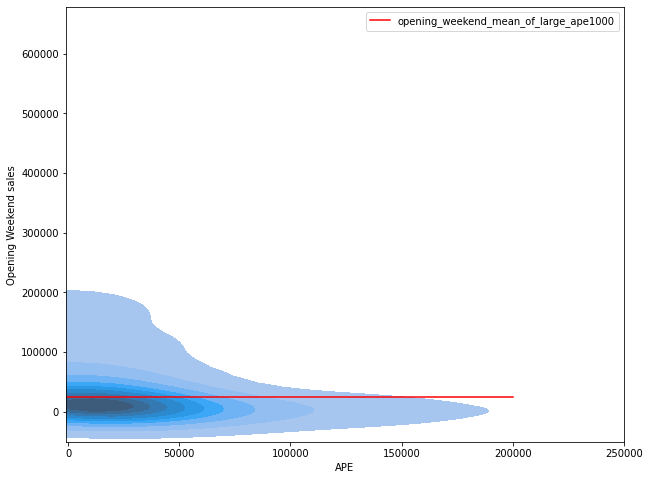

In [ ]:
#ape 높은 영화 n개 의 opening weeked usa 추려보기
n = 1000
ape_large_5 = train_df[train_df['APE'].isin(train_df['APE'].nlargest(n))] #여러개 bool, 색인 쓰고싶으면 df.isin활용!
ape_large_5 = ape_large_5.sort_values(by = 'APE') #오ㅓ름차순 APE 정렬
#ape_large_df = df[df['Gross_USA'].isin(ape_large_5['Gross_USA'])].reset_index(drop = True)
ape_large_5 = ape_large_5[['APE','Opening Weekend sales']].sort_values(by = 'APE')
ape_large_5['Opening Weekend sales'] 

large_mean_opweek = ape_large_5['Opening Weekend sales'].mean()

#ape 높은 영화들의 opening weeked usa 시각화
sns.kdeplot(ape_large_5['APE'],ape_large_5['Opening Weekend sales'],shade = True) #op weekend분포
plt.plot([-100000,200000],[large_mean_opweek,large_mean_opweek],c = 'r',label = 'opening_weekend_mean_of_large_ape'+str(n))
plt.legend()
plt.xlim(-1000,250000)
#plt.ylim(0,25000000)
plt.show



In [ ]:
#위 n개의 gross_USA 분포와 그 분포 대에 있는 레코드들의 opweekend usa값
ape_large_5 = train_df[train_df['APE'].isin(train_df['APE'].nlargest(1000))] #여러개 bool, 색인 쓰고싶으면 df.isin활용!
ape_large_5 = ape_large_5.sort_values(by = 'APE') #오ㅓ름차순 APE 정렬
ape_large_5['Gross_USA'].mean()


83323.581

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


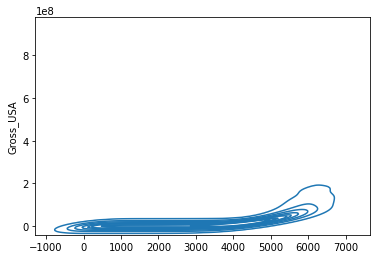

In [ ]:
# gross_USA 분포..
gr_usa = train_df['Gross_USA'].sort_values().reset_index()
sns.kdeplot(gr_usa.index,gr_usa['Gross_USA'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  **contour_kws,


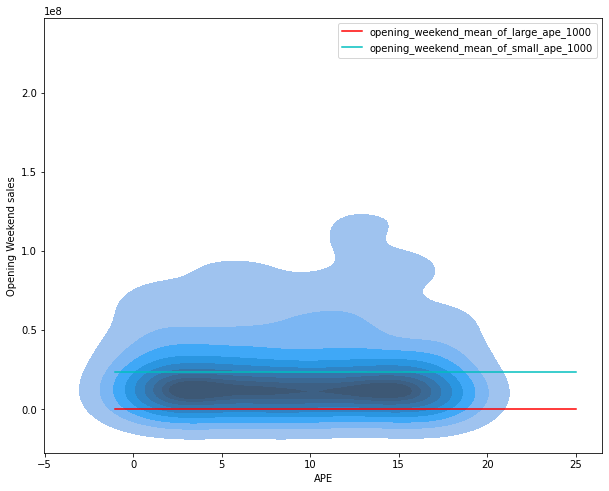

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


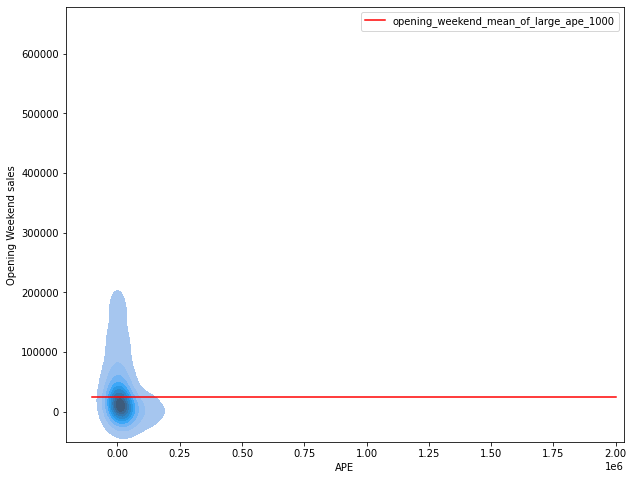

In [ ]:
#ape 낮은 영화 n개 의 opening weeked usa 추려보기
n = 1000
ape_small_5 = train_df[train_df['APE'].isin(train_df['APE'].nsmallest(n))] #여러개 bool, 색인 쓰고싶으면 df.isin활용!
ape_small_5 = ape_small_5.sort_values(by = 'APE') #오름차순 APE 정렬
#ape_small_df = df[df['Gross_USA'].isin(ape_small_5['Gross_USA'])].reset_index(drop = True)


small_mean_opweek = ape_small_5['Opening Weekend sales'].mean()

#ape 높은 영화들의 opening weeked usa 시각화- opening weekend usa 비교.
sns.kdeplot(ape_small_5['APE'],ape_small_5['Opening Weekend sales'],shade = True,c = 'C') #op weekend분포
plt.plot([-1,25],[large_mean_opweek,large_mean_opweek],c = 'r',label = 'opening_weekend_mean_of_large_ape_'+str(n))
plt.plot([-1,25],[small_mean_opweek,small_mean_opweek],c = 'C',label =  'opening_weekend_mean_of_small_ape_'+str(n))
plt.legend()
plt.show()

sns.kdeplot(ape_large_5['APE'],ape_large_5['Opening Weekend sales'],shade = True) #op weekend분포
plt.plot([-100000,2000000],[large_mean_opweek,large_mean_opweek],c = 'r',label = 'opening_weekend_mean_of_large_ape_'+str(n))
plt.legend()

In [ ]:
# ape 높은 값들은 몇 %를 차지하나 APE 상위 1000개가 APE값의 97% 차지. 
ape_large_5 
ape_small_5
ape_large_5 ['APE'].sum()/train_df['APE'].sum() #

0.9668170273687859

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


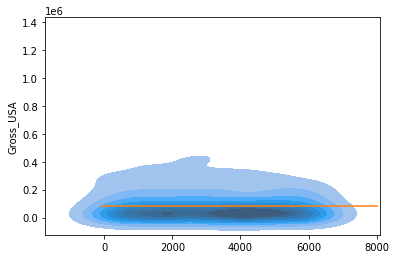

In [ ]:
#

ape_large_5 = train_df[train_df['APE'].isin(train_df['APE'].nlargest(1000))] #여러개 bool, 색인 쓰고싶으면 df.isin활용!
ape_large_5 = ape_large_5.sort_values(by = 'APE') #오름차순 APE 정렬
large_ape = ape_large_5['Gross_USA']
sns.kdeplot(large_ape.index, large_ape,shade = True)
plt.plot([-100,8000],[large_ape.mean(),large_ape.mean()])
plt.show()

In [ ]:
gr_usa = train_df['Gross_USA'].sort_values().reset_index(drop = True)
gr_usa

0              72
1              80
2             147
3             264
4             287
          ...    
6372    620181382
6373    652270625
6374    700426566
6375    760507625
6376    936662225
Name: Gross_USA, Length: 6377, dtype: int64

In [ ]:
mean_opweek = ape_small_df['Opening Weekend sales'].mean()
mean_opweek

22356449.53

In [ ]:
# 가설. MAPE높은 값들은 현재 pred값이 실제 gross_USA보다 많이 높음. 이렇게 잡힌 이유는 opening weekend가 높게 나왔기때문일 것이다.. ==>막상 ape낮은 값의 

######!!!!!
# APE 높은 값 100개, 낮은값 100개의 Opening_weekend USA 비교,평균이던 시각화던.. , 

ape_large_5 = train_df[train_df['APE'].isin(train_df['APE'].nlargest(100))] #여러개 bool, 색인 쓰고싶으면 df.isin활용!
ape_large_df = df[df['Gross_USA'].isin(ape_large_5['Gross_USA'])]
ape_large_df['Opening Weekend sales']

,Movie_title,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
282,Pandaemonium (2000),124,5151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2542,0,1,0,0,0,0
531,Zig Zag (2002),101,2418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1649,0,1,0,0,0,0
844,The Intended (2002),110,8106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2209,1,1,0,0,0,0
999,Conspiracy of Silence (2003),90,2598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2598,1,1,0,0,0,0
1031,My Kingdom (2001),117,4296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2607,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,Planetarium (2016),105,3262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,625,1,1,0,0,0,0
7731,A Boy Called Po (2016),95,4550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2693,0,0,0,0,0,0
7752,Justice (2017),92,3259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2154,0,1,0,0,0,0
7848,Gilbert (2017),94,8362,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8362,1,1,0,0,0,0


In [ ]:
print('opweekend max for large ape',ape_large_df['Opening Weekend sales'].min())
print('opweekend min for large ape',ape_large_df['Opening Weekend sales'].max())
ape_large_df['Opening Weekend sales'].mean() #APE 값 큰거 100개 중 opening weekend USA. 

opweekend max for large ape 245
opweekend min for large ape 14642


3225.795918367347

#### ape가 높은 애들은 opening weekend가 높아서 그렇게 pred 값이 높은거 아닐까? gross_USA가 비슷한데 

In [ ]:
ape_large_df['']

In [ ]:
max_APE_record = train_df[train_df['APE'] == train_df['APE'].max(5)]
df[df['Gross_USA'] == max_APE_record['Gross_USA'].values[0]]

ValueError: ignored

In [ ]:
weekend_2000_2500 = df[(df['Opening Weekend sales'] > 2000) &(df['Opening Weekend sales'] <= 2500)].sort_values(by = 'Opening Weekend sales')
weekend_2000_2500 = weekend_2000_2500[['Gross_USA','Opening Weekend sales']].reset_index(drop= True)
weekend_2000_2500

,Gross_USA,Opening Weekend sales
0,58755,2009
1,13957,2011
2,4070,2012
3,23192,2028
4,10035,2030
...,...,...
101,3496,2468
102,426855,2475
103,31177,2476
104,5074,2477


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


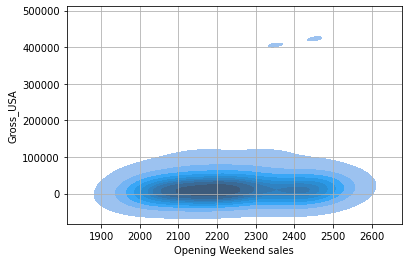

In [ ]:
sns.kdeplot(weekend_2000_2500['Opening Weekend sales'],weekend_2000_2500['Gross_USA'],shade = True)
plt.grid()
plt.show()

In [ ]:
gross2000_2500 = gross2000_2500.reset_index(drop = True)
gross2000_2500.index

0              72
1              80
2             147
3             252
4             264
          ...    
7894    678815482
7895    700426566
7896    760507625
7897    858373000
7898    936662225
Name: Gross_USA, Length: 7899, dtype: int64

In [ ]:
#
df[df['Gross_USA'] == 4032]

,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
5017,808,4032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2308,0,0,0,0,0,0


 ...]

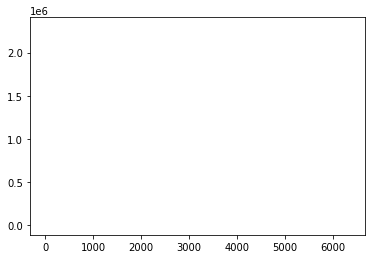

In [ ]:
over1000_APE = train_df[train_df['APE']> 1000]
plt.plot([over1000_APE.index],[over1000_APE['Gross_USA']])
# plt.show()

In [ ]:
# 1000개랑 전체 mape비교
over2000_APE = train_df[train_df['APE'] > 125000]
over2000_APE = over2000_APE.sort_values(by = 'APE')
sum_2000 = over2000_APE['APE'].sum()
sum_2000/train_df['APE'].sum()

0.4094433284316523

In [ ]:
over2000_APE['APE'].mean()

2783.1844035634176

In [ ]:
over2000_APE

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,APE
6205,4556,6011996.0,107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,4556,1,1,0,0,0,0,1.318578e+05
808,5151,7359078.0,124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2542,0,1,0,0,0,0,1.427670e+05
810,5151,7359078.0,88,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3271,0,0,0,0,0,0,1.427670e+05
1127,4130,5948152.0,103,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,636,1,1,0,0,0,0,1.439231e+05
914,5665,8188721.0,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3561,1,1,0,0,0,0,1.444494e+05
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,1.470048e+05
4287,6388,9714021.0,91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,3419,0,0,0,0,0,0,1.519667e+05
5868,6690,10726192.0,94,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,6690,0,0,0,0,0,0,1.602317e+05
6158,1563,2749313.0,137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1207,0,0,0,0,0,0,1.757997e+05
93,1463,3180661.0,98,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1061,1,1,0,0,0,0,2.173068e+05


In [ ]:
#6377개 중에 3738 개 영화가 pred값이 더 높음.
train_df[train_df['Gross_USA'] < train_df['pred']]

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,SR/ST,APE
0,611644,1561619.0,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,251842,0,0,0,0,0,0,0.998442,155.315020
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,0.994591,147004.769604
3,22370452,25216492.0,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8225384,1,1,0,0,0,0,0.392585,12.722318
5,25343,587081.0,102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,14878,0,0,0,0,0,0,0.999480,2216.541057
6,155271,1199832.0,104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,40763,0,0,0,0,0,0,0.998186,672.734123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,17303424,33462395.0,106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,7601379,1,1,0,0,0,0,0.171623,93.385974
6371,16649539,31572343.0,93,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,5944950,1,1,0,0,0,0,0.223626,89.628932
6373,5971336,14817002.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3201420,1,1,0,0,0,0,0.816950,148.135459
6374,11528613,12028037.0,114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3676235,0,0,0,0,0,0,0.998555,4.332039


In [ ]:
#APE가 높은 값들만 추려서 그 중 pred값이 더 높은거 고르기
ape_df = train_df[train_df['APE'] > 4000]
ape_df[ape_df['Gross_USA'] < ape_df['pred']]


,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Min_Max_Opening Weekend sales,APE
1371,49666.0,5602229.0,89.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,11179.807112
1402,75228.0,17418948.0,102.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,23054.873186
1425,49136.0,11975262.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000521,24271.666395
1445,146193.0,13722512.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,9286.572545
1470,102202.0,14132769.0,93.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057575,13728.270484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483,113435.0,4854956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4179.945343
7544,6542.0,3706275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56553.546316
7557,73236.0,3862406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5173.917199
7571,47627.0,8749757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18271.421673


In [ ]:
#시각화. MAPE scatter plot. APE가 높은 값 
plt.scatter() 

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,SR/ST,APE
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,0.994591,147004.769604
12,6290,1792128.0,94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1378,0,0,0,0,0,0,0.994780,28391.701113
22,29058,3745271.0,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,10000,1,1,0,0,0,0,0.977740,12788.949687
35,36128,1993451.0,88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3447,0,1,0,0,0,0,0.993720,5417.745239
42,22936,3244647.0,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,11180,1,1,0,0,0,0,0.983186,14046.525113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,12781,3165497.0,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,8375,0,0,0,0,0,0,0.983900,24667.209139
6331,107492,5134771.0,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,28091,1,1,0,0,0,0,0.959757,4676.886652
6338,7965,4631880.0,105,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5328,1,1,0,0,0,0,0.966010,58052.919021
6347,1029,5027994.0,85,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1029,0,1,0,0,0,0,0.960095,488529.154519


In [ ]:
APE_sorted = train_df.sort_values(by = 'APE')
APE_sorted = APE_sorted.reset_index(drop = True)
#Gross_USA > pred인 df값 
bigger_gross = APE_sorted[APE_sorted['Gross_USA'] > APE_sorted['pred']]
bigger_pred = APE_sorted[APE_sorted['Gross_USA'] < APE_sorted['pred']]

bigger_gross[['Gross_USA','pred','APE']]

,Gross_USA,pred,APE
3,37950822,37940364.0,0.027557
11,148213377,148002577.0,0.142227
12,18119640,18091789.0,0.153706
17,48006762,47905379.0,0.211185
20,100462298,100221455.0,0.239735
...,...,...,...
4245,44381,0.0,100.000000
4246,424760,0.0,100.000000
4247,17801,0.0,100.000000
4248,7763,0.0,100.000000


In [ ]:
bigger_pred[['Gross_USA','pred','APE']].sort_values(by = 'APE')

,Gross_USA,pred,APE
1,58709717,58711587.0,3.185163e-03
2,17501244,17502407.0,6.645242e-03
4,60020107,60038496.0,3.063807e-02
5,58856790,58886625.0,5.069084e-02
6,89760956,89843593.0,9.206341e-02
...,...,...,...
6372,663,3762165.0,5.673457e+05
6373,2491,22417082.0,8.998230e+05
6374,1181,10844150.0,9.181176e+05
6375,2150,21279955.0,9.896653e+05


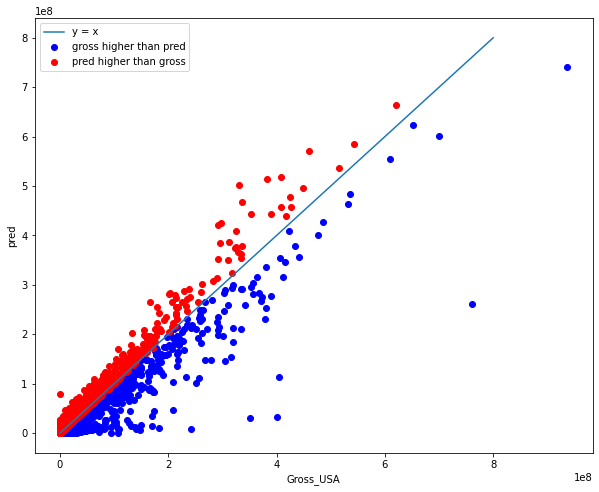

In [ ]:
plt.scatter(bigger_gross['Gross_USA'],bigger_gross['pred'],c = 'B',label = 'gross higher than pred')
plt.scatter(bigger_pred['Gross_USA'],bigger_pred['pred'],c = 'R',label = 'pred higher than gross')
plt.xlabel('Gross_USA')
plt.ylabel('pred')
plt.plot([0,800000000],[0,800000000],label = 'y = x')
plt.legend()
plt.show()

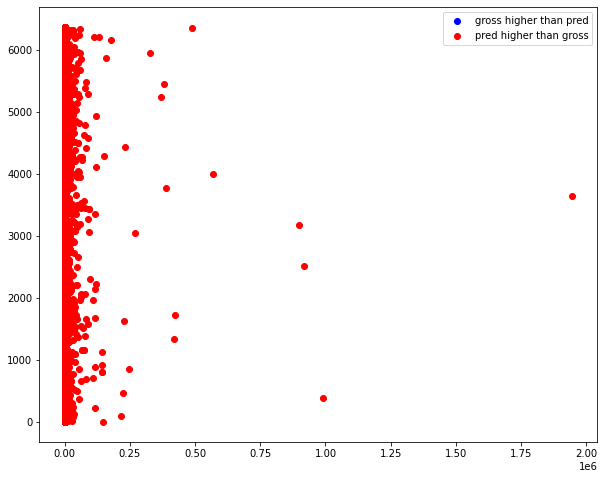

In [ ]:
# plt.scatter(bigger_gross['APE'],bigger_gross.index,c = 'B',label = 'gross higher than pred')
# plt.scatter(bigger_pred['APE'],bigger_pred.index,c = 'R',label = 'pred higher than gross')

# plt.legend()
# plt.show()

In [ ]:
#APE 중 pred값이 높아서(Gross_USA가 생각보다 낮아서) APE가 높게 나온 경우 



#APE가 높은데 R2값은 어떻게 나왔는지 5~6

#Bugdet을 추가해서 나온 결과? - 6:40-7:40


In [ ]:
 np.abs((760507625-261668350)/760507625) * 100 #avatar.. 1번째 영화같은 값 파악해보기

65.59293537655194

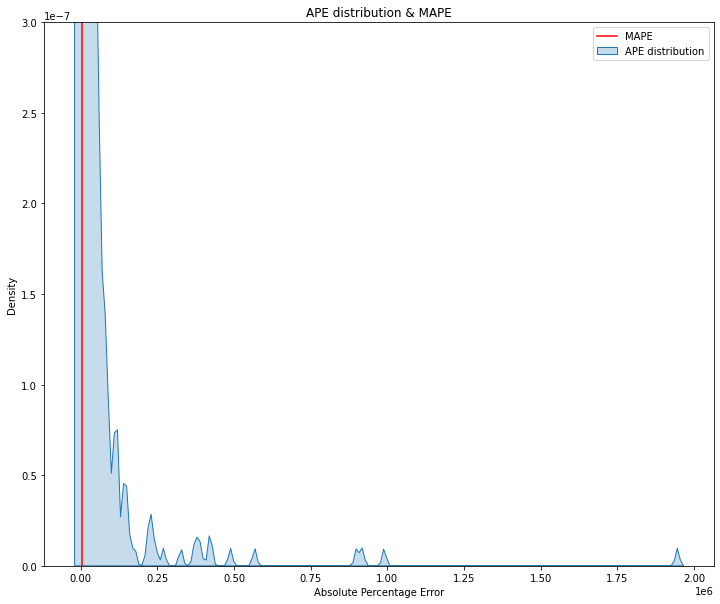

In [ ]:
#시각화
MAPE = np.mean(train_df['APE']) #정상. lr과 동일.
plt.figure(figsize=(12, 10))
sns.kdeplot(train_df['APE'],shade=True,label = 'APE distribution')
plt.title('APE distribution & MAPE')
# MAPE, APE비교 시각화 

plt.plot([MAPE,MAPE],[0,0.00009],color = 'red',label = 'MAPE')
plt.ylim(0,0.0000003)
plt.legend()
plt.xlabel('Absolute Percentage Error')
plt.show()


In [ ]:
APEover4000

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,APE,SR/ST
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,147004.769604,0.994591
12,6290,1792128.0,94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1378,0,0,0,0,0,0,28391.701113,0.994780
22,29058,3745271.0,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,10000,1,1,0,0,0,0,12788.949687,0.977740
35,36128,1993451.0,88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3447,0,1,0,0,0,0,5417.745239,0.993720
42,22936,3244647.0,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,11180,1,1,0,0,0,0,14046.525113,0.983186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,12781,3165497.0,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,8375,0,0,0,0,0,0,24667.209139,0.983900
6331,107492,5134771.0,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,28091,1,1,0,0,0,0,4676.886652,0.959757
6338,7965,4631880.0,105,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5328,1,1,0,0,0,0,58052.919021,0.966010
6347,1029,5027994.0,85,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1029,0,1,0,0,0,0,488529.154519,0.960095


In [ ]:
APEover4000

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,APE,SR/ST
1,1237,1819686.0,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,245,0,0,0,0,0,0,147004.769604,0.994591
12,6290,1792128.0,94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1378,0,0,0,0,0,0,28391.701113,0.994780
22,29058,3745271.0,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,10000,1,1,0,0,0,0,12788.949687,0.977740
35,36128,1993451.0,88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3447,0,1,0,0,0,0,5417.745239,0.993720
42,22936,3244647.0,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,11180,1,1,0,0,0,0,14046.525113,0.983186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,12781,3165497.0,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,8375,0,0,0,0,0,0,24667.209139,0.983900
6331,107492,5134771.0,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,28091,1,1,0,0,0,0,4676.886652,0.959757
6338,7965,4631880.0,105,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5328,1,1,0,0,0,0,58052.919021,0.966010
6347,1029,5027994.0,85,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1029,0,1,0,0,0,0,488529.154519,0.960095


In [ ]:
#SR/ST값이 높게나옴. APE값이 상당히 높은데.

#### 높은 APE가진 record들의 R2값?

In [ ]:
#APE 4000넘는놈들은 R2 값이 -16594%
APEover4000 = train_df[train_df['APE'] > 4000]

r2_APEover4000 = np.round(r2_score(APEover4000['Gross_USA'], APEover4000['pred']),2)
r2_APEover4000

-16594.54

In [ ]:
r2_score(train_df['Gross_USA'],train_df['pred'])

0.8912331492600625

In [ ]:
r2_score(train_df.loc[train_df['APE'] > 4000,'Gross_USA'],train_df.loc[train_df['APE'] > 4000,'pred'])

-16594.54062695676

In [ ]:
#APE 4000안넘는놈들은 R2 값이 89%
APEless4000 = train_df[train_df['APE'] < 4000]

r2_APEless4000 = np.round(r2_score(APEless4000['Gross_USA'], APEless4000['pred']),2)
r2_APEless4000

0.89

### 높은 APE 각 레코드 개별 R2값 - 분모분자 변경 인데 시그마 잘못 씌움

In [ ]:
gr_mean = train_df['Gross_USA'].mean()
train_df['new_r2'] = np.power((train_df['pred'] - gr_mean),2) / np.power(( train_df['Gross_USA'] - gr_mean),2)
train_df

#진짜 r2값.--> sklearn과 동일. -->진짜? 다름.  0.89나옴 sklearn에서는. 차이?
nrw_r2 = (np.power((train_df['pred'] - gr_mean),2)).sum() / (np.power(( train_df['Gross_USA'] - gr_mean),2)).sum()
nrw_r2

0.8825277484360599

In [ ]:
#설명력이 너무 높게 나온 레코드
high_r2 = train_df[train_df['new_r2'] == train_df['new_r2'].max()]
#R2 이상하리만큼 크게 나온 영화
df[high_r2['Gross_USA'].values[0] == df['Gross_USA']]


,Run_time,Gross_USA,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
2825,97,24409722,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,12804793,1,1,0,0,0,0


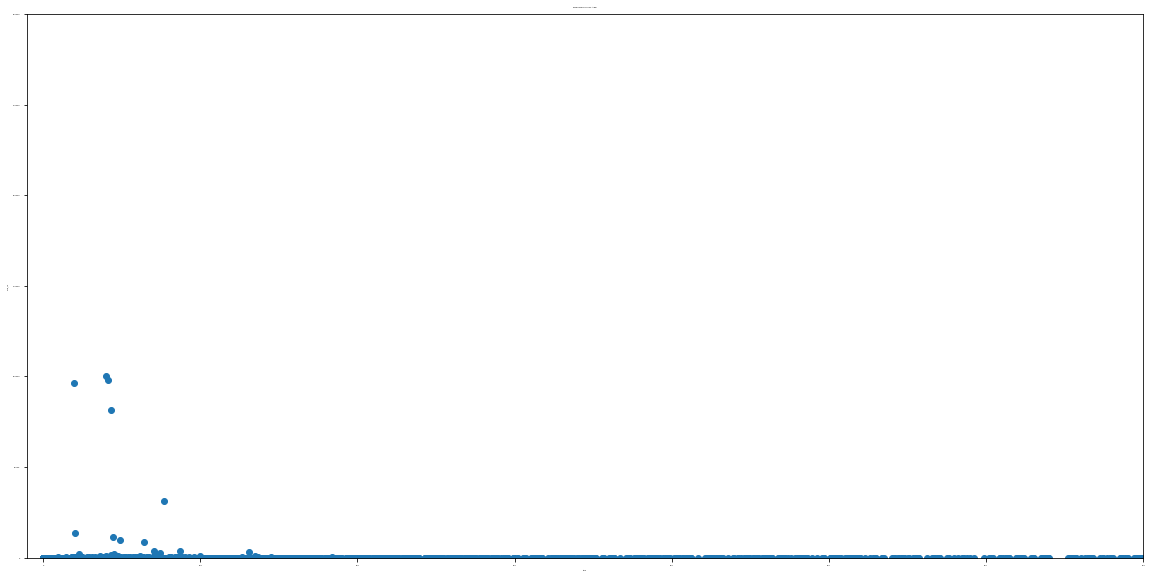

In [ ]:
#시각화 ==> 높은 APE값 가진 레코드는  R2 또한 낮게 나타남.
plt.figure(figsize=(20,10))
plt.scatter(train_df['APE'],train_df['new_r2'])
plt.title('individual r2 by APE')
plt.xlabel('APE')
plt.ylabel('new_r2')
plt.rc('font', size=2)

plt.xlim(-10,700)
plt.ylim(-10,300000)
plt.show()

#### 1) APE가 낮은데 r2가 지나치게 높은 부분 분석

In [ ]:
largen_idx = train_df['new_r2'].nlargest(5).index
largen_df = train_df.loc[largen_idx]
largen_df[['Gross_USA','pred','Opening Weekend sales','APE','new_r2','SR/ST']]

KeyError: ignored

In [ ]:
train_df['new_r2']

0       0.921837
1       0.856689
2       0.931957
3       0.143553
4       1.000746
          ...   
6372    1.005762
6373    0.271338
6374    0.924103
6375    1.057886
6376    2.207732
Name: new_r2, Length: 6377, dtype: float64

## [Halt]APE값, 개별 R2값 관계 --> 시그마 분모만

In [ ]:
# 분자에만 시그마 제거
gr_mean = train_df['Gross_USA'].mean()
r2_denominator_material = np.power((train_df['Gross_USA'] - gr_mean),2)
r2_denominator = r2_denominator_material.sum()
r2_denominator

2.201245293898312e+19

In [ ]:
#r2에 교수님 식 적용
train_df['indv_r2'] = np.power((train_df['pred'] - gr_mean),2) / r2_denominator
#indv_r2.sum() # sklearn이랑 또 다르네... 0.01이긴 하지만.

# scatter_plot
plt.figure(figsize=(20,10))
plt.scatter(train_df['APE'],train_df['indv_r2'])
plt.title('individual r2 by APE')
plt.xlabel('APE')
plt.ylabel('new_r2')
#plt.rc('font', size=2)
#plt.legend()
# 여기부터 분석다시

NameError: ignored

In [ ]:
# 확대해보며 분석
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(train_df['APE'],train_df['indv_r2'])
plt.title('individual r2 by APE')
plt.xlabel('APE')
plt.ylabel('new_r2')
plt.rc('font', size=2)
plt.xlim(-10,100)
#plt.ylim()
plt.show()

KeyError: ignored

<Figure size 1440x720 with 0 Axes>

In [ ]:
# APE 가 낮고 R2 값도 낮은 영화들은 왜..??

low_APE_low_r2 = train_df[(train_df['APE'] < 20) & (train_df['indv_r2'] < 0.005)]
low_APE_low_r2.sort_values(by = 'APE')

low_APE_low_r2['ae'] = low_APE_low_r2['Gross_USA']  - low_APE_low_r2['pred']
low_APE_low_r2

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,APE,indv_r2
1982,163214888,163214888.0,106,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,61235105,0,1,0,0,0,0,0.000000,0.000875
1543,58709717,58711587.0,122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,16842353,1,1,0,0,0,1,0.003185,0.000053
3823,17501244,17502407.0,113,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,3287451,1,1,0,0,0,0,0.006645,0.000002
5569,37950822,37940364.0,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,12229529,0,1,0,0,0,0,0.027557,0.000008
313,60020107,60038496.0,89,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,14331819,0,1,0,0,0,0,0.030638,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6328,7123919,5706606.0,93,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,686378,1,1,0,0,0,0,19.895131,0.000016
1372,579055,463585.0,139,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,338637,0,0,0,0,0,0,19.941111,0.000026
1025,14837422,11876420.0,86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,6401744,0,0,0,0,0,0,19.956310,0.000007
82,103144286,123742689.0,120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,41039944,1,1,0,0,0,0,19.970474,0.000448


In [ ]:
low_APE_low_r2

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,APE,indv_r2,ae
2,131772187,128056059.0,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,40325019,0,1,0,0,0,1,2.820116,4.877891e-04,3716128.0
3,22370452,25216492.0,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8225384,1,1,0,0,0,0,12.722318,2.778243e-08,-2846040.0
10,47642963,40654224.0,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,11809445,1,1,0,0,0,0,14.668985,1.195144e-05,6988739.0
17,67061228,65185262.0,110,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,20686423,1,1,0,0,0,0,2.797393,7.544035e-05,1875966.0
19,54607383,53814797.0,110,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16026496,0,1,0,0,0,0,1.451426,3.921433e-05,792586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,53262560,60761319.0,116,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,18048422,1,1,0,0,0,0,14.078856,5.994970e-05,-7498759.0
6362,25584504,29659040.0,88,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,8724795,1,1,0,0,0,0,15.925796,1.240032e-06,-4074536.0
6363,27288872,23332660.0,103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8111264,0,1,0,0,0,0,14.497529,5.514987e-08,3956212.0
6364,83028128,98705893.0,96,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,21312625,1,1,0,0,0,0,18.882474,2.505965e-04,-15677765.0


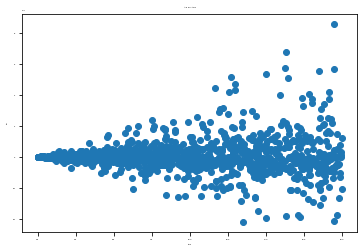

In [ ]:
# AE by APE
plt.scatter(low_APE_low_r2['APE'],low_APE_low_r2['ae'])
plt.title('AE by APE')
plt.xlabel('APE')
plt.ylabel('AE')
plt.show()

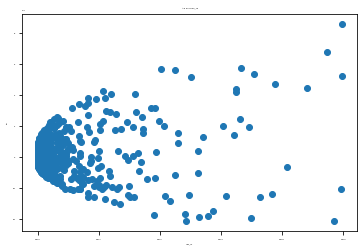

In [ ]:
# AE by r2
plt.scatter(low_APE_low_r2['indv_r2'],low_APE_low_r2['ae'])
plt.title('AE by indv_r2')
plt.xlabel('indv_r2')
plt.ylabel('AE')
plt.show()

In [ ]:
APE가 높으면 R2도 낮다.
R2가 높으면 APE도 낮다. 


# APE가 낮은데 R2는 낮은 경우 --> 이상. d아니 근데 그게 중요한게 아니고 mape가 높은게 문제 아닌가.




In [ ]:
# mape 값 뭐가 일케 큰 것이냐
n = 1000
largenbye = train_df[~train_df['APE'].isin(train_df['APE'].nlargest(n))]
largenbye['APE']


0       155.315020
2         2.820116
3        12.722318
4       100.000000
6       672.734123
           ...    
6372    100.000000
6373    148.135459
6374      4.332039
6375    100.000000
6376    156.273746
Name: APE, Length: 5377, dtype: float64

In [ ]:
# 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6367, 6368, 6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376],
           dtype='int64', length=6377)

## [Work In Progress] APE값, 개별 R2값 관계 --> 분자 분모 시그마 떼고. 교수님's 식

In [ ]:
# 분자,분모 시그마 제거
gr_mean = train_df['Gross_USA'].mean()
r2_denominator = np.power((train_df['Gross_USA'] - gr_mean),2)
r2_denominator

0       5.675270e+14
1       5.969828e+14
2       1.152139e+16
3       4.260168e+12
4       5.965985e+14
            ...     
6372    5.936231e+14
6373    3.408873e+14
6374    1.665611e+14
6375    5.643739e+14
6376    8.895537e+13
Name: Gross_USA, Length: 6377, dtype: float64

(0.0, 100000.0)

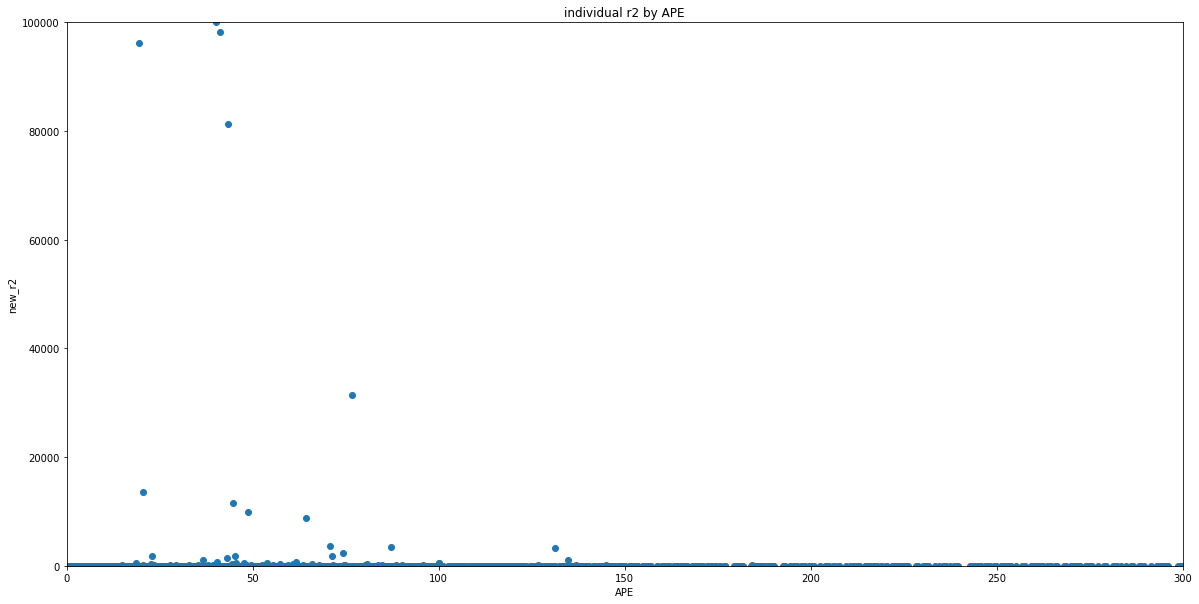

In [ ]:
#r2에 교수님 식 적용
train_df['indv_r2'] = np.power((train_df['pred'] - gr_mean),2) / r2_denominator
#indv_r2.sum() # sklearn이랑 또 다르네... 0.01이긴 하지만.

# scatter_plot
plt.figure(figsize=(20,10))
plt.scatter(train_df['APE'],train_df['indv_r2'])
plt.title('individual r2 by APE')
plt.xlabel('APE')
plt.ylabel('new_r2')
#plt.rc('font', size=2)
plt.xlim(0,300)
plt.ylim(0,100000)
#plt.legend()
# 

In [ ]:
# APE는 낮고 r2도 낮은 영화?
low_ape_low_r2 = train_df[(train_df['APE'] < 25) & (train_df['indv_r2'] < 2000)]
low_ape_low_r2

,Gross_USA,pred,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,Opening Weekend sales,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,APE,indv_r2
2,131772187,128056059.0,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,40325019,0,1,0,0,0,1,2.820116,0.931957
3,22370452,25216492.0,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8225384,1,1,0,0,0,0,12.722318,0.143553
10,47642963,40654224.0,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,11809445,1,1,0,0,0,0,14.668985,0.488421
17,67061228,65185262.0,110,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,20686423,1,1,0,0,0,0,2.797393,0.913919
19,54607383,53814797.0,110,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16026496,0,1,0,0,0,0,1.451426,0.948154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,53262560,60761319.0,116,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,18048422,1,1,0,0,0,0,14.078856,1.587902
6362,25584504,29659040.0,88,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,8724795,1,1,0,0,0,0,15.925796,20.638559
6363,27288872,23332660.0,103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8111264,0,1,0,0,0,0,14.497529,0.148999
6364,83028128,98705893.0,96,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,21312625,1,1,0,0,0,0,18.882474,1.606728


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


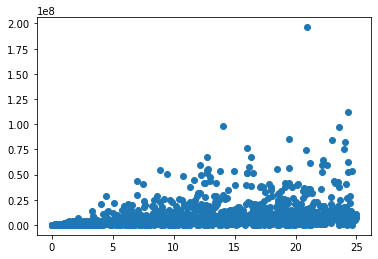

In [ ]:
low_ape_low_r2['ae'] = np.abs(low_ape_low_r2['Gross_USA']  - low_ape_low_r2['pred'])
plt.
plt.scatter(low_ape_low_r2['APE'],low_ape_low_r2['ae'])

Text(0.5, 1.0, 'Absolute Error by APE')

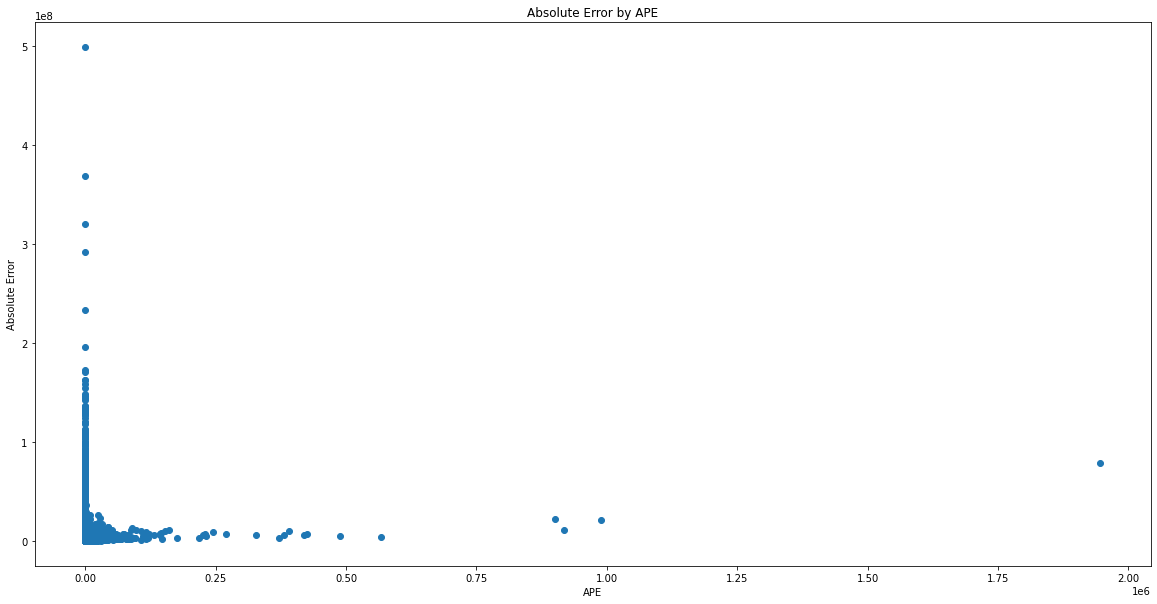

In [ ]:
#train_df ape, ae의 추이
train_df['ae'] = np.abs(train_df['Gross_USA'] - train_df['pred'])
train_df
plt.figure(figsize=(20,10)) #plt.figure(figsize = (가로,세로))
plt.scatter(train_df['APE'],train_df['ae']) #엥 뭔가 이상한데?
plt.xlabel('APE')
plt.ylabel('Absolute Error')
plt.title('Absolute Error by APE')
#plt.ylim(-10,20000000)

1. AE가 높은데 APE 낮은거 뭐임

In [ ]:
train_df[train_df['ae'] > 100000000][['Gross_USA','pred','APE','indv_r2','ae']].sort_values(by = 'ae')

,Gross_USA,pred,APE,indv_r2,ae
507,108638745,8617129.0,92.068089,0.035286,100021616.0
2440,370782930,267579248.0,27.833990,0.492837,103203682.0
5466,300531751,196838871.0,34.503136,0.389917,103692880.0
501,319246193,213106706.0,33.246908,0.409568,106139487.0
363,209255921,102815827.0,50.865989,0.179854,106440094.0
1063,107918810,0.0,100.000000,0.085663,107918810.0
4211,128078872,20025497.0,84.364715,0.001810,108053375.0
1129,409013994,518807017.0,26.843341,1.652481,109793023.0
1428,459005868,570723800.0,24.339108,1.580240,111717932.0
6201,390532085,277441070.0,28.958188,0.477606,113091015.0


2. 우측 4개 APE는 높 AE는 적은거 뭐?

In [ ]:
train_df[train_df['APE'].isin(train_df['APE'].nlargest(4))][['Gross_USA','pred','APE','indv_r2','ae']]

,Gross_USA,pred,APE,indv_r2,ae
390,2150,21279955.0,9.896653e+05,0.016670,21277805.0
2516,1181,10844150.0,9.181176e+05,0.309382,10842969.0
3177,2491,22417082.0,8.998230e+05,0.006818,22414591.0
3638,4032,78442043.0,1.945387e+06,4.887051,78438011.0


In [ ]:
train_df[]

In [ ]:
train_df['Gross_USA'].mean()

24434469.369139094

In [ ]:
train_df[train_df['ae'].isin(train_df['ae'].nlargest(4))][['Gross_USA','pred','APE','indv_r2','ae']]

,Gross_USA,pred,APE,indv_r2,ae
1819,760507625,261668350.0,65.592935,0.103875,498839275.0
2597,400738009,32411567.0,91.912031,0.000449,368326442.0
5497,404540171,112767398.0,72.124549,0.054005,291772773.0
6193,350126372,29897788.0,91.460858,0.000281,320228584.0


(0.0, 300.0)

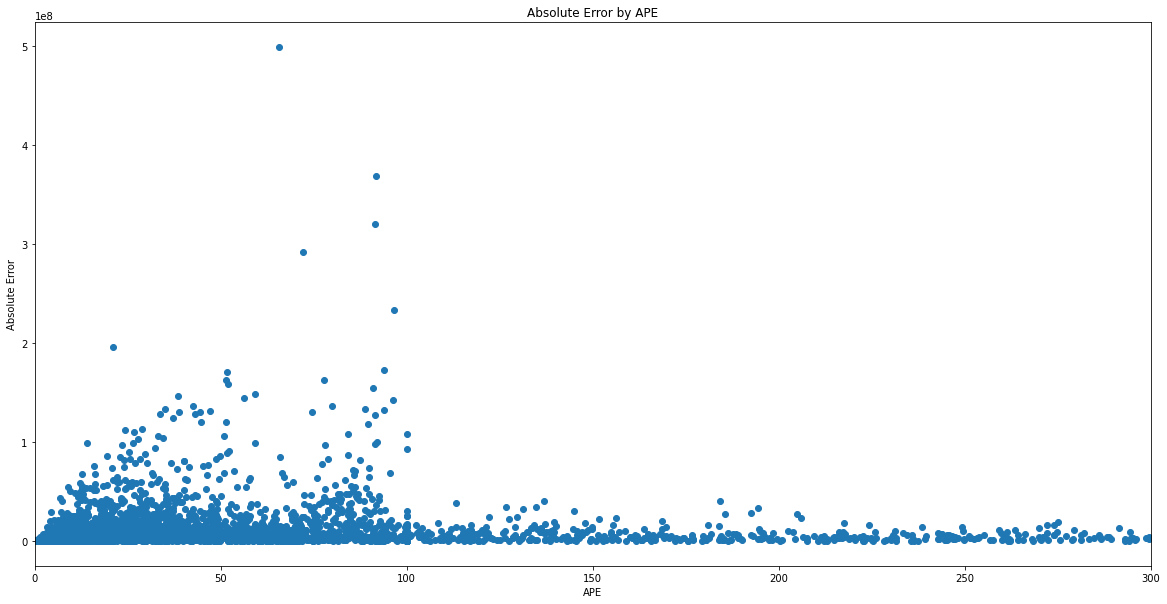

In [ ]:
#확대
#train_df ape, ae의 추이
train_df['ae'] = np.abs(train_df['Gross_USA'] - train_df['pred'])
train_df
plt.figure(figsize=(20,10)) #plt.figure(figsize = (가로,세로))
plt.scatter(train_df['APE'],train_df['ae']) #엥 뭔가 이상한데?

plt.xlabel('APE')
plt.ylabel('Absolute Error')
plt.title('Absolute Error by APE')

plt.xlim(0,300)


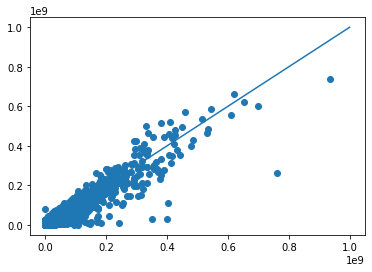

In [ ]:
plt.scatter(train_df['Gross_USA'],train_df['pred'])
plt.plot([0,1000000000],[0,1000000000])
plt.show()


In [ ]:
plt.plot(1)

# 만약 opening weekend USA가 없다면?

##1. 그냥 opening weekend USA가 없을 때

In [ ]:
#1. r
df = df.drop('Opening Weekend sales',axis =1)
#[Off] #1. Scaling 원본
# opening_weekend에 Min-Max없이,  log없이 그냥 쓰기


#Train, Test split
train_data = df.drop('Gross_USA',axis = 1)
target_data = df['Gross_USA']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 
x_train


,Run_time,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,Approved,12,NC-17,M,Unrated,G,TV-MA,TV-14,TV-Y7-FV,TV-G,PG,R,TV-Y,TV-PG,PG-13,TV-Y7,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,no of reviews,stars
5183,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
7081,136,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3733,103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0
4974,93,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0
7535,95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3264,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0
1653,114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0
2607,79,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0


##2. 그치만 Budget은 있을 때 

In [ ]:
# df > budget 테크트리 탄 상태. 1. 의 전처리까지하고 ㄱㄱ
df = df.drop('Opening Weekend sales',axis =1)

#[Off] #1. Scaling 원본
# opening_weekend에 Min-Max없이,  log없이 그냥 쓰기


#Train, Test split
train_data = df.drop('Gross_USA',axis = 1)
target_data = df['Gross_USA']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2,random_state = 0) 
x_train

,Run_time,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,English,TV-Y,M,TV-14,TV-PG,Unrated,TV-Y7-FV,PG-13,PG,TV-Y7,R,G,NC-17,TV-MA,TV-G,12,Approved,Big6_distributor,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee
2488,110,28000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0
3703,115,75000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0
3347,96,31000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
3487,99,10000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0
3957,91,8000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,87,20000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0
3264,113,12700000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0
1653,105,35000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1
2607,102,30000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0


In [ ]:
ev_df_material

{'ann_adjr2_test': nan,
 'ann_adjr2_train': nan,
 'ann_mae_test': nan,
 'ann_mae_train': nan,
 'ann_mape_test': nan,
 'ann_mape_train': nan,
 'ann_mse_test': nan,
 'ann_mse_train': nan,
 'ann_r2_test': nan,
 'ann_r2_train': nan,
 'ann_rmse_test': nan,
 'ann_rmse_train': nan,
 'cnn_adjr2_test': nan,
 'cnn_adjr2_train': nan,
 'cnn_mae_test': nan,
 'cnn_mae_train': nan,
 'cnn_mape_test': nan,
 'cnn_mape_train': nan,
 'cnn_mse_test': nan,
 'cnn_mse_train': nan,
 'cnn_r2_test': nan,
 'cnn_r2_train': nan,
 'cnn_rmse_test': nan,
 'cnn_rmse_train': nan,
 'lr_adjr2_test': 0.91,
 'lr_adjr2_train': 0.89,
 'lr_mae_test': 7930766.32,
 'lr_mae_train': 7699731.74,
 'lr_mape_test': 104135.56,
 'lr_mape_train': 4090.93,
 'lr_mse_test': 312795521188521.94,
 'lr_mse_train': 378799992190029.1,
 'lr_r2_test': 0.91,
 'lr_r2_train': 0.89,
 'lr_rmse_test': 17686026.16,
 'lr_rmse_train': 19462784.8,
 'rf_adjr2_test': nan,
 'rf_adjr2_train': nan,
 'rf_mae_test': nan,
 'rf_mae_train': nan,
 'rf_mape_test': nan,


# -----ㅡModels-------

# 1.Linear Regression

In [ ]:
#LR학습, 예측, 성과평가
#R, MAE, MSE, RMSE, MAPE, MPE


from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)


#음수 예측값 없애기.
train_pred = erase_neg(train_pred)
test_pred = erase_neg(test_pred)

y_train= np.array(y_train)

model_name = 'lr'
metrics(lr,x_train,y_train,x_test,y_test,train_pred,test_pred)

train set score(R square): 0.89
test set score(R square): 0.91 

train set score(adj R square): 0.89
test set score(adj R square): 0.91 

train set score(MAE): 7808904.68
test set score(MAE): 7485001.9 

train set score(MSE): 387402340273974.0
test set score(MSE): 271373268218709.62 

train set score(RMSE): 19682538.97
test set score(RMSE): 16473410.95 

train set score(MAPE): 4128.01 %
test set score(MAPE): 107468.33 % 



In [ ]:
# # x_train, x_test는 Log씌워서 학습, 이 모델로 y_train --> y_pred 예측. y_pred에 exp씌워서 이미 exp씌워진 y_test와 비교

# #LR학습, 예측, 성과평가
# #R, MAE, MSE, RMSE, MAPE, MPE


# from sklearn.linear_model import LinearRegression

# lr = LinearRegression().fit(x_train,y_train)
# train_pred = lr.predict(x_train)
# test_pred = lr.predict(x_test)

# # y_pred에 exp
# test_pred = np.exp(test_pred)
# #음수 예측값 없애기.
# train_pred = erase_neg(train_pred)
# test_pred = erase_neg(test_pred)

# y_train= np.array(y_train)

# metrics(lr,x_train,y_train,x_test,y_test,train_pred,test_pred)

In [ ]:
#LR 계수 확인
print(len(lr.coef_))
print(lr.intercept_)

23
0.5461088864819437


In [ ]:
# LR 계수
columns = pd.Series(x_train.columns)
coef = pd.Series(lr.coef_)
pd.concat([columns,coef],axis = 1).transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,Action,Adventure,Animation,Big6_distributor,Biography,Comedy,English,G,Horror,Musical,Opening Weekend sales,PG,PG-13,Run_time,Sci-Fi,TV-14,TV-G,TV-PG,director_winner,star_nominee,star_winner,writer_nominee,writer_winner
1,-0.0349235,0.0038025,-0.00300724,-0.00255537,0.0276187,-0.00904587,-0.00527729,0.0231539,-0.0277424,-0.0241196,0.821955,0.00381351,0.00709489,0.000291292,-0.0141102,0.00593685,-0.0117997,0.0173655,0.0223635,0.0134795,0.00451105,0.0206539,0.00574081


In [ ]:
#test, pred 비교용 - GrossUSA를 기준으로 정렬해서 그래프로 ㄱㄱ
y_pred_df = pd.DataFrame(test_pred,columns = ['pred'])# y_test
y_pred_df = y_pred_df.apply(lambda x: (np.round(x,0)))
y_test_df = pd.DataFrame(y_test,columns = ['answer'])
pred_and_answer = pd.concat([y_pred_df,y_test_df],axis = 1,ignore_index=True)
pred_and_answer.columns = ['pred','answer']
pred_and_answer.loc[:9]

TypeError: ignored

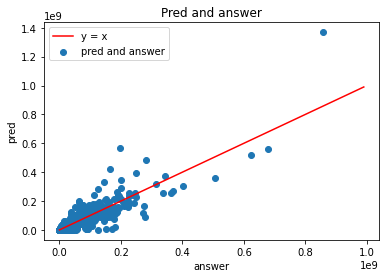

In [ ]:
test_pred_2d = test_pred.reshape(-1,1)
y_test 
#위 두개로 그래프그리기

# x: y실제값, pred 값의 그래프
plt.scatter(y_test, test_pred_2d)
plt.title("Pred and answer")
plt.xlabel('answer')
plt.ylabel('pred')

x_values = np.arange(0,1000000000,10000000)	# x축 지점의 값들
y_values = np.arange(0,1000000000,10000000)	# y축 지점의 값들
plt.plot(x_values, y_values,c = 'red')	# line 그래프를 그립니다 #plt.plot(x,y) 하면 직선
plt.legend(['y = x','pred and answer'])
plt.show()	# 그래프를 화면에 보여줍니다

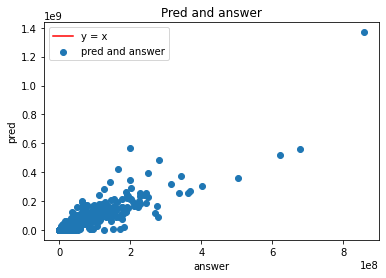

In [ ]:
# 로그용
test_pred_2d = test_pred.reshape(-1,1)
y_test 
#위 두개로 그래프그리기

# x: y실제값, pred 값의 그래프
plt.scatter(y_test, test_pred_2d)
plt.title("Pred and answer")
plt.xlabel('answer')
plt.ylabel('pred')

x_values = np.arange(0,30)	# x축 지점의 값들
y_values = np.arange(0,30)	# y축 지점의 값들
plt.plot(x_values, y_values,c = 'red')	# line 그래프를 그립니다 #plt.plot(x,y) 하면 직선
plt.legend(['y = x','pred and answer'])
plt.show()	# 그래프를 화면에 보여줍니다

In [ ]:
#p value
import statsmodels.api as sm
from scipy import stats

#X,y가 뭐가 들어가야하는지
X = train_data
y = target_data



X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Gross_USA   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1389.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        07:12:39   Log-Likelihood:            -1.4366e+05
No. Observations:                7899   AIC:                         2.874e+05
Df Residuals:                    7850   BIC:                         2.878e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# 2.SVR

In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(x_train, y_train)

train_pred = svm_reg.predict(x_train) 
test_pred = svm_reg.predict(x_test)

#음수 예측값 없애기.
train_pred = erase_neg(train_pred)
test_pred = erase_neg(test_pred)
#애초에 음수값이 발견되지 않음.
model_name = 'svr'
metrics(svm_reg,x_train,y_train,x_test,y_test,train_pred,test_pred)

train set score(R square): -0.16
test set score(R square): -0.18 

train set score(adj R square): -0.17
test set score(adj R square): -0.22 

train set score(MAE): 24689184.3
test set score(MAE): 24687300.09 

train set score(MSE): 4140236074750895.5
test set score(MSE): 3639724014566932.5 

train set score(RMSE): 64344666.25
test set score(RMSE): 60330125.27 

train set score(MAPE): 3860.06 %
test set score(MAPE): 5008.48 % 



In [ ]:
# x_train, x_test는 Log씌워서 학습, 이 모델로 y_train --> y_pred 예측. y_pred에 exp씌워서 이미 exp씌워진 y_test와 비교

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(x_train, y_train)

train_pred = svm_reg.predict(x_train) 
test_pred = svm_reg.predict(x_test)
test_pred = np.exp(test_pred)
#음수 예측값 없애기.
train_pred = erase_neg(train_pred)
test_pred = erase_neg(test_pred)
#애초에 음수값이 발견되지 않음.

metrics(svm_reg,x_train,y_train,x_test,y_test,train_pred,test_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


ValueError: ignored

In [ ]:
#test, pred 비교용 - GrossUSA를 기준으로 정렬해서 그래프로 ㄱㄱ
y_pred_df = pd.DataFrame(test_pred,columns = ['pred'])# y_test
y_pred_df = y_pred_df.apply(lambda x: (np.round(x,0)))
y_test_df = pd.DataFrame(y_test,columns = ['answer'])
pred_and_answer = pd.concat([y_pred_df,y_test_df],axis = 1,ignore_index=True)
pred_and_answer.columns = ['pred','answer']
pred_and_answer.loc[:9]

,pred,answer
0,2.499500e+04,22026.0
1,9.095110e+05,262963.0
2,1.870360e+05,742898.0
3,2.195467e+08,93436322.0
4,3.208000e+04,39185.0
5,1.028727e+09,315058289.0
6,2.580666e+08,145103595.0
7,2.835300e+05,2542020.0
8,2.259470e+05,90679.0
9,1.028306e+08,37182494.0


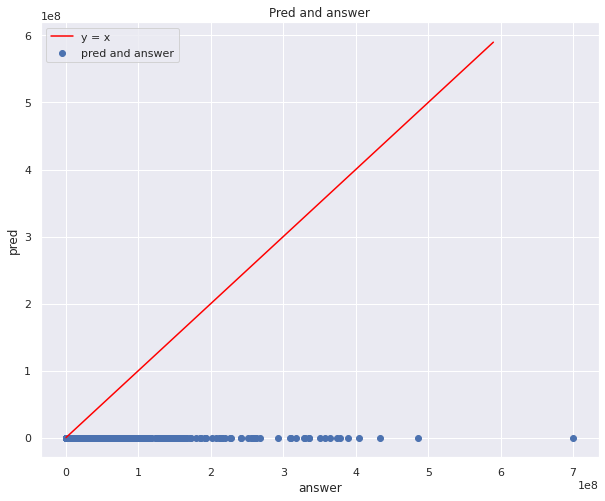

In [ ]:
test_pred_2d = test_pred.reshape(-1,1)
y_test 
#위 두개로 그래프그리기

# x: y실제값, pred 값의 그래프
plt.scatter(y_test, test_pred_2d)
plt.title("Pred and answer")
plt.xlabel('answer')
plt.ylabel('pred')

x_values = np.arange(0,600000000,10000000)	# x축 지점의 값들
y_values = np.arange(0,600000000,10000000)	# y축 지점의 값들
plt.plot(x_values, y_values,c = 'red')	# line 그래프를 그립니다 #plt.plot(x,y) 하면 직선
plt.legend(['y = x','pred and answer'])
plt.show()	# 그래프를 화면에 보여줍니다

In [ ]:
#sklearn.feature_selection.f_regression(x_train, y_train)

# 3.ANN

In [ ]:
#layer 줄여서하기! say..2개!

In [ ]:
#모델 만들기 
def build_model():
 model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)])
 optimizer = tf.keras.optimizers.RMSprop(0.01)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
 return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 2,313
Trainable params: 2,313
Non-trainable params: 0
______________________________________________________

In [ ]:
#학습안될때 돌려보삼 1
#모델 만들기 
def build_model():
 model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)])
 optimizer = tf.keras.optimizers.RMSprop(0.01)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
 return model

model = build_model()
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 16)                816       
_________________________________________________________________
dense_113 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_114 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_115 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 3         
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습안될때 돌려보삼 2
#모델 만들기 
def build_model():
 model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)])
 optimizer = tf.keras.optimizers.RMSprop(0.01)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
 return model

model = build_model()
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 8)                 408       
_________________________________________________________________
dense_109 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_110 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 5         
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습안될때 돌려보삼 3
#모델 만들기 
def build_model():
 model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)])
 optimizer = tf.keras.optimizers.RMSprop(0.01)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
 return model

model = build_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_93 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_94 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 5         
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습안될때 돌려보삼 4
#모델 만들기 
def build_model():
 model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)])
 optimizer = tf.keras.optimizers.RMSprop(0.01)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
 return model

model = build_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 8)                 408       
_________________________________________________________________
dense_106 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 5         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# #모델 만들기 for var selection
# def build_model():
#  model = keras.Sequential([
#     layers.Dense(8, activation='relu', input_shape=[len(x_train.keys())]),
#     layers.Dense(4, activation='relu'),
#     layers.Dense(1)])
#  optimizer = tf.keras.optimizers.RMSprop(0.05)
#  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
#  return model

# model = build_model()
# model.summary()

In [ ]:
# #칼럼 바꿔보기
# x_train = x_train[['Big6_distributor',	'Opening Weekend sales',	'star_winner',	'star_nominee', 'director_winner',	'director_nominee',	'writer_winner',	'writer_nominee',	'Min_Max_run_time']]

In [ ]:
# #y_train에 로그 씌워서 학습
# y_train_log = np.log(y_train)
# y_train_log

In [ ]:
# #budget 추가시 돌릴 코드 #min_max하니 안해도 되네. 2.Scaling,trainnig 섹션에서 [원본]으로 돌릴때만 ㄱㄱ

# x_train = np.asarray(x_train).astype('float32')


## 학습

In [ ]:
#학습

#모델 저장할 주소
modelpath = '/gdrive/My Drive/movie_predict/Models/{epoch:02d}-{val_loss:.4f}.hdf5'

#모델 저장조건
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',verbose = 1, save_best_only = True)

#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss',patience = 20)

#모델 학습
history = model.fit(
  x_train, y_train,
  epochs= 2500, validation_split = 0.2, verbose=1,batch_size = 100, callbacks = [early_stopping_callback])  #Q epoch을 늘렸더니 갑자기 loss가 증가하고 학습자체가 잘 안됐다..?

Epoch 1/2500
51/51 [==============================] - 1s 8ms/step - loss: 4731280510378614.0000 - mae: 25513565.6154 - mse: 4731280510378614.0000 - val_loss: 2989945509642240.0000 - val_mae: 22794708.0000 - val_mse: 2989945509642240.0000
Epoch 2/2500
51/51 [==============================] - 0s 2ms/step - loss: 4361124946056113.0000 - mae: 25309884.3462 - mse: 4361124946056113.0000 - val_loss: 2934735047229440.0000 - val_mae: 22628342.0000 - val_mse: 2934735047229440.0000
Epoch 3/2500
51/51 [==============================] - 0s 2ms/step - loss: 4565638179233162.0000 - mae: 25974452.3077 - mse: 4565638179233162.0000 - val_loss: 2709648696147968.0000 - val_mae: 23593750.0000 - val_mse: 2709648696147968.0000
Epoch 4/2500
51/51 [==============================] - 0s 2ms/step - loss: 4692714889150464.0000 - mae: 28465477.9231 - mse: 4692714889150464.0000 - val_loss: 2413866109632512.0000 - val_mae: 28008244.0000 - val_mse: 2413866109632512.0000
Epoch 5/2500
51/51 [============================

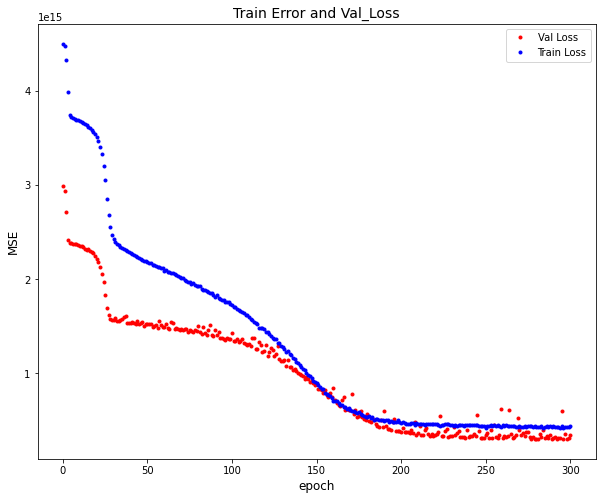

In [ ]:
# 학습경과

y_vloss = history.history['val_loss']
y_mse = history.history['mse']

x_len = np.arange(len(y_mse))

plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(x_len, y_vloss, "o",c = "red", markersize = 3)


plt.plot(x_len, y_mse, "o", c = "blue", markersize = 3)


plt.title('Train Error and Val_Loss', fontsize=14)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)

plt.legend(['Val Loss','Train Loss'])


plt.show()


In [ ]:
# #  log to exp ==>?

# # Evaluation Metrics

# #prediction
# train_pred = model.predict(x_train) 
# test_pred = model.predict(x_test)

# # [pred] log to exp
# train_pred =  np.exp(train_pred)
# test_pred = np.exp(test_pred)

# # [test] log to exp
# y_train = np.exp(y_train) 
# y_test = np.exp(y_test)

# metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred)

In [ ]:
# x_test = np.asarray(x_test).astype('float32')

In [ ]:
# Prediction
y_train = np.array(y_train).reshape(-1,1)


y_pred = model.predict(x_test)

# Evaluation Metrics
train_pred = model.predict(x_train) 
test_pred = model.predict(x_test)

#음수 예측값 없애기.
train_pred = erase_neg(train_pred)
test_pred = erase_neg(test_pred)

model_name = 'ann'
metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred)

train set score(R square): 0.88
test set score(R square): 0.88 

train set score(adj R square): 0.88
test set score(adj R square): 0.88 

train set score(MAE): 10471258.95
test set score(MAE): 10388888.6 

train set score(MSE): 428600193983398.75
test set score(MSE): 366935483950893.75 

train set score(RMSE): 20702661.52
test set score(RMSE): 19155560.13 

train set score(MAPE): 7170.03 %
test set score(MAPE): 16473.84 % 



In [ ]:
# #log & exp ann pred

# y_train = np.array(y_train).reshape(-1,1)


# y_pred = model.predict(x_test)

# # Evaluation Metrics
# train_pred = model.predict(x_train) 
# test_pred = model.predict(x_test)
# test_pred = np.exp(test_pred)

# #음수 예측값 없애기.
# train_pred = erase_neg(train_pred)
# test_pred = erase_neg(test_pred)


# metrics(model,x_train,y_train,x_test,y_test,train_pred,test_pred)

In [ ]:
#test, pred 비교용 - GrossUSA를 기준으로 정렬해서 그래프로 ㄱㄱ
y_pred_df = pd.DataFrame(test_pred,columns = ['pred'])# y_test
y_pred_df = y_pred_df.apply(lambda x: (np.round(x,0)))
y_test_df = pd.DataFrame(y_test,columns = ['answer'])
pred_and_answer = pd.concat([y_pred_df,y_test_df],axis = 1,ignore_index=True)
pred_and_answer.columns = ['pred','answer']
pred_and_answer.loc[:9]

TypeError: ignored

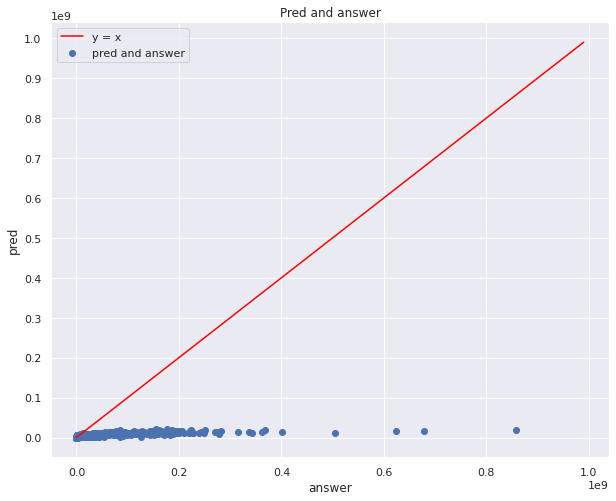

In [ ]:
test_pred_2d = test_pred.reshape(-1,1)
y_test 
#위 두개로 그래프그리기

# x: y실제값, pred 값의 그래프
plt.scatter(y_test, test_pred_2d)
plt.title("Pred and answer")
plt.xlabel('answer')
plt.ylabel('pred')
plt.yticks(np.arange(0,12000000000,100000000))
x_values = np.arange(0,1000000000,10000000)	# x축 지점의 값들
y_values = np.arange(0,1000000000,10000000)	# y축 지점의 값들
plt.plot(x_values, y_values,c = 'red')	# line 그래프를 그립니다 #plt.plot(x,y) 하면 직선
plt.legend(['y = x','pred and answer'])
plt.show()	# 그래프를 화면에 보여줍니다

In [ ]:
# #test, pred 비교용
# y_pred_df = pd.DataFrame(test_pred,columns = ['pred'])# y_test
# y_pred_df = y_pred_df.apply(lambda x: (np.round(x,0)))
# y_test_df = pd.DataFrame(y_test,columns = ['answer'])
# pred_and_answer = pd.concat([y_pred_df,y_test_df],axis = 1,ignore_index=True)
# pred_and_answer.columns = ['pred','answer']
# pred_and_answer.loc[5:]

# 4.CNN

In [ ]:
# #선행 선배님 코드
# def create_model(char_train, senti_train, y_train):
    
#     global emd_size 
#     global output_size 
   
#     #char
#     text_input = Input(shape=(maxlen,), name = "char_input", dtype = "float32")
#     embbed_text = Embedding(max_features, emd_size, name = "embed_char")(text_input)
#     conv_layer = Conv1D(filter_num, 3, activation = "relu",padding = "same" )(embbed_text)
#     max_pool = GlobalMaxPooling1D()(conv_layer)
#     dropout_Layer = Dropout(0.5)(max_pool)
#     Batch_Layer = BatchNormalization()(dropout_Layer)
#     char_flat = Flatten()(Batch_Layer)
#     char_model = Model(inputs = text_input, outputs = char_flat)

# char_maxlen = 64
# maxlen = 64
# max_features = 2**16
# emd_size = 256
# output_size =7 
# filter_num = 200

Sequential한 df가 아닌데 어떻게 cnn에 넣지..? filter_size 

In [ ]:

# model_m = Sequential()
# model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
# model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
# model_m.add(Conv1D(100, 10, activation='relu'))
# model_m.add(MaxPooling1D(3))
# model_m.add(Conv1D(160, 10, activation='relu'))
# model_m.add(Conv1D(160, 10, activation='relu'))
# model_m.add(GlobalAveragePooling1D())
# model_m.add(Dropout(0.5))
# model_m.add(Dense(num_classes, activation='softmax'))
# print(model_m.summary())

In [ ]:
# #Kernel_size = 2 # https://rosypark.tistory.com/8
# model = Sequential()
# model.add(Conv1D(filters = 100, kernel_size = 2, activation = 'relu', input_size = (49,1))) # conv1d
# model.add(MaxPooling1D(pool_size = 2))
# model.add(Flatten())
# model.add(Dense(50,activation='relu'))
# model.add(Dense(1)) #Gross USA 값 하나 나와야하니까.
# model.compile(optimizer = 'adam',loss = 'mse')
# model.summary

# model.fit(x_train,y_train,epochs = 100,verbose =1)
# train_pred = model.predict(x_train,verbose = 1)
# test_pred = model.predict(x_test,verbose = 1)


In [ ]:
#이거 돌리삼 1. Deep CNN #kernel사이즈 조정ㄱ  r2 0.23
#kernel_size = 10, https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
model_m = Sequential()
model_m.add(Reshape((x_train.shape[1], 1), input_shape=(x_train.shape[1],))) #해줘야 돌아가! 왜??
model_m.add(Conv1D(filters = 100, kernel_size = 16, activation='relu', input_shape=(x_train.shape[1], 1)))
# dataset에서 필드를 뽑아서 CNN사용 할 수도 있음 But, 지금의 케이스에는 수가 너무 적음.
# 

model_m.add(Conv1D(100, 8, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Conv1D(160, 8, activation='relu'))
model_m.add(Conv1D(160, 4, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(1)) #Gross USA 값 하나 나와야하니까.

print(model_m.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 34, 100)           1700      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 100)           80100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 160)            128160    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 160)            102560    
_________________________________________________________________
global_average_pooling1d (Gl (None, 160)              

In [ ]:
# # Step-wise용
# # 1. Deep CNN #kernel사이즈 조정ㄱ  r2 0.23
# #kernel_size = 10, https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
# model_m = Sequential()
# model_m.add(Reshape((x_train.shape[1], 1), input_shape=(x_train.shape[1],))) #해줘야 돌아가! 왜??
# model_m.add(Conv1D(filters = 100, kernel_size = 4, activation='relu', input_shape=(x_train.shape[1], 1)))
# # dataset에서 필드를 뽑아서 CNN사용 할 수도 있음 But, 지금의 케이스에는 수가 너무 적음.
# # 

# model_m.add(Conv1D(100, 8, activation='relu'))
# model_m.add(MaxPooling1D(2))
# model_m.add(Conv1D(160, 4, activation='relu'))
# model_m.add(GlobalAveragePooling1D())
# model_m.add(Dropout(0.5))
# model_m.add(Dense(1)) #Gross USA 값 하나 나와야하니까.

# print(model_m.summary())

In [ ]:
# #이거 돌리삼 CNN1D 층 한개 첫 kernel 10 -0.12, 첫 커널 30 
# #kernel_size = 10, https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
# model_m = Sequential()
# model_m.add(Reshape((x_train.shape[1], 1), input_shape=(x_train.shape[1],))) #해줘야 돌아가! 왜??
# model_m.add(Conv1D(filters = 100, kernel_size = 30, activation='relu', input_shape=(x_train.shape[1], 1)))
# model_m.add(GlobalAveragePooling1D())
# model_m.add(Dropout(0.5))
# model_m.add(Dense(1)) #Gross USA 값 하나 나와야하니까.



# print(model_m.summary())

In [ ]:
# #df to numpy
# x_train = x_train.to_numpy()
# # y_train = y_train.to_numpy()

In [ ]:
# 모델 돌리기

start = time.time()  # 시작 시간 저장
 
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='mse', patience=20)
]

model_m.compile(loss='mse',optimizer='adam', metrics=['mae','mse'])

BATCH_SIZE = 400
EPOCHS = 200

history = model_m.fit(x_train,y_train,batch_size=BATCH_SIZE,callbacks = callbacks_list,epochs=EPOCHS,validation_split=0.2, verbose=1)

sec = time.time() - start
min = int(sec // 60)
sec = int(sec % 60)

print(f"time :{min}분{sec}초" )  # 현재시각 - 시작시간 = 실행 시간

Epoch 1/200
13/13 [==============================] - 2s 62ms/step - loss: 4752852072117979.0000 - mae: 25566288.0000 - mse: 4752852072117979.0000 - val_loss: 2994006669656064.0000 - val_mae: 22850786.0000 - val_mse: 2994006669656064.0000
Epoch 2/200
13/13 [==============================] - 1s 41ms/step - loss: 4488291481925339.5000 - mae: 25643595.7143 - mse: 4488291481925339.5000 - val_loss: 2993896342683648.0000 - val_mae: 22848648.0000 - val_mse: 2993896342683648.0000
Epoch 3/200
13/13 [==============================] - 1s 40ms/step - loss: 4600097629573705.0000 - mae: 26169821.5714 - mse: 4600097629573705.0000 - val_loss: 2992925411639296.0000 - val_mae: 22832356.0000 - val_mse: 2992925411639296.0000
Epoch 4/200
13/13 [==============================] - 0s 39ms/step - loss: 5137135891906560.0000 - mae: 27148523.1429 - mse: 5137135891906560.0000 - val_loss: 2987883120033792.0000 - val_mae: 22776964.0000 - val_mse: 2987883120033792.0000
Epoch 5/200
13/13 [=============================

In [ ]:
#다시 numpy array to df
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

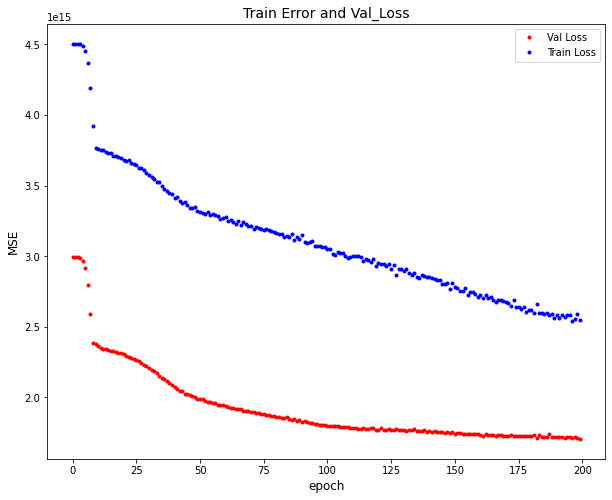

In [ ]:
# 학습경과

y_vloss = history.history['val_loss']
y_mse = history.history['mse']

x_len = np.arange(len(y_mse))

plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(x_len, y_vloss, "o",c = "red", markersize = 3)


plt.plot(x_len, y_mse, "o", c = "blue", markersize = 3)


plt.title('Train Error and Val_Loss', fontsize=14)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)

plt.legend(['Val Loss','Train Loss'])


plt.show()


In [ ]:
# Prediction
y_pred = model_m.predict(x_test)

# Evaluation Metrics
train_pred = model_m.predict(x_train) 
test_pred = model_m.predict(x_test)


#음수 예측값 없애기.
train_pred = erase_neg(train_pred)
test_pred = erase_neg(test_pred)

model_name = 'cnn'
metrics(model_m,x_train,y_train,x_test,y_test,train_pred,test_pred)

train set score(R square): 0.34
test set score(R square): 0.39 

train set score(adj R square): 0.33
test set score(adj R square): 0.37 

train set score(MAE): 22749926.33
test set score(MAE): 21733705.82 

train set score(MSE): 2363925323062368.5
test set score(MSE): 1875789822647894.8 

train set score(RMSE): 48620215.17
test set score(RMSE): 43310389.32 

train set score(MAPE): 0    33298.38
dtype: float64 %
test set score(MAPE): 37698.92 % 



In [ ]:
# # log & exp CNN
# y_pred = model_m.predict(x_test)

# # Evaluation Metrics
# train_pred = model_m.predict(x_train) 
# test_pred = model_m.predict(x_test)

# test_pred = np.exp(test_pred)
# #음수 예측값 없애기.
# train_pred = erase_neg(train_pred)
# test_pred = erase_neg(test_pred)

# metrics(model_m,x_train,y_train,x_test,y_test,train_pred,test_pred)

test set score(R square): 0.71 

test set score(adj R square): 0.71 

test set score(MAE): 10411296.77 

test set score(MSE): 999487857730670.5 

test set score(RMSE): 31614677.88 

test set score(MAPE): 82.16 



In [ ]:
#test, pred 비교용 - GrossUSA를 기준으로 정렬해서 그래프로 ㄱㄱ
y_pred_df = pd.DataFrame(test_pred,columns = ['pred'])# y_test
y_pred_df = y_pred_df.apply(lambda x: (np.round(x,0)))
y_test_df = pd.DataFrame(y_test,columns = ['answer'])
pred_and_answer = pd.concat([y_pred_df,y_test_df],axis = 1,ignore_index=True)
pred_and_answer.columns = ['pred','answer']
pred_and_answer.loc[:9]

,pred,answer
0,16491868.0,22026
1,30924028.0,262963
2,30148150.0,742898
3,37893668.0,93436322
4,20614982.0,39185
5,49550408.0,315058289
6,26034674.0,145103595
7,16133336.0,2542020
8,15706772.0,90679
9,29614754.0,37182494


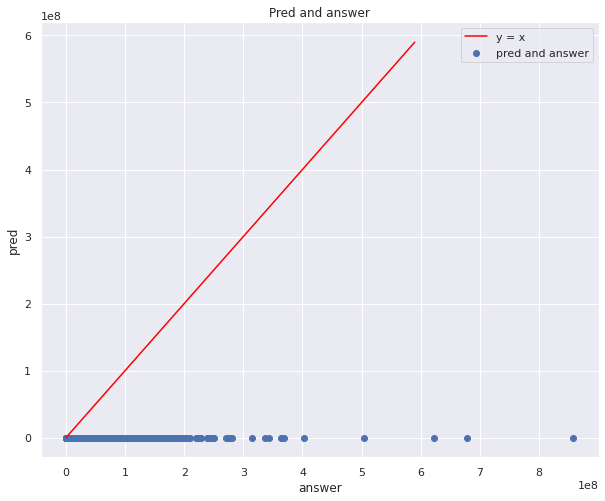

In [ ]:
test_pred_2d = test_pred.reshape(-1,1)
y_test 
#위 두개로 그래프그리기

# x: y실제값, pred 값의 그래프
plt.scatter(y_test, test_pred_2d)
plt.title("Pred and answer")
plt.xlabel('answer')
plt.ylabel('pred')

x_values = np.arange(0,600000000,10000000)	# x축 지점의 값들
y_values = np.arange(0,600000000,10000000)	# y축 지점의 값들
plt.plot(x_values, y_values,c = 'red')	# line 그래프를 그립니다 #plt.plot(x,y) 하면 직선
plt.legend(['y = x','pred and answer'])
plt.xticks(np.arange(0,900000000,100000000))
plt.show()	# 그래프를 화면에 보여줍니다

In [ ]:
# RNN

# LSTM
--> CNN정도는 가능할 듯. LSTM은 ,,, 생각해보자


SyntaxError: ignored

# 5.새로운 칼럼 추가할 수 있을까?

##1.연도별 영화산업 성장의 추이를 반영하자 --> 다른 방식으로 활용 시도


Text(0, 0.5, 'Worldwide USA')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

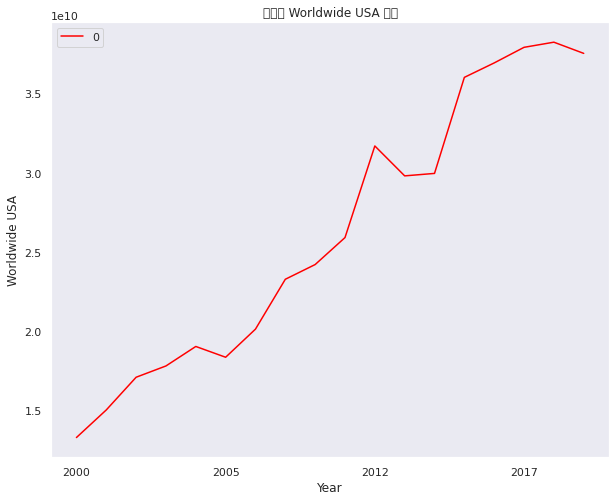

In [ ]:
#제안 df에 연도 추가.
#아래 dict는 연도별 total woirld wide 수익
dicty = {'2019':37538878241
,'2018':	38245112406
,'2017':	37920781960
,'2016':	36936646657
,'2015':	36025057454
,'2014':	29964578019
,'2013':	29809367872
,'2012':	31696806545
,'2011': 25915576114
,'2008':	24213849521
,'2007':	23285002623
,'2006':	20139287256
,'2005':	18364267159
,'2004':	19044596723
,'2003':	17814905244
,'2002':	17102256819
,'2001':	15039077485
,'2000':	13297868959} 
from matplotlib import pyplot
years = pd.DataFrame(dicty,index = [0])
years = years.transpose()
years= years.sort_index(ascending=True)
years[0].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("연도별 Worldwide USA 추이")
pyplot.xlabel("Year")
pyplot.ylabel("Worldwide USA")

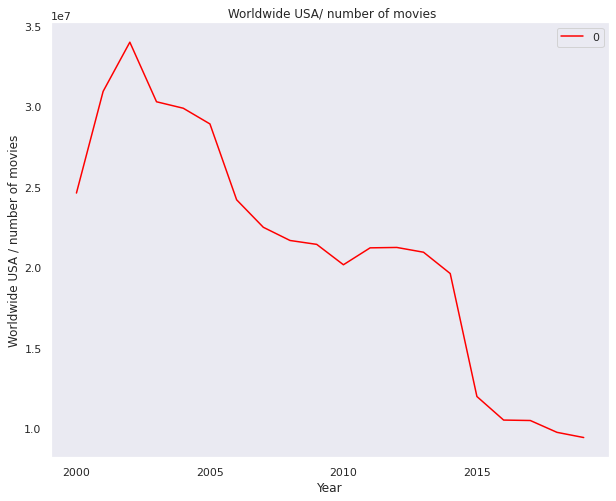

In [ ]:
#아래 dict는 연도별 total woirld wide/영화수  수익
dicto = {'2019':9431878.955
,'2018':9753917.982
,'2017':10489842.87
,'2016':10517268.41
,'2015':11980398.22
,'2014':19623168.32
,'2013':20948255.71
,'2012':21244508.41
,'2011':21219852.25
,'2010':20169277.43
,'2009':21435546.83
,'2008':21677573.43
,'2007':22497587.08
,'2006':24205874.11
,'2005':28920105.76
,'2004':29897326.1
,'2003':30297457.9
,'2002':34000510.57
,'2001':30944603.88
,'2000':24625683.26}

from matplotlib import pyplot
years = pd.DataFrame(dicto,index = [0])
years = years.transpose()
years= years.sort_index(ascending=True)
years[0].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title(" Worldwide USA/ number of movies")
pyplot.xlabel("Year")
pyplot.ylabel("Worldwide USA / number of movies")
pyplot.show()

In [ ]:
years = pd.DataFrame({'year':[1,2,3]})

[37,538,878,241,38,245,112,406,	37,920,781,960
,	36,936,646,657
,	36,025,057,454
,29,964,578,019
,29,809,367,872
,31,696,806,545
,25,915,576,114
,24,213,849,521
,23,285,002,623
,20,139,287,256
,18,364,267,159
,19,044,596,723
,17,814,905,244
,17,102,256,819
,15,039,077,485
13,297,868,959] 


years

SyntaxError: ignored

# 6.Random Forest Regressor

의사결정 나무_for 수치용 순수도 척도는  F검정, Information Gain으로 씀.
RF에서도 같지 않을까?

extra tree도 훈련

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# model trainig

regressor = RandomForestRegressor(n_estimators = 300, n_jobs=-1,random_state = 0)
regressor.fit(x_train,y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# predict

y_train = np.array(y_train)
#test_pred = regressor.predict()
train_pred = regressor.predict(x_train)
test_pred = regressor.predict(x_test)

#음수 예측값 없애기.
train_pred = erase_neg(train_pred)
test_pred = erase_neg(test_pred)

#eval metrics
model_name = 'rf'
metrics(regressor,x_train,y_train,x_test,y_test,train_pred,test_pred)

train set score(R square): 0.98
test set score(R square): 0.91 

train set score(adj R square): 0.98
test set score(adj R square): 0.91 

train set score(MAE): 2535472.14
test set score(MAE): 6749840.02 

train set score(MSE): 55055161702075.9
test set score(MSE): 263750402202688.03 

train set score(RMSE): 7419916.56
test set score(RMSE): 16240394.15 

train set score(MAPE): 90598.71 %
test set score(MAPE): 109058.33 % 



In [ ]:
# # log & exp RF

# y_train = np.array(y_train)
# #test_pred = regressor.predict()
# train_pred = regressor.predict(x_train)
# test_pred = regressor.predict(x_test)
# test_pred = np.exp(test_pred)
# #음수 예측값 없애기.
# train_pred = erase_neg(train_pred)
# test_pred = erase_neg(test_pred)

# #eval metrics
# metrics(regressor,x_train,y_train,x_test,y_test,train_pred,test_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


ValueError: ignored

In [ ]:
#test, pred 비교용 - GrossUSA를 기준으로 정렬해서 그래프로 ㄱㄱ
y_pred_df = pd.DataFrame(test_pred,columns = ['pred'])# y_test
y_pred_df = y_pred_df.apply(lambda x: (np.round(x,0)))
y_test_df = pd.DataFrame(y_test,columns = ['answer'])
pred_and_answer = pd.concat([y_pred_df,y_test_df],axis = 1,ignore_index=True)
pred_and_answer.columns = ['pred','answer']
pred_and_answer.loc[:9]

,pred,answer
0,18476.0,22026
1,1361324.0,262963
2,193177.0,742898
3,88644148.0,93436322
4,45253.0,39185
5,241669800.0,315058289
6,113327544.0,145103595
7,428543.0,2542020
8,435856.0,90679
9,22085993.0,37182494


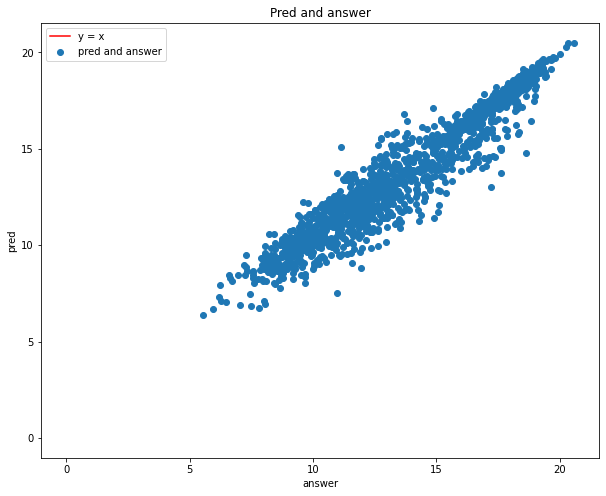

In [ ]:
test_pred_2d = test_pred.reshape(-1,1)
y_test 
#위 두개로 그래프그리기

# x: y실제값, pred 값의 그래프
plt.scatter(y_test, test_pred_2d)
plt.title("Pred and answer")
plt.xlabel('answer')
plt.ylabel('pred')

x_values = np.arange(0,60,10000000)	# x축 지점의 값들
y_values = np.arange(0,60,10000000)	# y축 지점의 값들
plt.plot(x_values, y_values,c = 'red')	# line 그래프를 그립니다 #plt.plot(x,y) 하면 직선
plt.legend(['y = x','pred and answer'])
plt.show()	# 그래프를 화면에 보여줍니다

In [ ]:
# 하이퍼파라미터 튜닝 using grid search
from sklearn.model_selection import GridSearchCV
#RF gave max_features = n_features/3 for regression

rf_param_grid =  {
    'n_estimators' : [100,200,300,400,500,600],
    'max_depth' :[2,4,6,8,10,12,None],
    'min_samples_leaf' : [3,5,7,9],
    'min_samples_split' : [2,3,5,9,11,13]
}

# min_samples_leaf: 리프노드가 되기 위한 최소한의 샘플 수
# min_samples_split: 노드를 분할하기 위한 최소한의 데이터 수

grid_search = GridSearchCV(estimator = regressor, param_grid = rf_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) #,score = 'mean_squared_error'? 뭘로쟴..?
grid_search.fit(x_train,y_train)
grid_search.best_params_
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 보삼

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search.best_estimator_

In [ ]:
# 7:38에 시작네ㅔ
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)
grid_accuracy


# ev_df에 모델 성능 저장

In [ ]:
#모델 이름 저장. 필요할때만.,
ev_df_material['rv_star'] = "Base+budget_exist"
#week 안추가했을때 돌리기
week = np.nan

In [ ]:
# 조심. 한번만 돌리기.

ev_df_material['week'] = week
ev_df_material
new_df = pd.DataFrame(data = ev_df_material, index = ['0']) # 이번 모델들 돌려서 얻은 성능df
ev_df = ev_df.append(new_df)
ev_df.set_index(keys = 'rv_star',drop = True,inplace = True)
#del ev_df['name']
ev_df = ev_df.reset_index()
ev_df

,rv_star,week,lr_r2_train,lr_r2_test,lr_adjr2_train,lr_adjr2_test,lr_mae_train,lr_mae_test,lr_mse_train,lr_mse_test,lr_rmse_train,lr_rmse_test,lr_mape_train,lr_mape_test,svr_r2_train,svr_r2_test,svr_adjr2_train,svr_adjr2_test,svr_mae_train,svr_mae_test,svr_mse_train,svr_mse_test,svr_rmse_train,svr_rmse_test,svr_mape_train,svr_mape_test,ann_r2_train,ann_r2_test,ann_adjr2_train,ann_adjr2_test,ann_mae_train,ann_mae_test,ann_mse_train,ann_mse_test,ann_rmse_train,ann_rmse_test,ann_mape_train,ann_mape_test,cnn_r2_train,cnn_r2_test,cnn_adjr2_train,cnn_adjr2_test,cnn_mae_train,cnn_mae_test,cnn_mse_train,cnn_mse_test,cnn_rmse_train,cnn_rmse_test,cnn_mape_train,cnn_mape_test,rf_r2_train,rf_r2_test,rf_adjr2_train,rf_adjr2_test,rf_mae_train,rf_mae_test,rf_mse_train,rf_mse_test,rf_rmse_train,rf_rmse_test,rf_mape_train,rf_mape_test
0,star,1.0,0.89,0.93,0.89,0.93,8688489.59,8083910.03,4.242535e+14,2.869692e+14,20597415.82,16940164.63,4982.30,5133.32,-0.17,-0.18,-0.18,-0.22,27204230.01,27606490.26,4.443039e+15,4.510294e+15,66656125.19,67158723.17,5691.62,4747.20,0.88,0.90,0.88,0.90,9749180.36,9986269.50,4.546142e+14,3.836895e+14,21321684.36,19587994.58,10242.84,9478.18,0.23,0.25,0.22,0.22,27065115.03,26856975.86,2.924483e+15,2.889304e+15,54078493.57,53752244.12,27281.64,27523.91,0.99,0.93,0.99,0.93,2767055.32,6782633.70,5.619806e+13,2.573552e+14,7496536.50,16042295.39,93816.57,76369.86
1,star,2.0,0.89,0.90,0.89,0.90,8460723.96,8597148.28,3.928210e+14,3.850410e+14,19819713.46,19622462.05,4344.61,99783.19,-0.18,-0.14,-0.19,-0.18,27230172.57,25465035.29,4.346381e+15,4.545959e+15,65927086.26,67423729.65,5010.03,6838.55,0.88,0.86,0.88,0.86,8544456.76,9169633.79,4.325886e+14,5.639626e+14,20798764.41,23747897.52,969.26,9435.82,0.25,0.19,0.24,0.16,26495587.31,26669194.05,2.781853e+15,3.223205e+15,52743271.21,56773276.61,NaN,27719.81,0.99,0.90,0.99,0.90,2585109.30,7327817.81,4.964661e+13,4.101610e+14,7046034.85,20252432.42,86240.37,96977.54
2,star,3.0,0.90,0.90,0.90,0.90,8432572.78,8315976.85,3.918250e+14,3.733217e+14,19794569.91,19321535.69,5028.43,79844.68,-0.17,-0.16,-0.18,-0.20,27027614.43,25243601.19,4.405885e+15,4.130096e+15,66376841.20,64265820.57,5435.31,5257.45,0.88,0.86,0.88,0.86,9723004.33,9819448.09,4.486605e+14,4.851168e+14,21181606.80,22025366.83,7312.38,4932.54,0.23,0.24,0.22,0.21,26978825.15,25819640.76,2.887769e+15,2.716662e+15,53737961.91,52121604.13,NaN,25292.60,0.99,0.91,0.99,0.91,2673451.48,6760011.23,5.100127e+13,3.171250e+14,7141517.09,17808003.00,91548.60,78824.62
3,star,4.0,0.89,0.92,0.89,0.92,8545721.34,8162723.85,4.165193e+14,2.659302e+14,20408805.09,16307365.21,5161.67,84902.70,-0.17,-0.17,-0.18,-0.21,26982046.79,24819459.28,4.482733e+15,3.752339e+15,66953218.00,61256338.38,4963.83,5179.71,0.89,0.91,0.89,0.91,9112448.18,8447178.24,4.360845e+14,2.740603e+14,20882635.60,16554765.29,4192.23,2615.08,0.23,0.24,0.22,0.21,26758564.55,25872380.87,2.931113e+15,2.449569e+15,54139756.85,49493121.29,NaN,26880.06,0.99,0.91,0.99,0.91,2644004.65,6842259.23,5.323553e+13,2.752644e+14,7296268.07,16591093.62,90107.21,82923.94
4,rv,1.0,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,104023.49,0.11,0.14,0.10,0.11,21296885.93,22613374.58,3.095184e+15,3.011174e+15,55634376.36,54874161.35,2860.03,18449.76,0.89,0.90,0.89,0.90,7193655.32,7782596.28,3.702975e+14,3.458216e+14,19243115.09,18596279.72,1477.94,2161.31,0.45,0.52,0.45,0.50,20569870.95,20687639.08,1.912400e+15,1.683454e+15,43730995.63,41029914.20,NaN,22773.78,0.99,0.92,0.99,0.92,2417015.09,6588734.14,5.132642e+13,2.681000e+14,7164245.66,16373759.61,92449.54,102992.06
5,rv,2.0,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,4412.11,0.11,0.14,0.10,0.11,21297607.80,22614127.33,3.095130e+15,3.011152e+15,55633896.97,54873968.47,18562.54,18469.40,0.88,0.90,0.88,0.90,8009427.73,8623712.14,4.010718e+14,3.449434e+14,20026777.41,18572651.17,2817.53,4470.79,0.46,0.52,0.46,0.50,20492941.12,20631889.6

In [ ]:
# #실수한 row 지우기
# ev_df = ev_df.drop(행인덱스).reset_index(drop = True)
# ev_df

,rv_star,week,lr_r2_train,lr_r2_test,lr_adjr2_train,lr_adjr2_test,lr_mae_train,lr_mae_test,lr_mse_train,lr_mse_test,lr_rmse_train,lr_rmse_test,lr_mape_train,lr_mape_test,svr_r2_train,svr_r2_test,svr_adjr2_train,svr_adjr2_test,svr_mae_train,svr_mae_test,svr_mse_train,svr_mse_test,svr_rmse_train,svr_rmse_test,svr_mape_train,svr_mape_test,ann_r2_train,ann_r2_test,ann_adjr2_train,ann_adjr2_test,ann_mae_train,ann_mae_test,ann_mse_train,ann_mse_test,ann_rmse_train,ann_rmse_test,ann_mape_train,ann_mape_test,cnn_r2_train,cnn_r2_test,cnn_adjr2_train,cnn_adjr2_test,cnn_mae_train,cnn_mae_test,cnn_mse_train,cnn_mse_test,cnn_rmse_train,cnn_rmse_test,cnn_mape_train,cnn_mape_test,rf_r2_train,rf_r2_test,rf_adjr2_train,rf_adjr2_test,rf_mae_train,rf_mae_test,rf_mse_train,rf_mse_test,rf_rmse_train,rf_rmse_test,rf_mape_train,rf_mape_test
0,star,1,0.89,0.93,0.89,0.93,8688489.59,8083910.03,4.242535e+14,2.869692e+14,20597415.82,16940164.63,4982.30,5133.32,-0.17,-0.18,-0.18,-0.22,27204230.01,27606490.26,4.443039e+15,4.510294e+15,66656125.19,67158723.17,5691.62,4747.20,0.88,0.90,0.88,0.90,9749180.36,9986269.50,4.546142e+14,3.836895e+14,21321684.36,19587994.58,10242.84,9478.18,0.23,0.25,0.22,0.22,27065115.03,26856975.86,2.924483e+15,2.889304e+15,54078493.57,53752244.12,27281.64,27523.91,0.99,0.93,0.99,0.93,2767055.32,6782633.70,5.619806e+13,2.573552e+14,7496536.50,16042295.39,93816.57,76369.86
1,star,2,0.89,0.90,0.89,0.90,8460723.96,8597148.28,3.928210e+14,3.850410e+14,19819713.46,19622462.05,4344.61,99783.19,-0.18,-0.14,-0.19,-0.18,27230172.57,25465035.29,4.346381e+15,4.545959e+15,65927086.26,67423729.65,5010.03,6838.55,0.88,0.86,0.88,0.86,8544456.76,9169633.79,4.325886e+14,5.639626e+14,20798764.41,23747897.52,969.26,9435.82,0.25,0.19,0.24,0.16,26495587.31,26669194.05,2.781853e+15,3.223205e+15,52743271.21,56773276.61,NaN,27719.81,0.99,0.90,0.99,0.90,2585109.30,7327817.81,4.964661e+13,4.101610e+14,7046034.85,20252432.42,86240.37,96977.54
2,star,3,0.90,0.90,0.90,0.90,8432572.78,8315976.85,3.918250e+14,3.733217e+14,19794569.91,19321535.69,5028.43,79844.68,-0.17,-0.16,-0.18,-0.20,27027614.43,25243601.19,4.405885e+15,4.130096e+15,66376841.20,64265820.57,5435.31,5257.45,0.88,0.86,0.88,0.86,9723004.33,9819448.09,4.486605e+14,4.851168e+14,21181606.80,22025366.83,7312.38,4932.54,0.23,0.24,0.22,0.21,26978825.15,25819640.76,2.887769e+15,2.716662e+15,53737961.91,52121604.13,NaN,25292.60,0.99,0.91,0.99,0.91,2673451.48,6760011.23,5.100127e+13,3.171250e+14,7141517.09,17808003.00,91548.60,78824.62
3,star,4,0.89,0.92,0.89,0.92,8545721.34,8162723.85,4.165193e+14,2.659302e+14,20408805.09,16307365.21,5161.67,84902.70,-0.17,-0.17,-0.18,-0.21,26982046.79,24819459.28,4.482733e+15,3.752339e+15,66953218.00,61256338.38,4963.83,5179.71,0.89,0.91,0.89,0.91,9112448.18,8447178.24,4.360845e+14,2.740603e+14,20882635.60,16554765.29,4192.23,2615.08,0.23,0.24,0.22,0.21,26758564.55,25872380.87,2.931113e+15,2.449569e+15,54139756.85,49493121.29,NaN,26880.06,0.99,0.91,0.99,0.91,2644004.65,6842259.23,5.323553e+13,2.752644e+14,7296268.07,16591093.62,90107.21,82923.94
4,rv,1,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,104023.49,0.11,0.14,0.10,0.11,21296885.93,22613374.58,3.095184e+15,3.011174e+15,55634376.36,54874161.35,2860.03,18449.76,0.89,0.90,0.89,0.90,7193655.32,7782596.28,3.702975e+14,3.458216e+14,19243115.09,18596279.72,1477.94,2161.31,0.45,0.52,0.45,0.50,20569870.95,20687639.08,1.912400e+15,1.683454e+15,43730995.63,41029914.20,NaN,22773.78,0.99,0.92,0.99,0.92,2417015.09,6588734.14,5.132642e+13,2.681000e+14,7164245.66,16373759.61,92449.54,102992.06
5,rv,2,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,4412.11,0.11,0.14,0.10,0.11,21297607.80,22614127.33,3.095130e+15,3.011152e+15,55633896.97,54873968.47,18562.54,18469.40,0.88,0.90,0.88,0.90,8009427.73,8623712.14,4.010718e+14,3.449434e+14,20026777.41,18572651.17,2817.53,4470.79,0.46,0.52,0.46,0.50,20492941.12,20631889.63,1.895255e+

신중히 저장

In [ ]:
#저장. onlyonce.
with open('/gdrive/MyDrive/movie_predict/DF/ev_df/ev_df','wb') as fw:
  pickle.dump(ev_df,fw)

In [ ]:
# 성능 분석기
model = 'ann'
ev_met = 'mae'
train_or_test = 'test'
ev_df[ev_df[model+'_'+ev_met + '_' + train_or_test] == ev_df[model+'_'+ev_met + '_' + train_or_test].max()]

,name,week,lr_r2_train,lr_r2_test,lr_adjr2_train,lr_adjr2_test,lr_mae_train,lr_mae_test,lr_mse_train,lr_mse_test,lr_rmse_train,lr_rmse_test,lr_mape_train,lr_mape_test,svr_r2_train,svr_r2_test,svr_adjr2_train,svr_adjr2_test,svr_mae_train,svr_mae_test,svr_mse_train,svr_mse_test,svr_rmse_train,svr_rmse_test,svr_mape_train,svr_mape_test,ann_r2_train,ann_r2_test,ann_adjr2_train,ann_adjr2_test,ann_mae_train,ann_mae_test,ann_mse_train,ann_mse_test,ann_rmse_train,ann_rmse_test,ann_mape_train,ann_mape_test,cnn_r2_train,cnn_r2_test,cnn_adjr2_train,cnn_adjr2_test,cnn_mae_train,cnn_mae_test,cnn_mse_train,cnn_mse_test,cnn_rmse_train,cnn_rmse_test,cnn_mape_train,cnn_mape_test,rf_r2_train,rf_r2_test,rf_adjr2_train,rf_adjr2_test,rf_mae_train,rf_mae_test,rf_mse_train,rf_mse_test,rf_rmse_train,rf_rmse_test,rf_mape_train,rf_mape_test
w_rv_star,w_rv_star,3,0.9,0.9,0.9,0.9,8390920.51,8206798.57,3.867799e+14,3.643683e+14,19666721.55,19088432.75,4929.67,79952.91,0.24,0.17,0.23,0.14,21672261.95,20937161.72,2.854153e+15,2.961393e+15,53424270.54,54418679.64,3402.33,24364.52,-0.2,-0.18,-0.21,-0.22,27389161.46,25568377.73,4.508382e+15,4.223862e+15,67144488.01,64991246.98,99.6,99.59,0.50,0.37,0.50,0.35,21855755.63,21315112.89,1.888226e+15,2.249361e+15,43453722.83,47427431.89,20750.60,17781.97,0.99,0.91,0.99,0.91,2446410.82,6398599.70,4.642341e+13,3.086223e+14,6813472.77,17567648.71,91538.34,79473.82
w_star,w_star,3,0.9,0.9,0.9,0.9,8432572.78,8315976.85,3.918250e+14,3.733217e+14,19794569.91,19321535.69,5028.43,79844.68,-0.17,-0.16,-0.18,-0.20,27027767.27,25243442.50,4.406237e+15,4.130417e+15,66379492.22,64268318.25,5416.02,5238.79,-0.2,-0.18,-0.21,-0.22,27389161.46,25568377.73,4.508382e+15,4.223862e+15,67144488.01,64991246.98,99.6,99.59,0.23,0.24,0.22,0.21,27068730.40,25895152.94,2.892818e+15,2.721020e+15,53784921.35,52163401.75,29416.54,25409.90,0.99,0.91,0.99,0.91,2673451.48,6760011.23,5.100127e+13,3.171250e+14,7141517.09,17808003.00,91548.60,78824.62


# ev_df 성능 비교

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
with open('/gdrive/MyDrive/movie_predict/DF/ev_df/ev_df','rb') as fr:
  ev_df = pickle.load(fr)
ev_df

,rv_star,week,lr_r2_train,lr_r2_test,lr_adjr2_train,lr_adjr2_test,lr_mae_train,lr_mae_test,lr_mse_train,lr_mse_test,lr_rmse_train,lr_rmse_test,lr_mape_train,lr_mape_test,svr_r2_train,svr_r2_test,svr_adjr2_train,svr_adjr2_test,svr_mae_train,svr_mae_test,svr_mse_train,svr_mse_test,svr_rmse_train,svr_rmse_test,svr_mape_train,svr_mape_test,ann_r2_train,ann_r2_test,ann_adjr2_train,ann_adjr2_test,ann_mae_train,ann_mae_test,ann_mse_train,ann_mse_test,ann_rmse_train,ann_rmse_test,ann_mape_train,ann_mape_test,cnn_r2_train,cnn_r2_test,cnn_adjr2_train,cnn_adjr2_test,cnn_mae_train,cnn_mae_test,cnn_mse_train,cnn_mse_test,cnn_rmse_train,cnn_rmse_test,cnn_mape_train,cnn_mape_test,rf_r2_train,rf_r2_test,rf_adjr2_train,rf_adjr2_test,rf_mae_train,rf_mae_test,rf_mse_train,rf_mse_test,rf_rmse_train,rf_rmse_test,rf_mape_train,rf_mape_test
0,star,1,0.89,0.93,0.89,0.93,8688489.59,8083910.03,4.242535e+14,2.869692e+14,20597415.82,16940164.63,4982.30,5133.32,-0.17,-0.18,-0.18,-0.22,27204230.01,27606490.26,4.443039e+15,4.510294e+15,66656125.19,67158723.17,5691.62,4747.20,0.88,0.90,0.88,0.90,9749180.36,9986269.50,4.546142e+14,3.836895e+14,21321684.36,19587994.58,10242.84,9478.18,0.23,0.25,0.22,0.22,27065115.03,26856975.86,2.924483e+15,2.889304e+15,54078493.57,53752244.12,27281.64,27523.91,0.99,0.93,0.99,0.93,2767055.32,6782633.70,5.619806e+13,2.573552e+14,7496536.50,16042295.39,93816.57,76369.86
1,star,2,0.89,0.90,0.89,0.90,8460723.96,8597148.28,3.928210e+14,3.850410e+14,19819713.46,19622462.05,4344.61,99783.19,-0.18,-0.14,-0.19,-0.18,27230172.57,25465035.29,4.346381e+15,4.545959e+15,65927086.26,67423729.65,5010.03,6838.55,0.88,0.86,0.88,0.86,8544456.76,9169633.79,4.325886e+14,5.639626e+14,20798764.41,23747897.52,969.26,9435.82,0.25,0.19,0.24,0.16,26495587.31,26669194.05,2.781853e+15,3.223205e+15,52743271.21,56773276.61,NaN,27719.81,0.99,0.90,0.99,0.90,2585109.30,7327817.81,4.964661e+13,4.101610e+14,7046034.85,20252432.42,86240.37,96977.54
2,star,3,0.90,0.90,0.90,0.90,8432572.78,8315976.85,3.918250e+14,3.733217e+14,19794569.91,19321535.69,5028.43,79844.68,-0.17,-0.16,-0.18,-0.20,27027614.43,25243601.19,4.405885e+15,4.130096e+15,66376841.20,64265820.57,5435.31,5257.45,0.88,0.86,0.88,0.86,9723004.33,9819448.09,4.486605e+14,4.851168e+14,21181606.80,22025366.83,7312.38,4932.54,0.23,0.24,0.22,0.21,26978825.15,25819640.76,2.887769e+15,2.716662e+15,53737961.91,52121604.13,NaN,25292.60,0.99,0.91,0.99,0.91,2673451.48,6760011.23,5.100127e+13,3.171250e+14,7141517.09,17808003.00,91548.60,78824.62
3,star,4,0.89,0.92,0.89,0.92,8545721.34,8162723.85,4.165193e+14,2.659302e+14,20408805.09,16307365.21,5161.67,84902.70,-0.17,-0.17,-0.18,-0.21,26982046.79,24819459.28,4.482733e+15,3.752339e+15,66953218.00,61256338.38,4963.83,5179.71,0.89,0.91,0.89,0.91,9112448.18,8447178.24,4.360845e+14,2.740603e+14,20882635.60,16554765.29,4192.23,2615.08,0.23,0.24,0.22,0.21,26758564.55,25872380.87,2.931113e+15,2.449569e+15,54139756.85,49493121.29,NaN,26880.06,0.99,0.91,0.99,0.91,2644004.65,6842259.23,5.323553e+13,2.752644e+14,7296268.07,16591093.62,90107.21,82923.94
4,rv,1,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,104023.49,0.11,0.14,0.10,0.11,21296885.93,22613374.58,3.095184e+15,3.011174e+15,55634376.36,54874161.35,2860.03,18449.76,0.89,0.90,0.89,0.90,7193655.32,7782596.28,3.702975e+14,3.458216e+14,19243115.09,18596279.72,1477.94,2161.31,0.45,0.52,0.45,0.50,20569870.95,20687639.08,1.912400e+15,1.683454e+15,43730995.63,41029914.20,NaN,22773.78,0.99,0.92,0.99,0.92,2417015.09,6588734.14,5.132642e+13,2.681000e+14,7164245.66,16373759.61,92449.54,102992.06
5,rv,2,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,4412.11,0.11,0.14,0.10,0.11,21297607.80,22614127.33,3.095130e+15,3.011152e+15,55633896.97,54873968.47,18562.54,18469.40,0.88,0.90,0.88,0.90,8009427.73,8623712.14,4.010718e+14,3.449434e+14,20026777.41,18572651.17,2817.53,4470.79,0.46,0.52,0.46,0.50,20492941.12,20631889.63,1.895255e+

##주차별 성과.

week              2.500000e+00
lr_r2_train       8.915385e-01
lr_r2_test        9.107692e-01
lr_adjr2_train    8.915385e-01
lr_adjr2_test     9.107692e-01
                      ...     
rf_mse_test       2.910869e+14
rf_rmse_train     7.132514e+06
rf_rmse_test      1.701112e+07
rf_mape_train     9.121781e+04
rf_mape_test      9.111321e+04
Length: 61, dtype: float64

## 별점, 리뷰 별 성과.

### 별점만 놓고 보기

In [ ]:
star_df = ev_df[ev_df['rv_star'] == 'star']
star_df.mean()

week              2.500000e+00
lr_r2_train       8.925000e-01
lr_r2_test        9.125000e-01
lr_adjr2_train    8.925000e-01
lr_adjr2_test     9.125000e-01
                      ...     
rf_mse_test       3.149764e+14
rf_rmse_train     7.245089e+06
rf_rmse_test      1.767346e+07
rf_mape_train     9.042819e+04
rf_mape_test      8.377399e+04
Length: 61, dtype: float64

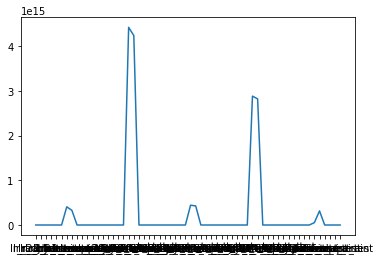

### 리뷰만

### 리뷰와 별점

## 지표별 최고 성과

In [ ]:
for col in list(ev_df.columns)[2:3]:
  print(ev_df[col].sort_values(ascending = False)) #값 내림차순으로 정렬: df['col'].sort_values(ascending = False)

w_star       0.90
w_rv_star    0.90
w_rv         0.89
w_rv         0.89
w_rv         0.89
w_rv         0.89
w_star       0.89
w_star       0.89
w_star       0.89
w_rv_star    0.89
w_rv_star    0.89
w_rv_star    0.89
Name: lr_r2_train, dtype: float64


In [ ]:
#인덱스 초기화
ev_df = ev_df.reset_index(drop =True)

In [ ]:
#정규표현식으로  r2, adjr2, mae, mse, rmse, mape
ev_mets = ['r2', 'adjr2', 'mae', 'mse', 'rmse', 'mape']
for ev_met in ev_mets[:1]: 
  #print('ev_met:',ev_met)
  for i in range(len(list(ev_df.columns))):
    print(list(ev_df.columns)[i],'차례!----------------')
    ev_met_re = '('+ ev_met +')'
    p = re.compile('.*'+ ev_met_re +'.*')
    m = p.match(list(ev_df.columns)[i])
    try:
      if m.group(1) == ev_met:
        #print('정규표현식 매치',ev_df.columns[i])
        ev_df.loc#**** 새로운 df만들기.
    except:
      pass
  print('\n')


rv_star 차례!----------------
week 차례!----------------
lr_r2_train 차례!----------------
lr_r2_test 차례!----------------
lr_adjr2_train 차례!----------------
lr_adjr2_test 차례!----------------
lr_mae_train 차례!----------------
lr_mae_test 차례!----------------
lr_mse_train 차례!----------------
lr_mse_test 차례!----------------
lr_rmse_train 차례!----------------
lr_rmse_test 차례!----------------
lr_mape_train 차례!----------------
lr_mape_test 차례!----------------
svr_r2_train 차례!----------------
svr_r2_test 차례!----------------
svr_adjr2_train 차례!----------------
svr_adjr2_test 차례!----------------
svr_mae_train 차례!----------------
svr_mae_test 차례!----------------
svr_mse_train 차례!----------------
svr_mse_test 차례!----------------
svr_rmse_train 차례!----------------
svr_rmse_test 차례!----------------
svr_mape_train 차례!----------------
svr_mape_test 차례!----------------
ann_r2_train 차례!----------------
ann_r2_test 차례!----------------
ann_adjr2_train 차례!----------------
ann_adjr2_test 차례!----------------
ann_mae

In [ ]:
ev_df['ind'] = ev_df['name'] + str(ev_df['week'])

0     w_rv_star0     1\n1     2\n2     3\n3     4\n4...
1     w_rv_star0     1\n1     2\n2     3\n3     4\n4...
2     w_rv_star0     1\n1     2\n2     3\n3     4\n4...
3     w_rv_star0     1\n1     2\n2     3\n3     4\n4...
4     w_star0     1\n1     2\n2     3\n3     4\n4   ...
5     w_star0     1\n1     2\n2     3\n3     4\n4   ...
6     w_star0     1\n1     2\n2     3\n3     4\n4   ...
7     w_star0     1\n1     2\n2     3\n3     4\n4   ...
8     w_rv0     1\n1     2\n2     3\n3     4\n4     ...
9     w_rv0     1\n1     2\n2     3\n3     4\n4     ...
10    w_rv0     1\n1     2\n2     3\n3     4\n4     ...
11    w_rv0     1\n1     2\n2     3\n3     4\n4     ...
Name: ind, dtype: object

In [ ]:
#지표별 최고점수 한번에 보기
ev_df['str_week'] = ev_df['week'].apply(lambda x: str(x))
ev_df['ind'] = ev_df['name'] + ev_df['str_week']
ev_df

,name,week,lr_r2_train,lr_r2_test,lr_adjr2_train,lr_adjr2_test,lr_mae_train,lr_mae_test,lr_mse_train,lr_mse_test,lr_rmse_train,lr_rmse_test,lr_mape_train,lr_mape_test,svr_r2_train,svr_r2_test,svr_adjr2_train,svr_adjr2_test,svr_mae_train,svr_mae_test,svr_mse_train,svr_mse_test,svr_rmse_train,svr_rmse_test,svr_mape_train,svr_mape_test,ann_r2_train,ann_r2_test,ann_adjr2_train,ann_adjr2_test,ann_mae_train,ann_mae_test,ann_mse_train,ann_mse_test,ann_rmse_train,ann_rmse_test,ann_mape_train,ann_mape_test,cnn_r2_train,cnn_r2_test,cnn_adjr2_train,cnn_adjr2_test,cnn_mae_train,cnn_mae_test,cnn_mse_train,cnn_mse_test,cnn_rmse_train,cnn_rmse_test,cnn_mape_train,cnn_mape_test,rf_r2_train,rf_r2_test,rf_adjr2_train,rf_adjr2_test,rf_mae_train,rf_mae_test,rf_mse_train,rf_mse_test,rf_rmse_train,rf_rmse_test,rf_mape_train,rf_mape_test,ind,str_week
0,w_rv_star,1,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,4412.11,0.11,0.14,0.10,0.11,21296354.92,22612597.97,3.094723e+15,3.010659e+15,55630232.83,54869470.80,18573.98,18480.84,0.68,0.65,0.68,0.64,22866323.23,23993913.14,1.119821e+15,1.220977e+15,33463724.89,34942476.05,30180.42,40708.83,0.46,0.52,0.46,0.50,20343947.85,20497711.54,1.894639e+15,1.678117e+15,43527446.82,40964821.80,16892.08,21947.55,0.99,0.92,0.99,0.92,2417015.09,6588734.14,5.132642e+13,2.681000e+14,7164245.66,16373759.61,92449.54,102992.06,w_rv_star1,1
1,w_rv_star,2,0.89,0.90,0.89,0.90,8398153.10,8574582.09,3.887562e+14,3.829060e+14,19716901.21,19567984.48,4256.22,100363.79,0.16,0.25,0.15,0.22,22841908.78,20788487.66,3.098119e+15,2.976546e+15,55660753.07,54557732.96,3392.25,29993.42,0.72,0.65,0.72,0.64,15247706.37,16108649.56,1.025432e+15,1.378919e+15,32022367.26,37133794.86,7347.65,6875.89,0.48,0.36,0.48,0.34,21895749.13,21755703.10,1.908004e+15,2.541757e+15,43680699.96,50415844.15,17517.92,17354.32,0.99,0.91,0.99,0.91,2439924.73,6508808.67,4.758665e+13,3.654070e+14,6898307.81,19115622.40,86319.12,96010.34,w_rv_star2,2
2,w_rv_star,3,0.90,0.90,0.90,0.90,8390920.51,8206798.57,3.867799e+14,3.643683e+14,19666721.55,19088432.75,4929.67,79952.91,0.24,0.17,0.23,0.14,21672261.95,20937161.72,2.854153e+15,2.961393e+15,53424270.54,54418679.64,3402.33,24364.52,-0.20,-0.18,-0.21,-0.22,27389161.46,25568377.73,4.508382e+15,4.223862e+15,67144488.01,64991246.98,99.60,99.59,0.50,0.37,0.50,0.35,21855755.63,21315112.89,1.888226e+15,2.249361e+15,43453722.83,47427431.89,20750.60,17781.97,0.99,0.91,0.99,0.91,2446410.82,6398599.70,4.642341e+13,3.086223e+14,6813472.77,17567648.71,91538.34,79473.82,w_rv_star3,3
3,w_rv_star,4,0.89,0.92,0.89,0.92,8444393.54,8084314.17,4.071429e+14,2.667467e+14,20177783.06,16332380.80,4967.04,84811.66,0.25,0.23,0.24,0.20,21596263.60,19457793.83,2.889934e+15,2.469058e+15,53758107.89,49689611.99,3468.24,26986.11,0.65,0.61,0.65,0.60,16743687.70,15843571.27,1.347504e+15,1.244875e+15,36708361.35,35282792.69,9021.11,7697.84,0.49,0.46,0.49,0.44,21498152.69,20525126.62,1.961628e+15,1.720277e+15,44290265.60,41476218.45,17290.36,16695.81,0.99,0.92,0.99,0.92,2465791.64,6159827.38,4.981395e+13,2.544691e+14,7057899.48,15952086.11,90160.98,82688.56,w_rv_star4,4
4,w_star,1,0.89,0.93,0.89,0.93,8688489.59,8083910.03,4.242535e+14,2.869692e+14,20597415.82,16940164.63,4982.30,77069.63,-0.17,-0.18,-0.18,-0.22,27204060.19,27606343.76,4.442722e+15,4.509976e+15,66653750.67,67156356.22,5709.30,4761.94,0.89,0.91,0.89,0.91,8821283.32,8918313.04,4.091170e+14,3.497774e+14,20226640.10,18702336.37,5517.21,5668.69,0.23,0.25,0.22,0.22,26972364.32,26761370.15,2.929471e+15,2.893363e+15,54124590.18,53789992.05,26616.99,26763.31,0.99,0.93,0.99,0.93,2767055.32,6782633.70,5.619806e+13,2.573552e+14,7496536.50,16042295.39,93816.57,76369.86,w_star1,1
5,w_star,3,0.90,0.90,0.90,0.90,8432572.78,8315976.85,3.918250e+14,3.733217e+14,19794569.91,19321535.69,5028.43,79844.68,-0.17,-0.16,-0.18,-0.20,27027767.27,25243442.50,4.406237e+15,4.130417e+15,66379492.22,64268318.25,5416.02,5238.79,-0.20,-0.18,-0.21,-0.22,27389161.46,2

In [ ]:
ev_df.columns()
columns = []
ev_df[columns]

In [ ]:
a = 'lr_adjr2_train'
a[-4:] == 'test'

'rain'

In [ ]:
pd.DataFrame(data = [],columns = ev_mets)

,r2,adjr2,mae,mse,rmse,mape


In [ ]:
#ev_df['lr_r2_test'].sort_values(ascending = False)
# test 컬럼만 모으기
cols = []
for col in list(ev_df.columns):
  if col[-4:] == 'test':
    cols.append(col)
cols
#test 중 같은 지표끼리만 모으기 
ev_df[cols]

#정규표현식으로  r2, adjr2, mae, mse, rmse, mape
ev_mets = ['r2', 'adjr2', 'mae', 'mse', 'rmse', 'mape']
for ev_met in ev_mets[:1]:  #지표 반복
  #print('ev_met:',ev_met)
  for i in range(len(list(ev_df[cols].columns)))[:1]: #test_cols만 반복.
    print(list(ev_df[cols])[i],'차례!----------------')
    ev_met_re = '('+ ev_met +')'
    p = re.compile('.*'+ ev_met_re +'.*')
    m = p.match(list(ev_df[cols].columns)[i])
    print(m.group(1))
    if m.group(1) == ev_met:
      #print('정규표현식 매치',ev_df.columns[i])

      print('match 성공',ev_df[cols][i])#**** 새로운 df만들기.
    else:
      print(f"{m.group(1)} == {ev_met} 아님")

In [ ]:
ev_df.loc[:,[list(ev_df[cols])[i],'week']]

,lr_r2_test,week
0,0.91,1
1,0.90,2
2,0.90,3
3,0.92,4
4,0.93,1
5,0.90,3
6,0.90,2
7,0.92,4
8,0.91,1
9,0.91,2


In [ ]:
#met끼리의 스코어를 비교하는 df with week
met_only_cols = ['model','met','score']
mets_only = pd.DataFrame(columns = met_only_cols)
mets_only.append({'model':list(ev_df[cols])[i],'met':ev_met,'score':},ignore_index = True)

,model,met,score
0,min,is,the_best


In [ ]:
ev_df

,name,week,lr_r2_train,lr_r2_test,lr_adjr2_train,lr_adjr2_test,lr_mae_train,lr_mae_test,lr_mse_train,lr_mse_test,lr_rmse_train,lr_rmse_test,lr_mape_train,lr_mape_test,svr_r2_train,svr_r2_test,svr_adjr2_train,svr_adjr2_test,svr_mae_train,svr_mae_test,svr_mse_train,svr_mse_test,svr_rmse_train,svr_rmse_test,svr_mape_train,svr_mape_test,ann_r2_train,ann_r2_test,ann_adjr2_train,ann_adjr2_test,ann_mae_train,ann_mae_test,ann_mse_train,ann_mse_test,ann_rmse_train,ann_rmse_test,ann_mape_train,ann_mape_test,cnn_r2_train,cnn_r2_test,cnn_adjr2_train,cnn_adjr2_test,cnn_mae_train,cnn_mae_test,cnn_mse_train,cnn_mse_test,cnn_rmse_train,cnn_rmse_test,cnn_mape_train,cnn_mape_test,rf_r2_train,rf_r2_test,rf_adjr2_train,rf_adjr2_test,rf_mae_train,rf_mae_test,rf_mse_train,rf_mse_test,rf_rmse_train,rf_rmse_test,rf_mape_train,rf_mape_test,name_week
0,w_rv_star,1,0.89,0.91,0.89,0.91,7667208.92,7942437.02,3.737140e+14,3.271800e+14,19331683.97,18088117.03,4021.12,4412.11,0.11,0.14,0.10,0.11,21296354.92,22612597.97,3.094723e+15,3.010659e+15,55630232.83,54869470.80,18573.98,18480.84,0.68,0.65,0.68,0.64,22866323.23,23993913.14,1.119821e+15,1.220977e+15,33463724.89,34942476.05,30180.42,40708.83,0.46,0.52,0.46,0.50,20343947.85,20497711.54,1.894639e+15,1.678117e+15,43527446.82,40964821.80,16892.08,21947.55,0.99,0.92,0.99,0.92,2417015.09,6588734.14,5.132642e+13,2.681000e+14,7164245.66,16373759.61,92449.54,102992.06,w_rv_star1
1,w_rv_star,2,0.89,0.90,0.89,0.90,8398153.10,8574582.09,3.887562e+14,3.829060e+14,19716901.21,19567984.48,4256.22,100363.79,0.16,0.25,0.15,0.22,22841908.78,20788487.66,3.098119e+15,2.976546e+15,55660753.07,54557732.96,3392.25,29993.42,0.72,0.65,0.72,0.64,15247706.37,16108649.56,1.025432e+15,1.378919e+15,32022367.26,37133794.86,7347.65,6875.89,0.48,0.36,0.48,0.34,21895749.13,21755703.10,1.908004e+15,2.541757e+15,43680699.96,50415844.15,17517.92,17354.32,0.99,0.91,0.99,0.91,2439924.73,6508808.67,4.758665e+13,3.654070e+14,6898307.81,19115622.40,86319.12,96010.34,w_rv_star2
2,w_rv_star,3,0.90,0.90,0.90,0.90,8390920.51,8206798.57,3.867799e+14,3.643683e+14,19666721.55,19088432.75,4929.67,79952.91,0.24,0.17,0.23,0.14,21672261.95,20937161.72,2.854153e+15,2.961393e+15,53424270.54,54418679.64,3402.33,24364.52,-0.20,-0.18,-0.21,-0.22,27389161.46,25568377.73,4.508382e+15,4.223862e+15,67144488.01,64991246.98,99.60,99.59,0.50,0.37,0.50,0.35,21855755.63,21315112.89,1.888226e+15,2.249361e+15,43453722.83,47427431.89,20750.60,17781.97,0.99,0.91,0.99,0.91,2446410.82,6398599.70,4.642341e+13,3.086223e+14,6813472.77,17567648.71,91538.34,79473.82,w_rv_star3
3,w_rv_star,4,0.89,0.92,0.89,0.92,8444393.54,8084314.17,4.071429e+14,2.667467e+14,20177783.06,16332380.80,4967.04,84811.66,0.25,0.23,0.24,0.20,21596263.60,19457793.83,2.889934e+15,2.469058e+15,53758107.89,49689611.99,3468.24,26986.11,0.65,0.61,0.65,0.60,16743687.70,15843571.27,1.347504e+15,1.244875e+15,36708361.35,35282792.69,9021.11,7697.84,0.49,0.46,0.49,0.44,21498152.69,20525126.62,1.961628e+15,1.720277e+15,44290265.60,41476218.45,17290.36,16695.81,0.99,0.92,0.99,0.92,2465791.64,6159827.38,4.981395e+13,2.544691e+14,7057899.48,15952086.11,90160.98,82688.56,w_rv_star4
4,w_star,1,0.89,0.93,0.89,0.93,8688489.59,8083910.03,4.242535e+14,2.869692e+14,20597415.82,16940164.63,4982.30,77069.63,-0.17,-0.18,-0.18,-0.22,27204060.19,27606343.76,4.442722e+15,4.509976e+15,66653750.67,67156356.22,5709.30,4761.94,0.89,0.91,0.89,0.91,8821283.32,8918313.04,4.091170e+14,3.497774e+14,20226640.10,18702336.37,5517.21,5668.69,0.23,0.25,0.22,0.22,26972364.32,26761370.15,2.929471e+15,2.893363e+15,54124590.18,53789992.05,26616.99,26763.31,0.99,0.93,0.99,0.93,2767055.32,6782633.70,5.619806e+13,2.573552e+14,7496536.50,16042295.39,93816.57,76369.86,w_star1
5,w_star,3,0.90,0.90,0.90,0.90,8432572.78,8315976.85,3.918250e+14,3.733217e+14,19794569.91,19321535.69,5028.43,79844.68,-0.17,-0.16,-0.18,-0.20,27027767.27,25243442.50,4.406237e+15,4.130417e+15,66379492.22,64268318.25,5416.02,5238.79,-0.20,-0.18,-0.21,-0.22,27389161.46,25568377.73,4.

### 시각화 tinker [가용]

In [ ]:
# id는 name_week 하나의 컬럼으로 묶기
ev_df['week'] = ev_df['week'].apply(lambda x: str(x))
ev_df['name_week'] = ev_df['rv_star'] + ev_df['week']
#필요한 컬럼 추리기
#2. rmse
met = 'rmse'
colm = ['lr_'+met+'_test','svr_'+ met +'_test','ann_'+met+'_test','cnn_'+met+'_test','rf_'+met+'_test']
#maj_colm = ['lr_mae_test','ann_mae_test','rf_mae_test']
temp_df = ev_df[['week'] + colm]
temp_df.index = ev_df['rv_star']
temp_df

,week,lr_rmse_test,svr_rmse_test,ann_rmse_test,cnn_rmse_test,rf_rmse_test
rv_star,,,,,,
star,1.0,16940164.63,67158723.17,19587994.58,53752244.12,16042295.39
star,2.0,19622462.05,67423729.65,23747897.52,56773276.61,20252432.42
star,3.0,19321535.69,64265820.57,22025366.83,52121604.13,17808003.00
star,4.0,16307365.21,61256338.38,16554765.29,49493121.29,16591093.62
rv,1.0,18088117.03,54874161.35,18596279.72,41029914.20,16373759.61
rv,2.0,18088117.03,54873968.47,18572651.17,41015730.93,16373759.61
rv,4.0,18050236.95,50208733.31,19954714.98,39874033.84,16165241.73
rv_star,1.0,17065031.36,58375774.77,18664833.18,44532120.76,15691189.37
rv,3.0,18062448.86,51029626.56,19763879.51,40171120.73,16108113.28


In [ ]:
# 최고 성능
temp_df.min()

week                     1.0
lr_rmse_test     1.63074e+07
svr_rmse_test    4.96879e+07
ann_rmse_test    1.65548e+07
cnn_rmse_test     3.9874e+07
rf_rmse_test     1.56912e+07
dtype: object

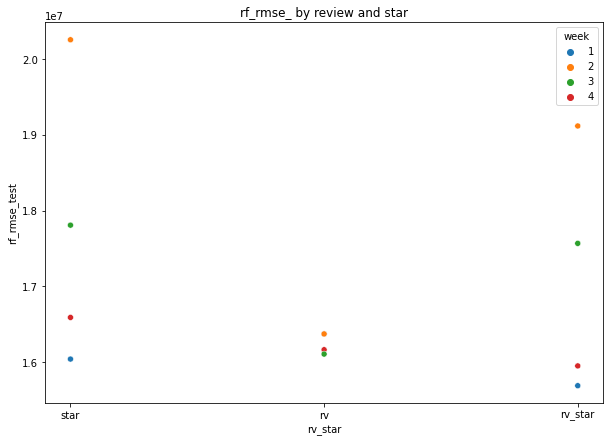

In [ ]:
n = 5 # n번째 컬럼. [week	lr_mae_test	ann_mae_test	rf_mae_test]]
plt.figure(figsize=(10,7))
#sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[1],hue = 'week')
y_ = list(temp_df.columns)[1]
# sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[2])
# sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[3])
# sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[4])
sns.scatterplot(data = temp_df,x = 'rv_star',y = list(temp_df.columns)[n],hue = 'week')
plt.title(str(list(temp_df.columns)[n][:8])  + ' by review and star')
plt.show()


In [ ]:
 list(temp_df.columns)[1][:3]

'lr_mae_test'

In [ ]:
temp_df.groupby(by = 'rv_star').mean()

,lr_mae_test,ann_mae_test,rf_mae_test
rv_star,,,
rv,7.914593e+06,8.556862e+06,6.495250e+06
rv_star,8.251829e+06,8.723246e+06,6.352577e+06
star,8.289940e+06,9.355632e+06,6.928180e+06


In [ ]:
# star, 

In [ ]:
#2 mse
met = 'rmse'
colm = ['lr_'+ met +'_test','svr_'+ met +'_test','ann_'+ met +'_test','cnn_'+ met +'_test','rf_'+ met +'_test']
temp_df = ev_df[['name_week','week'] + colm]
temp_df.index = temp_df['name_week']
temp_df = temp_df.drop('name_week',axis = 1)
temp_df

,week,lr_rmse_test,svr_rmse_test,ann_rmse_test,cnn_rmse_test,rf_rmse_test
name_week,,,,,,
w_rv_star1,1,18088117.03,54869470.80,34942476.05,40964821.80,16373759.61
w_rv_star2,2,19567984.48,54557732.96,37133794.86,50415844.15,19115622.40
w_rv_star3,3,19088432.75,54418679.64,64991246.98,47427431.89,17567648.71
w_rv_star4,4,16332380.80,49689611.99,35282792.69,41476218.45,15952086.11
w_star1,1,16940164.63,67156356.22,18702336.37,53789992.05,16042295.39
w_star3,3,19321535.69,64268318.25,64991246.98,52163401.75,17808003.00
w_star2,2,19622462.05,67426071.47,31066168.53,56769095.70,20252432.42
w_star4,4,16307365.21,61258117.24,21483577.89,49471031.74,16591093.62
w_rv1,1,18088117.03,54873968.47,35679860.15,41015806.09,16373759.61


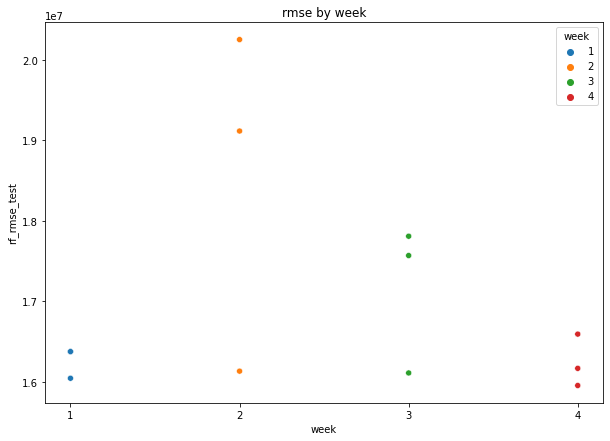

In [ ]:
plt.figure(figsize=(10,7))
#sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[1],hue = 'week')
y_ = list(temp_df.columns)[1]
# sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[2])
# sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[3])
# sns.scatterplot(data = temp_df,x = 'week',y = list(temp_df.columns)[4])
sns.scatterplot(data = temp_df,x = 'rv_star',y = list(temp_df.columns)[1],hue = 'week')
plt.title(met + ' by week')
plt.show()


['week',
 'lr_mae_test',
 'svr_mae_test',
 'ann_mae_test',
 'cnn_mae_test',
 'rf_mae_test']

mape & wom 논문

In [ ]:
mape = {11,12,21,24,25,29,39,45,48}
wom = {25,32,34,46,47}
mape & wom # KPS 교수님 그 논문. WOM Box Office Forecasting considering Competitive

#개선점?

In [ ]:
# 2. Budget을 날리기보다 정보 있냐 없냐로 해보기. ㄱ v
# 1. screen 수는 변하자나? 어케 투입? 누적만있나? 확인. the opening weekend 기준으로는 가져올 수 있지 않을까? X
# 3. year을 투입함으로써 달러 인플레이션으로 인한 달러 가치 절하/ 티켓 가격 상승 등의 factor를 잡을 수 있지 않을까? ㄱ
# Q 2016 ticket price로 바꿨다는데..  그러면 ticke 수를 안다는 얘기임. 

# 정규화? 나도했지. ㅇㅇ

{25}